<a href="https://colab.research.google.com/github/jecampagne/cours_mallat_cdf/blob/main/gibbs_FFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('image', cmap='jet')
mpl.rcParams['font.size'] = 20

# Effect to make a hard threshold (Gibbs phenomenon)

In [25]:
#@title
signal = np.array([0., 0.000698001, 0.00139722, 0.00209765, 0.0027993, 0.00350217, \
0.00420626, 0.00491158, 0.00561813, 0.00632591, 0.00703493, \
0.00774518, 0.00845667, 0.0091694, 0.00988337, 0.0105986, 0.0113151, \
0.0120328, 0.0127518, 0.013472, 0.0141935, 0.0149162, 0.0156402, \
0.0163655, 0.0170921, 0.0178199, 0.018549, 0.0192793, 0.020011, \
0.0207439, 0.0214781, 0.0222136, 0.0229504, 0.0236885, 0.0244279, \
0.0251685, 0.0259105, 0.0266538, 0.0273983, 0.0281442, 0.0288914, \
0.0296399, 0.0303897, 0.0311408, 0.0318933, 0.032647, 0.0334021, \
0.0341586, 0.0349163, 0.0356754, 0.0364358, 0.0371975, 0.0379606, \
0.038725, 0.0394908, 0.0402579, 0.0410264, 0.0417962, 0.0425674, \
0.0433399, 0.0441138, 0.044889, 0.0456656, 0.0464436, 0.0472229, \
0.0480036, 0.0487857, 0.0495692, 0.050354, 0.0511403, 0.0519279, \
0.0527169, 0.0535072, 0.054299, 0.0550922, 0.0558867, 0.0566827, \
0.05748, 0.0582788, 0.059079, 0.0598806, 0.0606835, 0.0614879, \
0.0622938, 0.063101, 0.0639097, 0.0647197, 0.0655313, 0.0663442, \
0.0671586, 0.0679744, 0.0687916, 0.0696103, 0.0704304, 0.0712519, \
0.0720749, 0.0728994, 0.0737253, 0.0745527, 0.0753815, 0.0762117, \
0.0770435, 0.0778767, 0.0787113, 0.0795475, 0.0803851, 0.0812241, \
0.0820647, 0.0829067, 0.0837502, 0.0845952, 0.0854417, 0.0862897, \
0.0871391, 0.0879901, 0.0888425, 0.0896965, 0.0905519, 0.0914089, \
0.0922674, 0.0931273, 0.0939888, 0.0948518, 0.0957163, 0.0965823, \
0.0974499, 0.0983189, 0.0991895, 0.100062, 0.100935, 0.10181, \
0.102687, 0.103565, 0.104445, 0.105327, 0.10621, 0.107094, 0.10798, \
0.108867, 0.109757, 0.110647, 0.111539, 0.112433, 0.113329, 0.114226, \
0.115124, 0.116024, 0.116926, 0.117829, 0.118734, 0.11964, 0.120548, \
0.121458, 0.122369, 0.123282, 0.124196, 0.125112, 0.126029, 0.126948, \
0.127869, 0.128792, 0.129716, 0.130641, 0.131568, 0.132497, 0.133428, \
0.13436, 0.135293, 0.136229, 0.137165, 0.138104, 0.139044, 0.139986, \
0.14093, 0.141875, 0.142822, 0.14377, 0.14472, 0.145672, 0.146625, \
0.14758, 0.148537, 0.149495, 0.150455, 0.151417, 0.15238, 0.153345, \
0.154312, 0.15528, 0.156251, 0.157222, 0.158196, 0.159171, 0.160148, \
0.161126, 0.162106, 0.163088, 0.164072, 0.165057, 0.166044, 0.167033, \
0.168024, 0.169016, 0.17001, 0.171005, 0.172002, 0.173001, 0.174002, \
0.175005, 0.176009, 0.177015, 0.178023, 0.179032, 0.180043, 0.181056, \
0.182071, 0.183087, 0.184105, 0.185125, 0.186147, 0.18717, 0.188195, \
0.189222, 0.190251, 0.191282, 0.192314, 0.193348, 0.194384, 0.195421, \
0.196461, 0.197502, 0.198545, 0.199589, 0.200636, 0.201684, 0.202734, \
0.203786, 0.20484, 0.205895, 0.206953, 0.208012, 0.209073, 0.210135, \
0.2112, 0.212266, 0.213335, 0.214405, 0.215476, 0.21655, 0.217626, \
0.218703, 0.219782, 0.220863, 0.221946, 0.223031, 0.224117, 0.225205, \
0.226296, 0.227387, 0.22848, 0.229575, 0.230672, 0.23177, 0.232871, \
0.233973, 0.235077, 0.236183, 0.237291, 0.238401, 0.239513, 0.240627, \
0.241742, 0.24286, 0.243979, 0.2451, 0.246223, 0.247348, 0.248475, \
0.249604, 0.250735, 0.251867, 0.253002, 0.254138, 0.255277, 0.256417, \
0.257559, 0.258704, 0.25985, 0.260998, 0.262148, 0.2633, 0.264454, \
0.26561, 0.266767, 0.267927, 0.269089, 0.270253, 0.271418, 0.272586, \
0.273756, 0.274927, 0.276101, 0.277276, 0.278454, 0.279633, 0.280815, \
0.281998, 0.283183, 0.284371, 0.28556, 0.286752, 0.287945, 0.289141, \
0.290338, 0.291538, 0.292739, 0.293942, 0.295148, 0.296356, 0.297565, \
0.298777, 0.29999, 0.301206, 0.302424, 0.303643, 0.304865, 0.306089, \
0.307315, 0.308543, 0.309773, 0.311005, 0.312239, 0.313475, 0.314713, \
0.315954, 0.317196, 0.31844, 0.319687, 0.320935, 0.322186, 0.323439, \
0.324694, 0.325951, 0.32721, 0.328471, 0.329734, 0.330999, 0.332267, \
0.333536, 0.334808, 0.336082, 0.337358, 0.338636, 0.339916, 0.341198, \
0.342482, 0.343769, 0.345057, 0.346348, 0.347641, 0.348936, 0.350233, \
0.351533, 0.352834, 0.354138, 0.355444, 0.356751, 0.358062, 0.359374, \
0.360688, 0.362005, 0.363324, 0.364645, 0.365968, 0.367293, 0.368621, \
0.36995, 0.371282, 0.372616, 0.373953, 0.375291, 0.376632, 0.377975, \
0.37932, 0.380667, 0.382016, 0.383367, 0.38472, 0.386075, 0.387432, \
0.388791, 0.390152, 0.391516, 0.392882, 0.39425, 0.39562, 0.396993, \
0.398368, 0.399745, 0.401124, 0.402506, 0.40389, 0.405276, 0.406665, \
0.408055, 0.409448, 0.410844, 0.412241, 0.413641, 0.415043, 0.416448, \
0.417854, 0.419263, 0.420675, 0.422088, 0.423504, 0.424923, 0.426343, \
0.427766, 0.429191, 0.430619, 0.432049, 0.433481, 0.434916, 0.436353, \
0.437792, 0.439234, 0.440678, 0.442124, 0.443573, 0.445024, 0.446477, \
0.447933, 0.449391, 0.450852, 0.452315, 0.45378, 0.455247, 0.456718, \
0.45819, 0.459665, 0.461142, 0.462622, 0.464104, 0.465588, 0.467075, \
0.468565, 0.470056, 0.47155, 0.473047, 0.474546, 0.476047, 0.477551, \
0.479058, 0.480566, 0.482077, 0.483591, 0.485107, 0.486626, 0.488147, \
0.48967, 0.491196, 0.492725, 0.494255, 0.495789, 0.497325, 0.498863, \
0.500404, 0.501947, 0.503493, 0.505041, 0.506592, 0.508145, 0.509701, \
0.511259, 0.51282, 0.514383, 0.515949, 0.517518, 0.519088, 0.520662, \
0.522238, 0.523816, 0.525397, 0.526981, 0.528567, 0.530156, 0.531747, \
0.533341, 0.534937, 0.536536, 0.538137, 0.539741, 0.541348, 0.542957, \
0.544569, 0.546183, 0.5478, 0.54942, 0.551042, 0.552667, 0.554294, \
0.555924, 0.557556, 0.559191, 0.560829, 0.56247, 0.564112, 0.565758, \
0.567406, 0.569057, 0.570711, 0.572367, 0.574026, 0.575687, 0.57735, \
0.579016, 0.580684, 0.582355, 0.584029, 0.585705, 0.587384, 0.589066, \
0.59075, 0.592437, 0.594127, 0.595819, 0.597514, 0.599212, 0.600912, \
0.602615, 0.604321, 0.60603, 0.607741, 0.609455, 0.611172, 0.612891, \
0.614613, 0.616338, 0.618066, 0.619796, 0.621529, 0.623265, 0.625004, \
0.626745, 0.62849, 0.630236, 0.631986, 0.633739, 0.635494, 0.637252, \
0.639012, 0.640776, 0.642542, 0.644311, 0.646083, 0.647858, 0.649636, \
0.651416, 0.653199, 0.654985, 0.656774, 0.658565, 0.66036, 0.662157, \
0.663957, 0.66576, 0.667566, 0.669375, 0.671186, 0.673, 0.674817, \
0.676637, 0.67846, 0.680286, 0.682115, 0.683946, 0.685781, 0.687618, \
0.689458, 0.691301, 0.693147, 0.694996, 0.696847, 0.698702, 0.700559, \
0.70242, 0.704283, 0.706149, 0.708019, 0.709891, 0.711766, 0.713644, \
0.715525, 0.717409, 0.719295, 0.721185, 0.723078, 0.724973, 0.726872, \
0.728774, 0.730678, 0.732586, 0.734496, 0.73641, 0.738326, 0.740245, \
0.742168, 0.744093, 0.746022, 0.747953, 0.749887, 0.751825, 0.753765, \
0.755709, 0.757655, 0.759605, 0.761557, 0.763513, 0.765471, 0.767433, \
0.769398, 0.771365, 0.773336, 0.77531, 0.777287, 0.779267, 0.781249, \
0.783236, 0.785225, 0.787217, 0.789212, 0.79121, 0.793212, 0.795216, \
0.797224, 0.799235, 0.801249, 0.803265, 0.805285, 0.807309, 0.809335, \
0.811364, 0.813396, 0.815431, 0.817468, 0.819509, 0.821553, 0.8236, \
0.825651, 0.827704, 0.829761, 0.831821, 0.833883, 0.835949, 0.838019, \
0.840091, 0.842167, 0.844246, 0.846328, 0.848413, 0.850501, 0.852593, \
0.854687, 0.856785, 0.858887, 0.860991, 0.863099, 0.865209, 0.867324, \
0.869441, 0.871561, 0.873685, 0.875812, 0.877943, 0.880076, 0.882213, \
0.884353, 0.886496, 0.888643, 0.890793, 0.892946, 0.895102, 0.897262, \
0.899425, 0.901592, 0.903761, 0.905934, 0.90811, 0.91029, 0.912473, \
0.914659, 0.916848, 0.919041, 0.921237, 0.923437, 0.92564, 0.927846, \
0.930055, 0.932268, 0.934484, 0.936704, 0.938927, 0.941153, 0.943383, \
0.945616, 0.947853, 0.950092, 0.952336, 0.954582, 0.956832, 0.959086, \
0.961342, 0.963603, 0.965866, 0.968133, 0.970404, 0.972678, 0.974955, \
0.977236, 0.97952, 0.981808, 0.984099, 0.986394, 0.988692, 0.990993, \
0.993298, 0.995606, 0.997918, 1.00023, 1.00255, 1.00487, 1.0072, \
1.00953, 1.01186, 1.0142, 1.01654, 1.01888, 1.02123, 1.02358, \
1.02593, 1.02829, 1.03065, 1.03302, 1.03538, 1.03776, 1.04013, \
1.04251, 1.04489, 1.04728, 1.04967, 1.05206, 1.05446, 1.05686, \
1.05926, 1.06167, 1.06408, 1.06649, 1.06891, 1.07133, 1.07376, \
1.07618, 1.07862, 1.08105, 1.08349, 1.08594, 1.08838, 1.09083, \
1.09329, 1.09574, 1.09821, 1.10067, 1.10314, 1.10561, 1.10808, \
1.11056, 1.11304, 1.11553, 1.11802, 1.12051, 1.12301, 1.12551, \
1.12801, 1.13052, 1.13303, 1.13555, 1.13807, 1.14059, 1.14312, \
1.14565, 1.14818, 1.15072, 1.15326, 1.1558, 1.15835, 1.16091, \
1.16346, 1.16602, 1.16859, 1.17115, 1.17373, 1.1763, 1.17888, \
1.18146, 1.18405, 1.18664, 1.18923, 1.19183, 1.19443, 1.19704, \
1.19965, 1.20226, 1.20488, 1.2075, 1.21013, 1.21275, 1.21539, \
1.21802, 1.22066, 1.22331, 1.22596, 1.22861, 1.23126, 1.23392, \
1.23659, 1.23925, 1.24193, 1.2446, 1.24728, 1.24996, 1.25265, \
1.25534, 1.25804, 1.26074, 1.26344, 1.26614, 1.26886, 1.27157, \
1.27429, 1.27701, 1.27974, 1.28247, 1.2852, 1.28794, 1.29068, \
1.29343, 1.29618, 1.29893, 1.30169, 1.30445, 1.30722, 1.30999, \
1.31276, 1.31554, 1.31833, 1.32111, 1.3239, 1.3267, 1.3295, 1.3323, \
1.3351, 1.33792, 1.34073, 1.34355, 1.34637, 1.3492, 1.35203, 1.35486, \
1.3577, 1.36055, 1.36339, 1.36625, 1.3691, 1.37196, 1.37483, 1.37769, \
1.38057, 1.38344, 1.38632, 1.38921, 1.3921, 1.39499, 1.39788, \
1.40079, 1.40369, 1.4066, 1.40951, 1.41243, 1.41535, 1.41828, \
1.42121, 1.42415, 1.42708, 1.43003, 1.43297, 1.43593, 1.43888, \
1.44184, 1.44481, 1.44777, 1.45075, 1.45372, 1.4567, 1.45968, \
1.46267, 1.46567, 1.46866, 1.47166, 1.47467, 1.47768, 1.48069, \
1.48371, 1.48673, 1.48976, 1.49279, 1.49583, 1.49887, 1.50191, \
1.50496, 1.50801, 1.51107, 1.51413, 1.51719, 1.52026, 1.52334, \
1.52642, 1.5295, 1.53259, 1.53568, 1.53878, 1.54188, 1.54498, \
1.54809, 1.55121, 1.55432, 1.55745, 1.56057, 1.56371, 1.56684, \
1.56998, 1.57313, 1.57628, 1.57943, 1.58259, 1.58575, 1.58892, \
1.59209, 1.59527, 1.59845, 1.60163, 1.60482, 1.60801, 1.61121, \
1.61442, 1.61762, 1.62084, 1.62405, 1.62727, 1.6305, 1.63373, \
1.63696, 1.6402, 1.64345, 1.64669, 1.64995, 1.6532, 1.65647, 1.65973, \
1.663, 1.66628, 1.66956, 1.67285, 1.67613, 1.67943, 1.68273, 1.68603, \
1.68934, 1.69265, 1.69597, 1.69929, 1.70262, 1.70595, 1.70928, \
1.71262, 1.71597, 1.71932, 1.72267, 1.72603, 1.7294, 1.73277, \
1.73614, 1.73952, 1.7429, 1.74629, 1.74968, 1.75307, 1.75648, \
1.75988, 1.76329, 1.76671, 1.77013, 1.77355, 1.77698, 1.78042, \
1.78386, 1.7873, 1.79075, 1.7942, 1.79766, 1.80113, 1.80459, 1.80807, \
1.81154, 1.81503, 1.81851, 1.82201, 1.8255, 1.82901, 1.83251, \
1.83602, 1.83954, 1.84306, 1.84659, 1.85012, 1.85365, 1.85719, \
1.86074, 1.86429, 1.86784, 1.8714, 1.87497, 1.87854, 1.88211, \
1.88569, 1.88927, 1.89286, 1.89646, 1.90006, 1.90366, 1.90727, \
1.91088, 1.9145, 1.91812, 1.92175, 1.92538, 1.92902, 1.93267, \
1.93631, 1.93997, 1.94363, 1.94729, 1.95096, 1.95463, 1.95831, \
1.96199, 1.96568, 1.96937, 1.97307, 1.97678, 1.98048, 1.9842, \
1.98792, 1.99164, 1.99537, 1.9991, 2.00284, 2.00658, 2.01033, \
2.01409, 2.01785, 2.02161, 2.02538, 2.02916, 2.03293, 2.03672, \
2.04051, 2.0443, 2.0481, 2.05191, 2.05572, 2.05954, 2.06336, 2.06718, \
2.07101, 2.07485, 2.07869, 2.08254, 2.08639, 2.09025, 2.09411, \
2.09798, 2.10185, 2.10573, 2.10961, 2.1135, 2.11739, 2.12129, 2.1252, \
2.1291, 2.13302, 2.13694, 2.14086, 2.14479, 2.14873, 2.15267, \
2.15662, 2.16057, 2.16453, 2.16849, 2.17246, 2.17643, 2.18041, \
2.18439, 2.18838, 2.19237, 2.19637, 2.20038, 2.20439, 2.2084, \
2.21242, 2.21645, 2.22048, 2.22452, 2.22856, 2.23261, 2.23666, \
2.24072, 2.24478, 2.24885, 2.25293, 2.25701, 2.26109, 2.26518, \
2.26928, 2.27338, 2.27749, 2.2816, 2.28572, 2.28984, 2.29397, \
2.29811, 2.30225, 2.30639, 2.31055, 2.3147, 2.31886, 2.32303, 2.3272, \
2.33138, 2.33557, 2.33976, 2.34395, 2.34815, 2.35236, 2.35657, \
2.36079, 2.36501, 2.36924, 2.37347, 2.37771, 2.38196, 2.3862, \
2.39046, 2.39472, 2.39899, 2.40326, 2.40754, 2.41182, 2.41611, \
2.4204, 2.4247, 2.42901, 2.43332, 2.43764, 2.44196, 2.44629, 2.45062, \
2.45496, 2.45931, 2.46366, 2.46802, 2.47238, 2.47675, 2.48112, \
2.4855, 2.48989, 2.49428, 2.49867, 2.50308, 2.50749, 2.5119, 2.51632, \
2.52075, 2.52518, 2.52961, 2.53406, 2.53851, 2.54296, 2.54742, \
2.55189, 2.55636, 2.56084, 2.56532, 2.56981, 2.5743, 2.57881, \
2.58331, 2.58782, 2.59234, 2.59687, 2.6014, 2.60593, 2.61048, \
2.61502, 2.61958, 2.62414, 2.6287, 2.63327, 2.63785, 2.64244, \
2.64702, 2.65162, 2.65622, 2.66083, 2.66544, 2.67006, 2.67469, \
2.67932, 2.68395, 2.6886, 2.69324, 2.6979, 2.70256, 2.70723, 2.7119, \
2.71658, 2.72126, 2.72595, 2.73065, 2.73535, 2.74006, 2.74478, \
2.7495, 2.75423, 2.75896, 2.7637, 2.76844, 2.77319, 2.77795, 2.78272, \
2.78748, 2.79226, 2.79704, 2.80183, 2.80662, 2.81142, 2.81623, \
2.82104, 2.82586, 2.83069, 2.83552, 2.84035, 2.8452, 2.85005, 2.8549, \
2.85976, 2.86463, 2.8695, 2.87439, 2.87927, 2.88416, 2.88906, \
2.89397, 2.89888, 2.9038, 2.90872, 2.91365, 2.91859, 2.92353, \
2.92848, 2.93343, 2.93839, 2.94336, 2.94834, 2.95332, 2.9583, \
2.96329, 2.96829, 2.9733, 2.97831, 2.98333, 2.98835, 2.99338, \
2.99842, 3.00346, 3.00851, 3.01357, 3.01863, 3.0237, 3.02877, \
3.03385, 3.03894, 3.04403, 3.04914, 3.05424, 3.05936, 3.06448, \
3.0696, 3.07473, 3.07987, 3.08502, 3.09017, 3.09533, 3.10049, \
3.10566, 3.11084, 3.11603, 3.12122, 3.12641, 3.13162, 3.13683, \
3.14204, 3.14727, 3.1525, 3.15773, 3.16297, 3.16822, 3.17348, \
3.17874, 3.18401, 3.18929, 3.19457, 3.19986, 3.20515, 3.21045, \
3.21576, 3.22107, 3.2264, 3.23172, 3.23706, 3.2424, 3.24775, 3.2531, \
3.25846, 3.26383, 3.26921, 3.27459, 3.27997, 3.28537, 3.29077, \
3.29618, 3.30159, 3.30701, 3.31244, 3.31787, 3.32331, 3.32876, \
3.33422, 3.33968, 3.34515, 3.35062, 3.3561, 3.36159, 3.36708, \
3.37259, 3.37809, 3.38361, 3.38913, 3.39466, 3.4002, 3.40574, \
3.41129, 3.41684, 3.4224, 3.42797, 3.43355, 3.43913, 3.44472, \
3.45032, 3.45592, 3.46153, 3.46715, 3.47277, 3.47841, 3.48404, \
3.48969, 3.49534, 3.501, 3.50666, 3.51234, 3.51801, 3.5237, 3.52939, \
3.53509, 3.5408, 3.54651, 3.55223, 3.55796, 3.5637, 3.56944, 3.57519, \
3.58094, 3.5867, 3.59247, 3.59825, 3.60403, 3.60982, 3.61562, \
3.62142, 3.62724, 3.63305, 3.63888, 3.64471, 3.65055, 3.6564, \
3.66225, 3.66811, 3.67398, 3.67985, 3.68573, 3.69162, 3.69752, \
3.70342, 3.70933, 3.71525, 3.72117, 3.7271, 3.73304, 3.73899, \
3.74494, 3.7509, 3.75686, 3.76284, 3.76882, 3.77481, 3.7808, 3.7868, \
3.79281, 3.79883, 3.80485, 3.81089, 3.81692, 3.82297, 3.82902, \
3.83508, 3.84115, 3.84722, 3.85331, 3.8594, 3.86549, 3.87159, \
3.87771, 3.88382, 3.88995, 3.89608, 3.90222, 3.90837, 3.91452, \
3.92068, 3.92685, 3.93303, 3.93921, 3.9454, 3.9516, 3.95781, 3.96402, \
3.97024, 3.97647, 3.9827, 3.98895, 3.9952, 4.00145, 4.00772, 4.01399, \
4.02027, 4.02656, 4.03285, 4.03915, 4.04546, 4.05178, 4.0581, \
4.06443, 4.07077, 4.07712, 4.08347, 4.08983, 4.0962, 4.10258, \
4.10896, 4.11535, 4.12175, 4.12816, 4.13457, 4.14099, 4.14742, \
4.15385, 4.1603, 4.16675, 4.17321, 4.17967, 4.18615, 4.19263, \
4.19912, 4.20561, 4.21212, 4.21863, 4.22515, 4.23168, 4.23821, \
4.24475, 4.2513, 4.25786, 4.26442, 4.271, 4.27758, 4.28416, 4.29076, \
4.29736, 4.30397, 4.31059, 4.31722, 4.32385, 4.33049, 4.33714, \
4.3438, 4.35046, 4.35713, 4.36381, 4.3705, 4.3772, 4.3839, 4.39061, \
4.39733, 4.40405, 4.41079, 4.41753, 4.42428, 4.43104, 4.4378, \
4.44457, 4.45136, 4.45814, 4.46494, 4.47174, 4.47856, 4.48538, \
4.4922, 4.49904, 4.50588, 4.51273, 4.51959, 4.52646, 4.53333, \
4.54021, 4.5471, 4.554, 4.56091, 4.56782, 4.57474, 4.58167, 4.58861, \
4.59556, 4.60251, 4.60947, 4.61644, 4.62342, 4.6304, 4.6374, 4.6444, \
4.65141, 4.65842, 4.66545, 4.67248, 4.67952, 4.68657, 4.69363, \
4.70069, 4.70777, 4.71485, 4.72194, 4.72903, 4.73614, 4.74325, \
4.75037, 4.7575, 4.76464, 4.77178, 4.77894, 4.7861, 4.79327, 4.80045, \
4.80763, 4.81483, 4.82203, 4.82924, 4.83646, 4.84368, 4.85092, \
4.85816, 4.86541, 4.87267, 4.87994, 4.88721, 4.89449, 4.90179, \
4.90908, 4.91639, 4.92371, 4.93103, 4.93836, 4.94571, 4.95305, \
4.96041, 4.96778, 4.97515, 4.98253, 4.98992, 4.99732, 5.00473, \
5.01214, 5.01956, 5.02699, 5.03443, 5.04188, 5.04934, 5.0568, \
5.06427, 5.07176, 5.07924, 5.08674, 5.09425, 5.10176, 5.10928, \
5.11682, 5.12435, 5.1319, 5.13946, 5.14702, 5.1546, 5.16218, 5.16977, \
5.17736, 5.18497, 5.19258, 5.20021, 5.20784, 5.21548, 5.22313, \
5.23078, 5.23845, 5.24612, 5.2538, 5.26149, 5.26919, 5.2769, 5.28462, \
5.29234, 5.30007, 5.30781, 5.31556, 5.32332, 5.33109, 5.33887, \
5.34665, 5.35444, 5.36224, 5.37005, 5.37787, 5.3857, 5.39353, \
5.40137, 5.40923, 5.41709, 5.42496, 5.43284, 5.44072, 5.44862, \
5.45652, 5.46444, 5.47236, 5.48029, 5.48823, 5.49618, 5.50413, \
5.5121, 5.52007, 5.52805, 5.53604, 5.54404, 5.55205, 5.56007, \
5.56809, 5.57613, 5.58417, 5.59222, 5.60028, 5.60835, 5.61643, \
5.62451, 5.63261, 5.64071, 5.64882, 5.65695, 5.66508, 5.67321, \
5.68136, 5.68952, 5.69768, 5.70586, 5.71404, 5.72223, 5.73043, \
5.73864, 5.74686, 5.75508, 5.76332, 5.77156, 5.77982, 5.78808, \
5.79635, 5.80463, 5.81292, 5.82121, 5.82952, 5.83784, 5.84616, \
5.85449, 5.86283, 5.87118, 5.87954, 5.88791, 5.89629, 5.90468, \
5.91307, 5.92147, 5.92989, 5.93831, 5.94674, 5.95518, 5.96363, \
5.97209, 5.98055, 5.98903, 5.99751, 6.00601, 6.01451, 6.02302, \
6.03154, 6.04007, 6.04861, 6.05716, 6.06571, 6.07428, 6.08285, \
6.09144, 6.10003, 6.10863, 6.11724, 6.12586, 6.13449, 6.14313, \
6.15178, 6.16043, 6.1691, 6.17777, 6.18646, 6.19515, 6.20385, \
6.21256, 6.22128, 6.23001, 6.23875, 6.2475, 6.25625, 6.26502, \
6.27379, 6.28258, 6.29137, 6.30017, 6.30898, 6.31781, 6.32664, \
6.33547, 6.34432, 6.35318, 6.36205, 6.37092, 6.37981, 6.3887, \
6.39761, 6.40652, 6.41544, 6.42437, 6.43331, 6.44226, 6.45122, \
6.46019, 6.46917, 6.47816, 6.48715, 6.49616, 6.50518, 6.5142, \
6.52324, 6.53228, 6.54133, 6.5504, 6.55947, 6.56855, 6.57764, \
6.58674, 6.59585, 6.60497, 6.6141, 6.62324, 6.63238, 6.64154, \
6.65071, 6.65988, 6.66907, 6.67826, 6.68746, 6.69668, 6.7059, \
6.71513, 6.72437, 6.73362, 6.74288, 6.75215, 6.76143, 6.77072, \
6.78002, 6.78933, 6.79864, 6.80797, 6.81731, 6.82665, 6.83601, \
6.84537, 6.85474, 6.86413, 6.87352, 6.88292, 6.89233, 6.90176, \
6.91119, 6.92063, 6.93008, 6.93954, 6.94901, 6.95848, 6.96797, \
6.97747, 6.98698, 6.9965, 7.00602, 7.01556, 7.0251, 7.03466, 7.04422, \
7.0538, 7.06338, 7.07298, 7.08258, 7.09219, 7.10182, 7.11145, \
7.12109, 7.13074, 7.1404, 7.15008, 7.15976, 7.16945, 7.17915, \
7.18886, 7.19858, 7.20831, 7.21804, 7.22779, 7.23755, 7.24732, \
7.2571, 7.26688, 7.27668, 7.28649, 7.29631, 7.30613, 7.31597, \
7.32581, 7.33567, 7.34554, 7.35541, 7.3653, 7.37519, 7.3851, 7.39501, \
7.40493, 7.41487, 7.42481, 7.43477, 7.44473, 7.4547, 7.46469, \
7.47468, 7.48468, 7.4947, 7.50472, 7.51475, 7.52479, 7.53485, \
7.54491, 7.55498, 7.56506, 7.57515, 7.58525, 7.59537, 7.60549, \
7.61562, 7.62576, 7.63591, 7.64607, 7.65624, 7.66643, 7.67662, \
7.68682, 7.69703, 7.70725, 7.71748, 7.72772, 7.73797, 7.74824, \
7.75851, 7.76879, 7.77908, 7.78938, 7.7997, 7.81002, 7.82035, \
7.83069, 7.84105, 7.85141, 7.86178, 7.87216, 7.88255, 7.89296, \
7.90337, 7.91379, 7.92422, 7.93467, 7.94512, 7.95558, 7.96606, \
7.97654, 7.98703, 7.99753, 8.00805, 8.01857, 8.0291, 8.03965, 8.0502, \
8.06077, 8.07134, 8.08192, 8.09252, 8.10312, 8.11374, 8.12436, 8.135, \
8.14564, 8.1563, 8.16696, 8.17764, 8.18832, 8.19902, 8.20972, \
8.22044, 8.23117, 8.2419, 8.25265, 8.26341, 8.27417, 8.28495, \
8.29574, 8.30654, 8.31735, 8.32816, 8.33899, 8.34983, 8.36068, \
8.37154, 8.38241, 8.39329, 8.40418, 8.41508, 8.42599, 8.43691, \
8.44784, 8.45879, 8.46974, 8.4807, 8.49167, 8.50265, 8.51365, \
8.52465, 8.53567, 8.54669, 8.55772, 8.56877, 8.57982, 8.59089, \
8.60197, 8.61305, 8.62415, 8.63526, 8.64637, 8.6575, 8.66864, \
8.67979, 8.69095, 8.70212, 8.7133, 8.72449, 8.73569, 8.7469, 8.75812, \
8.76935, 8.78059, 8.79185, 8.80311, 8.81438, 8.82567, 8.83696, \
8.84827, 8.85958, 8.87091, 8.88224, 8.89359, 8.90495, 8.91632, \
8.92769, 8.93908, 8.95048, 8.96189, 8.97331, 8.98474, 8.99619, \
9.00764, 9.0191, 9.03057, 9.04206, 9.05355, 9.06506, 9.07657, 9.0881, \
9.09963, 9.11118, 9.12274, 9.13431, 9.14589, 9.15748, 9.16908, \
9.1807, 9.19232, 9.20395, 9.2156, 9.22725, 9.23892, 9.2506, 9.26228, \
9.27398, 9.28569, 9.29741, 9.30914, 9.32088, 9.33263, 9.34439, \
9.35616, 9.36795, 9.37974, 9.39154, 9.40336, 9.41518, 9.42702, \
9.43887, 9.45073, 9.46259, 9.47447, 9.48636, 9.49826, 9.51017, \
9.5221, 9.53403, 9.54597, 9.55793, 9.56989, 9.58187, 9.59385, \
9.60585, 9.61786, 9.62987, 9.6419, 9.65394, 9.66599, 9.67806, \
9.69013, 9.70221, 9.7143, 9.72641, 9.73852, 9.75065, 9.76279, \
9.77493, 9.78709, 9.79926, 9.81144, 9.82363, 9.83583, 9.84805, \
9.86027, 9.8725, 9.88475, 9.897, 9.90927, 9.92155, 9.93383, 9.94613, \
9.95844, 9.97076, 9.98309, 9.99544, 10.0078, 10.0202, 10.0325, \
10.0449, 10.0573, 10.0697, 10.0821, 10.0946, 10.107, 10.1195, \
10.1319, 10.1444, 10.1569, 10.1694, 10.1819, 10.1944, 10.2069, \
10.2195, 10.232, 10.2446, 10.2571, 10.2697, 10.2823, 10.2949, \
10.3075, 10.3202, 10.3328, 10.3454, 10.3581, 10.3708, 10.3835, \
10.3961, 10.4088, 10.4216, 10.4343, 10.447, 10.4598, 10.4725, \
10.4853, 10.4981, 10.5109, 10.5237, 10.5365, 10.5493, 10.5621, \
10.575, 10.5878, 10.6007, 10.6136, 10.6265, 10.6394, 10.6523, \
10.6652, 10.6781, 10.6911, 10.704, 10.717, 10.73, 10.743, 10.756, \
10.769, 10.782, 10.7951, 10.8081, 10.8212, 10.8343, 10.8473, 10.8604, \
10.8735, 10.8866, 10.8998, 10.9129, 10.9261, 10.9392, 10.9524, \
10.9656, 10.9788, 10.992, 11.0052, 11.0184, 11.0316, 11.0449, \
11.0581, 11.0714, 11.0847, 11.098, 11.1113, 11.1246, 11.1379, \
11.1513, 11.1646, 11.178, 11.1913, 11.2047, 11.2181, 11.2315, \
11.2449, 11.2584, 11.2718, 11.2853, 11.2987, 11.3122, 11.3257, \
11.3392, 11.3527, 11.3662, 11.3797, 11.3932, 11.4068, 11.4204, \
11.4339, 11.4475, 11.4611, 11.4747, 11.4883, 11.502, 11.5156, \
11.5293, 11.5429, 11.5566, 11.5703, 11.584, 11.5977, 11.6114, \
11.6251, 11.6389, 11.6526, 11.6664, 11.6802, 11.6939, 11.7077, \
11.7215, 11.7354, 11.7492, 11.763, 11.7769, 11.7908, 11.8046, \
11.8185, 11.8324, 11.8463, 11.8603, 11.8742, 11.8881, 11.9021, \
11.916, 11.93, 11.944, 11.958, 11.972, 11.9861, 12.0001, 12.0141, \
12.0282, 12.0423, 12.0563, 12.0704, 12.0845, 12.0986, 12.1128, \
12.1269, 12.1411, 12.1552, 12.1694, 12.1836, 12.1978, 12.212, \
12.2262, 12.2404, 12.2546, 12.2689, 12.2832, 12.2974, 12.3117, \
12.326, 12.3403, 12.3546, 12.369, 12.3833, 12.3977, 12.412, 12.4264, \
12.4408, 12.4552, 12.4696, 12.484, 12.4985, 12.5129, 12.5274, \
12.5418, 12.5563, 12.5708, 12.5853, 12.5998, 12.6144, 12.6289, \
12.6435, 12.658, 12.6726, 12.6872, 12.7018, 12.7164, 12.731, 12.7456, \
12.7603, 12.7749, 12.7896, 12.8043, 12.819, 12.8337, 12.8484, \
12.8631, 12.8778, 12.8926, 12.9073, 12.9221, 12.9369, 12.9517, \
12.9665, 12.9813, 12.9961, 13.011, 13.0258, 13.0407, 13.0555, \
13.0704, 13.0853, 13.1002, 13.1151, 13.1301, 13.145, 13.16, 13.1749, \
13.1899, 13.2049, 13.2199, 13.2349, 13.2499, 13.2649, 13.28, 13.295, \
13.3101, 13.3252, 13.3403, 13.3554, 13.3705, 13.3856, 13.4008, \
13.4159, 13.4311, 13.4462, 13.4614, 13.4766, 13.4918, 13.507, \
13.5223, 13.5375, 13.5528, 13.568, 13.5833, 13.5986, 13.6139, \
13.6292, 13.6445, 13.6598, 13.6752, 13.6905, 13.7059, 13.7213, \
13.7367, 13.7521, 13.7675, 13.7829, 13.7983, 13.8138, 13.8292, \
13.8447, 13.8602, 13.8757, 13.8912, 13.9067, 13.9222, 13.9378, \
13.9533, 13.9689, 13.9845, 14.0001, 14.0157, 14.0313, 14.0469, \
14.0625, 14.0782, 14.0938, 14.1095, 14.1252, 14.1409, 14.1566, \
14.1723, 14.188, 14.2037, 14.2195, 14.2352, 14.251, 14.2668, 14.2826, \
14.2984, 14.3142, 14.33, 14.3459, 14.3617, 14.3776, 14.3935, 14.4094, \
14.4253, 14.4412, 14.4571, 14.473, 14.489, 14.5049, 14.5209, 14.5369, \
14.5529, 14.5689, 14.5849, 14.601, 14.617, 14.633, 14.6491, 14.6652, \
14.6813, 14.6974, 14.7135, 14.7296, 14.7457, 14.7619, 14.778, \
14.7942, 14.8104, 14.8266, 14.8428, 14.859, 14.8752, 14.8915, \
14.9077, 14.924, 14.9403, 14.9565, 14.9728, 14.9892, 15.0055, \
15.0218, 15.0381, 15.0545, 15.0709, 15.0872, 15.1036, 15.12, 15.1365, \
15.1529, 15.1693, 15.1858, 15.2022, 15.2187, 15.2352, 15.2517, \
15.2682, 15.2847, 15.3012, 15.3178, 15.3343, 15.3509, 15.3674, \
15.384, 15.4006, 15.4172, 15.4339, 15.4505, 15.4671, 15.4838, \
15.5005, 15.5171, 15.5338, 15.5505, 15.5673, 15.584, 15.6007, \
15.6175, 15.6342, 15.651, 15.6678, 15.6846, 15.7014, 15.7182, 15.735, \
15.7519, 15.7687, 15.7856, 15.8025, 15.8194, 15.8363, 15.8532, \
15.8701, 15.887, 15.904, 15.9209, 15.9379, 15.9549, 15.9719, 15.9889, \
16.0059, 16.0229, 16.04, 16.057, 16.0741, 16.0911, 16.1082, 16.1253, \
16.1424, 16.1596, 16.1767, 16.1938, 16.211, 16.2281, 16.2453, \
16.2625, 16.2797, 16.2969, 16.3142, 16.3314, 16.3486, 16.3659, \
16.3832, 16.4004, 16.4177, 16.435, 16.4524, 16.4697, 16.487, 16.5044, \
16.5217, 16.5391, 16.5565, 16.5739, 16.5913, 16.6088, 16.6262, \
16.6436, 16.6611, 16.6786, 16.6961, 16.7136, 16.7311, 16.7486, \
16.7661, 16.7837, 16.8012, 16.8188, 16.8363, 16.8539, 16.8715, \
16.8891, 16.9068, 16.9244, 16.942, 16.9597, 16.9774, 16.9951, \
17.0127, 17.0305, 17.0482, 17.0659, 17.0836, 17.1014, 17.1191, \
17.1369, 17.1547, 17.1725, 17.1903, 17.2081, 17.2259, 17.2438, \
17.2616, 17.2795, 17.2974, 17.3153, 17.3332, 17.3511, 17.369, \
17.3869, 17.4049, 17.4228, 17.4408, 17.4588, 17.4768, 17.4948, \
17.5128, 17.5308, 17.5489, 17.5669, 17.585, 17.603, 17.6211, 17.6392, \
17.6573, 17.6754, 17.6936, 17.7117, 17.7299, 17.748, 17.7662, \
17.7844, 17.8026, 17.8208, 17.839, 17.8572, 17.8755, 17.8937, 17.912, \
17.9303, 17.9486, 17.9669, 17.9852, 18.0035, 18.0218, 18.0402, \
18.0585, 18.0769, 18.0953, 18.1137, 18.1321, 18.1505, 18.1689, \
18.1874, 18.2058, 18.2243, 18.2428, 18.2612, 18.2797, 18.2982, \
18.3168, 18.3353, 18.3538, 18.3724, 18.3909, 18.4095, 18.4281, \
18.4467, 18.4653, 18.4839, 18.5025, 18.5212, 18.5398, 18.5585, \
18.5772, 18.5959, 18.6146, 18.6333, 18.652, 18.6707, 18.6895, \
18.7082, 18.727, 18.7458, 18.7646, 18.7834, 18.8022, 18.821, 18.8398, \
18.8587, 18.8776, 18.8964, 18.9153, 18.9342, 18.9531, 18.972, 18.991, \
19.0099, 19.0289, 19.0478, 19.0668, 19.0858, 19.1048, 19.1238, \
19.1428, 19.1619, 19.1809, 19.2, 19.219, 19.2381, 19.2572, 19.2763, \
19.2954, 19.3145, 19.3337, 19.3528, 19.372, 19.3911, 19.4103, \
19.4295, 19.4487, 19.4679, 19.4872, 19.5064, 19.5256, 19.5449, \
19.5642, 19.5834, 19.6027, 19.622, 19.6413, 19.6607, 19.68, 19.6994, \
19.7187, 19.7381, 19.7575, 19.7769, 19.7963, 19.8157, 19.8351, \
19.8545, 19.874, 19.8934, 19.9129, 19.9324, 19.9519, 19.9714, \
19.9909, 20.0104, 20.03, 20.0495, 20.0691, 20.0886, 20.1082, 20.1278, \
20.1474, 20.167, 20.1866, 20.2063, 20.2259, 20.2456, 20.2653, \
20.2849, 20.3046, 20.3243, 20.344, 20.3638, 20.3835, 20.4032, 20.423, \
20.4428, 20.4626, 20.4823, 20.5021, 20.522, 20.5418, 20.5616, \
20.5815, 20.6013, 20.6212, 20.6411, 20.661, 20.6809, 20.7008, \
20.7207, 20.7406, 20.7606, 20.7805, 20.8005, 20.8205, 20.8404, \
20.8604, 20.8805, 20.9005, 20.9205, 20.9405, 20.9606, 20.9807, \
21.0007, 21.0208, 21.0409, 21.061, 21.0811, 21.1013, 21.1214, \
21.1416, 21.1617, 21.1819, 21.2021, 21.2223, 21.2425, 21.2627, \
21.2829, 21.3032, 21.3234, 21.3437, 21.3639, 21.3842, 21.4045, \
21.4248, 21.4451, 21.4655, 21.4858, 21.5062, 21.5265, 21.5469, \
21.5673, 21.5877, 21.6081, 21.6285, 21.6489, 21.6694, 21.6898, \
21.7103, 21.7308, 21.7512, 21.7717, 21.7922, 21.8127, 21.8333, \
21.8538, 21.8743, 21.8949, 21.9155, 21.936, 21.9566, 21.9772, \
21.9978, 22.0185, 22.0391, 22.0597, 22.0804, 22.101, 22.1217, \
22.1424, 22.1631, 22.1838, 22.2045, 22.2252, 22.246, 22.2667, \
22.2875, 22.3082, 22.329, 22.3498, 22.3706, 22.3914, 22.4122, \
22.4331, 22.4539, 22.4748, 22.4956, 22.5165, 22.5374, 22.5583, \
22.5792, 22.6001, 22.621, 22.6419, 22.6629, 22.6838, 22.7048, \
22.7258, 22.7468, 22.7678, 22.7888, 22.8098, 22.8308, 22.8519, \
22.8729, 22.894, 22.9151, 22.9361, 22.9572, 22.9783, 22.9994, \
23.0206, 23.0417, 23.0628, 23.084, 23.1052, 23.1263, 23.1475, \
23.1687, 23.1899, 23.2111, 23.2324, 23.2536, 23.2748, 23.2961, \
23.3174, 23.3386, 23.3599, 23.3812, 23.4025, 23.4238, 23.4452, \
23.4665, 23.4879, 23.5092, 23.5306, 23.552, 23.5734, 23.5948, \
23.6162, 23.6376, 23.659, 23.6805, 23.7019, 23.7234, 23.7448, \
23.7663, 23.7878, 23.8093, 23.8308, 23.8523, 23.8739, 23.8954, \
23.917, 23.9385, 23.9601, 23.9817, 24.0033, 24.0249, 24.0465, \
24.0681, 24.0897, 24.1114, 24.1331, 24.1547, 24.1764, 24.1981, \
24.2198, 24.2415, 24.2632, 24.2849, 24.3067, 24.3284, 24.3502, \
24.3719, 24.3937, 24.4155, 24.4373, 24.4591, 24.4809, 24.5028, \
24.5246, 24.5464, 24.5683, 24.5902, 24.612, 24.6339, 24.6558, \
24.6777, 24.6997, 24.7216, 24.7435, 24.7655, 24.7874, 24.8094, \
24.8314, 24.8533, 24.8753, 24.8973, 24.9193, 24.9414, 24.9634, \
24.9854, 25.0075, 25.0296, 25.0516, 25.0737, 25.0958, 25.1179, 25.14, \
25.1621, 25.1843, 25.2064, 25.2286, 25.2507, 25.2729, 25.2951, \
25.3172, 25.3394, 25.3616, 25.3839, 25.4061, 25.4283, 25.4506, \
25.4728, 25.4951, 25.5174, 25.5396, 25.5619, 25.5842, 25.6065, \
25.6289, 25.6512, 25.6735, 25.6959, 25.7182, 25.7406, 25.763, \
25.7854, 25.8078, 25.8302, 25.8526, 25.875, 25.8974, 25.9199, \
25.9423, 25.9648, 25.9873, 26.0097, 26.0322, 26.0547, 26.0772, \
26.0998, 26.1223, 26.1448, 26.1674, 26.1899, 26.2125, 26.2351, \
26.2576, 26.2802, 26.3028, 26.3254, 26.3481, 26.3707, 26.3933, \
26.416, 26.4386, 26.4613, 26.484, 26.5066, 26.5293, 26.552, 26.5747, \
26.5975, 26.6202, 26.6429, 26.6657, 26.6884, 26.7112, 26.734, \
26.7567, 26.7795, 26.8023, 26.8251, 26.848, 26.8708, 26.8936, \
26.9165, 26.9393, 26.9622, 26.9851, 27.008, 27.0309, 27.0538, \
27.0767, 27.0996, 27.1225, 27.1455, 27.1684, 27.1914, 27.2143, \
27.2373, 27.2603, 27.2833, 27.3063, 27.3293, 27.3523, 27.3754, \
27.3984, 27.4215, 27.4445, 27.4676, 27.4906, 27.5137, 27.5368, \
27.5599, 27.583, 27.6061, 27.6293, 27.6524, 27.6755, 27.6987, \
27.7218, 27.745, 27.7682, 27.7914, 27.8146, 27.8378, 27.861, 27.8842, \
27.9074, 27.9307, 27.9539, 27.9772, 28.0004, 28.0237, 28.047, \
28.0703, 28.0936, 28.1169, 28.1402, 28.1635, 28.1868, 28.2102, \
28.2335, 28.2569, 28.2802, 28.3036, 28.327, 28.3504, 28.3738, \
28.3972, 28.4206, 28.444, 28.4674, 28.4909, 28.5143, 28.5378, \
28.5612, 28.5847, 28.6082, 28.6317, 28.6552, 28.6787, 28.7022, \
28.7257, 28.7492, 28.7728, 28.7963, 28.8199, 28.8434, 28.867, \
28.8906, 28.9141, 28.9377, 28.9613, 28.985, 29.0086, 29.0322, \
29.0558, 29.0795, 29.1031, 29.1268, 29.1504, 29.1741, 29.1978, \
29.2215, 29.2452, 29.2689, 29.2926, 29.3163, 29.34, 29.3638, 29.3875, \
29.4113, 29.435, 29.4588, 29.4826, 29.5064, 29.5301, 29.5539, \
29.5777, 29.6016, 29.6254, 29.6492, 29.673, 29.6969, 29.7207, \
29.7446, 29.7685, 29.7923, 29.8162, 29.8401, 29.864, 29.8879, \
29.9118, 29.9358, 29.9597, 29.9836, 30.0076, 30.0315, 30.0555, \
30.0795, 30.1035, 30.1275, 30.1514, 30.1755, 30.1995, 30.2235, \
30.2475, 30.2715, 30.2956, 30.3196, 30.3437, 30.3677, 30.3918, \
30.4159, 30.44, 30.4641, 30.4882, 30.5123, 30.5364, 30.5605, 30.5846, \
30.6088, 30.6329, 30.6571, 30.6812, 30.7054, 30.7296, 30.7537, \
30.7779, 30.8021, 30.8263, 30.8505, 30.8747, 30.899, 30.9232, \
30.9474, 30.9717, 30.9959, 31.0202, 31.0444, 31.0687, 31.093, \
31.1173, 31.1416, 31.1659, 31.1902, 31.2145, 31.2388, 31.2631, \
31.2875, 31.3118, 31.3362, 31.3605, 31.3849, 31.4092, 31.4336, \
31.458, 31.4824, 31.5068, 31.5312, 31.5556, 31.58, 31.6044, 31.6288, \
31.6533, 31.6777, 31.7022, 31.7266, 31.7511, 31.7756, 31.8, 31.8245, \
31.849, 31.8735, 31.898, 31.9225, 31.947, 31.9715, 31.9961, 32.0206, \
32.0451, 32.0697, 32.0942, 32.1188, 32.1434, 32.1679, 32.1925, \
32.2171, 32.2417, 32.2663, 32.2909, 32.3155, 32.3401, 32.3648, \
32.3894, 32.414, 32.4387, 32.4633, 32.488, 32.5126, 32.5373, 32.562, \
32.5867, 32.6113, 32.636, 32.6607, 32.6854, 32.7101, 32.7349, \
32.7596, 32.7843, 32.8091, 32.8338, 32.8585, 32.8833, 32.9081, \
32.9328, 32.9576, 32.9824, 33.0071, 33.0319, 33.0567, 33.0815, \
33.1063, 33.1312, 33.156, 33.1808, 33.2057, 33.2305, 33.2554, \
33.2802, 33.3051, 33.3299, 33.3548, 33.3797, 33.4046, 33.4295, \
33.4543, 33.4792, 33.5042, 33.5291, 33.554, 33.5789, 33.6038, \
33.6288, 33.6537, 33.6787, 33.7036, 33.7286, 33.7535, 33.7785, \
33.8035, 33.8284, 33.8534, 33.8784, 33.9034, 33.9284, 33.9534, \
33.9784, 34.0034, 34.0285, 34.0535, 34.0785, 34.1036, 34.1286, \
34.1537, 34.1787, 34.2038, 34.2288, 34.2539, 34.279, 34.3041, \
34.3291, 34.3542, 34.3793, 34.4044, 34.4295, 34.4547, 34.4798, \
34.5049, 34.53, 34.5551, 34.5803, 34.6054, 34.6306, 34.6557, 34.6809, \
34.706, 34.7312, 34.7564, 34.7816, 34.8067, 34.8319, 34.8571, \
34.8823, 34.9075, 34.9327, 34.9579, 34.9831, 35.0084, 35.0336, \
35.0588, 35.084, 35.1093, 35.1345, 35.1598, 35.185, 35.2103, 35.2355, \
35.2608, 35.2861, 35.3114, 35.3366, 35.3619, 35.3872, 35.4125, \
35.4378, 35.4631, 35.4884, 35.5137, 35.539, 35.5644, 35.5897, 35.615, \
35.6404, 35.6657, 35.691, 35.7164, 35.7417, 35.7671, 35.7924, \
35.8178, 35.8432, 35.8686, 35.8939, 35.9193, 35.9447, 35.9701, \
35.9955, 36.0209, 36.0463, 36.0717, 36.0971, 36.1225, 36.1479, \
36.1734, 36.1988, 36.2242, 36.2496, 36.2751, 36.3005, 36.326, \
36.3514, 36.3769, 36.4024, 36.4278, 36.4533, 36.4788, 36.5043, \
36.5297, 36.5552, 36.5807, 36.6062, 36.6317, 36.6572, 36.6827, \
36.7082, 36.7337, 36.7593, 36.7848, 36.8103, 36.8358, 36.8614, \
36.8869, 36.9124, 36.938, 36.9635, 36.9891, 37.0146, 37.0402, \
37.0657, 37.0913, 37.1169, 37.1424, 37.168, 37.1936, 37.2192, \
37.2448, 37.2704, 37.2959, 37.3215, 37.3471, 37.3727, 37.3983, \
37.4239, 37.4496, 37.4752, 37.5008, 37.5264, 37.552, 37.5777, \
37.6033, 37.6289, 37.6546, 37.6802, 37.7058, 37.7315, 37.7571, \
37.7828, 37.8084, 37.8341, 37.8598, 37.8854, 37.9111, 37.9368, \
37.9624, 37.9881, 38.0138, 38.0395, 38.0651, 38.0908, 38.1165, \
38.1422, 38.1679, 38.1936, 38.2193, 38.245, 38.2707, 38.2964, \
38.3221, 38.3478, 38.3736, 38.3993, 38.425, 38.4507, 38.4764, \
38.5022, 38.5279, 38.5536, 38.5794, 38.6051, 38.6309, 38.6566, \
38.6823, 38.7081, 38.7338, 38.7596, 38.7854, 38.8111, 38.8369, \
38.8626, 38.8884, 38.9142, 38.9399, 38.9657, 38.9915, 39.0173, \
39.043, 39.0688, 39.0946, 39.1204, 39.1462, 39.172, 39.1978, 39.2235, \
39.2493, 39.2751, 39.3009, 39.3267, 39.3525, 39.3784, 39.4042, 39.43, \
39.4558, 39.4816, 39.5074, 39.5332, 39.559, 39.5849, 39.6107, \
39.6365, 39.6623, 39.6882, 39.714, 39.7398, 39.7657, 39.7915, \
39.8174, 39.8432, 39.8691, 39.8949, 39.9207, 39.9466, 39.9724, \
39.9983, 40.0242, 40.05, 40.0759, 40.1017, 40.1276, 40.1534, 40.1793, \
40.2052, 40.231, 40.2569, 40.2828, 40.3086, 40.3345, 40.3604, \
40.3863, 40.4121, 40.438, 40.4639, 40.4898, 40.5156, 40.5415, \
40.5674, 40.5933, 40.6192, 40.6451, 40.6709, 40.6968, 40.7227, \
40.7486, 40.7745, 40.8004, 40.8263, 40.8522, 40.8781, 40.9039, \
40.9298, 40.9557, 40.9816, 41.0075, 41.0334, 41.0593, 41.0852, \
41.1111, 41.137, 41.1629, 41.1888, 41.2147, 41.2406, 41.2665, \
41.2924, 41.3184, 41.3443, 41.3702, 41.3961, 41.422, 41.4479, \
41.4738, 41.4997, 41.5256, 41.5515, 41.5774, 41.6033, 41.6293, \
41.6552, 41.6811, 41.707, 41.7329, 41.7588, 41.7847, 41.8106, \
41.8365, 41.8625, 41.8884, 41.9143, 41.9402, 41.9661, 41.992, \
42.0179, 42.0438, 42.0698, 42.0957, 42.1216, 42.1475, 42.1734, \
42.1993, 42.2252, 42.2512, 42.2771, 42.303, 42.3289, 42.3548, \
42.3807, 42.4066, 42.4325, 42.4584, 42.4844, 42.5103, 42.5362, \
42.5621, 42.588, 42.6139, 42.6398, 42.6657, 42.6916, 42.7175, \
42.7434, 42.7694, 42.7953, 42.8212, 42.8471, 42.873, 42.8989, \
42.9248, 42.9507, 42.9766, 43.0025, 43.0284, 43.0543, 43.0802, \
43.1061, 43.132, 43.1579, 43.1838, 43.2097, 43.2356, 43.2615, \
43.2874, 43.3133, 43.3392, 43.3651, 43.391, 43.4168, 43.4427, \
43.4686, 43.4945, 43.5204, 43.5463, 43.5722, 43.5981, 43.6239, \
43.6498, 43.6757, 43.7016, 43.7274, 43.7533, 43.7792, 43.8051, \
43.8309, 43.8568, 43.8827, 43.9085, 43.9344, 43.9603, 43.9861, \
44.012, 44.0379, 44.0637, 44.0896, 44.1154, 44.1413, 44.1671, 44.193, \
44.2188, 44.2447, 44.2705, 44.2964, 44.3222, 44.3481, 44.3739, \
44.3997, 44.4256, 44.4514, 44.4772, 44.5031, 44.5289, 44.5547, \
44.5806, 44.6064, 44.6322, 44.658, 44.6838, 44.7097, 44.7355, \
44.7613, 44.7871, 44.8129, 44.8387, 44.8645, 44.8903, 44.9161, \
44.9419, 44.9677, 44.9935, 45.0193, 45.0451, 45.0708, 45.0966, \
45.1224, 45.1482, 45.174, 45.1997, 45.2255, 45.2513, 45.277, 45.3028, \
45.3285, 45.3543, 45.3801, 45.4058, 45.4316, 45.4573, 45.4831, \
45.5088, 45.5345, 45.5603, 45.586, 45.6117, 45.6375, 45.6632, \
45.6889, 45.7146, 45.7404, 45.7661, 45.7918, 45.8175, 45.8432, \
45.8689, 45.8946, 45.9203, 45.946, 45.9717, 45.9974, 46.0231, \
46.0487, 46.0744, 46.1001, 46.1258, 46.1514, 46.1771, 46.2028, \
46.2284, 46.2541, 46.2797, 46.3054, 46.3311, 46.3567, 46.3823, \
46.408, 46.4336, 46.4593, 46.4849, 46.5105, 46.5361, 46.5618, \
46.5874, 46.613, 46.6386, 46.6642, 46.6898, 46.7154, 46.741, 46.7666, \
46.7922, 46.8178, 46.8433, 46.8689, 46.8945, 46.9201, 46.9456, \
46.9712, 46.9967, 47.0223, 47.0478, 47.0734, 47.0989, 47.1245, 47.15, \
47.1755, 47.2011, 47.2266, 47.2521, 47.2776, 47.3031, 47.3286, \
47.3541, 47.3796, 47.4051, 47.4306, 47.4561, 47.4816, 47.507, \
47.5325, 47.558, 47.5834, 47.6089, 47.6344, 47.6598, 47.6853, \
47.7107, 47.7361, 47.7616, 47.787, 47.8124, 47.8378, 47.8632, \
47.8887, 47.9141, 47.9395, 47.9649, 47.9902, 48.0156, 48.041, \
48.0664, 48.0918, 48.1171, 48.1425, 48.1678, 48.1932, 48.2185, \
48.2439, 48.2692, 48.2946, 48.3199, 48.3452, 48.3705, 48.3958, \
48.4212, 48.4465, 48.4718, 48.497, 48.5223, 48.5476, 48.5729, \
48.5982, 48.6234, 48.6487, 48.674, 48.6992, 48.7245, 48.7497, \
48.7749, 48.8002, 48.8254, 48.8506, 48.8758, 48.901, 48.9262, \
48.9514, 48.9766, 49.0018, 49.027, 49.0522, 49.0773, 49.1025, \
49.1277, 49.1528, 49.178, 49.2031, 49.2282, 49.2534, 49.2785, \
49.3036, 49.3287, 49.3538, 49.3789, 49.404, 49.4291, 49.4542, \
49.4793, 49.5043, 49.5294, 49.5545, 49.5795, 49.6046, 49.6296, \
49.6547, 49.6797, 49.7047, 49.7297, 49.7547, 49.7797, 49.8047, \
49.8297, 49.8547, 49.8797, 49.9047, 49.9297, 49.9546, 49.9796, \
50.0045, 50.0295, 50.0544, 50.0793, 50.1043, 50.1292, 50.1541, \
50.179, 50.2039, 50.2288, 50.2537, 50.2785, 50.3034, 50.3283, \
50.3531, 50.378, 50.4028, 50.4277, 50.4525, 50.4773, 50.5021, \
50.5269, 50.5518, 50.5765, 50.6013, 50.6261, 50.6509, 50.6757, \
50.7004, 50.7252, 50.7499, 50.7747, 50.7994, 50.8241, 50.8489, \
50.8736, 50.8983, 50.923, 50.9477, 50.9723, 50.997, 51.0217, 51.0463, \
51.071, 51.0956, 51.1203, 51.1449, 51.1695, 51.1942, 51.2188, \
51.2434, 51.268, 51.2926, 51.3171, 51.3417, 51.3663, 51.3908, \
51.4154, 51.4399, 51.4645, 51.489, 51.5135, 51.538, 51.5625, 51.587, \
51.6115, 51.636, 51.6604, 51.6849, 51.7094, 51.7338, 51.7583, \
51.7827, 51.8071, 51.8315, 51.8559, 51.8803, 51.9047, 51.9291, \
51.9535, 51.9779, 52.0022, 52.0266, 52.0509, 52.0752, 52.0996, \
52.1239, 52.1482, 52.1725, 52.1968, 52.2211, 52.2454, 52.2696, \
52.2939, 52.3181, 52.3424, 52.3666, 52.3908, 52.4151, 52.4393, \
52.4635, 52.4877, 52.5118, 52.536, 52.5602, 52.5843, 52.6085, \
52.6326, 52.6568, 52.6809, 52.705, 52.7291, 52.7532, 52.7773, \
52.8014, 52.8254, 52.8495, 52.8735, 52.8976, 52.9216, 52.9456, \
52.9697, 52.9937, 53.0177, 53.0417, 53.0656, 53.0896, 53.1136, \
53.1375, 53.1615, 53.1854, 53.2093, 53.2332, 53.2571, 53.281, \
53.3049, 53.3288, 53.3527, 53.3765, 53.4004, 53.4242, 53.448, \
53.4719, 53.4957, 53.5195, 53.5433, 53.567, 53.5908, 53.6146, \
53.6383, 53.6621, 53.6858, 53.7095, 53.7332, 53.757, 53.7806, \
53.8043, 53.828, 53.8517, 53.8753, 53.899, 53.9226, 53.9462, 53.9699, \
53.9935, 54.0171, 54.0406, 54.0642, 54.0878, 54.1113, 54.1349, \
54.1584, 54.1819, 54.2055, 54.229, 54.2525, 54.2759, 54.2994, \
54.3229, 54.3463, 54.3698, 54.3932, 54.4166, 54.4401, 54.4635, \
54.4868, 54.5102, 54.5336, 54.557, 54.5803, 54.6036, 54.627, 54.6503, \
54.6736, 54.6969, 54.7202, 54.7435, 54.7667, 54.79, 54.8132, 54.8365, \
54.8597, 54.8829, 54.9061, 54.9293, 54.9525, 54.9756, 54.9988, \
55.0219, 55.0451, 55.0682, 55.0913, 55.1144, 55.1375, 55.1606, \
55.1836, 55.2067, 55.2298, 55.2528, 55.2758, 55.2988, 55.3218, \
55.3448, 55.3678, 55.3908, 55.4137, 55.4367, 55.4596, 55.4825, \
55.5054, 55.5283, 55.5512, 55.5741, 55.597, 55.6198, 55.6427, \
55.6655, 55.6883, 55.7111, 55.7339, 55.7567, 55.7795, 55.8022, \
55.825, 55.8477, 55.8704, 55.8932, 55.9159, 55.9386, 55.9612, \
55.9839, 56.0066, 56.0292, 56.0518, 56.0744, 56.0971, 56.1196, \
56.1422, 56.1648, 56.1874, 56.2099, 56.2324, 56.255, 56.2775, 56.3, \
56.3225, 56.3449, 56.3674, 56.3898, 56.4123, 56.4347, 56.4571, \
56.4795, 56.5019, 56.5243, 56.5466, 56.569, 56.5913, 56.6137, 56.636, \
56.6583, 56.6806, 56.7028, 56.7251, 56.7474, 56.7696, 56.7918, \
56.814, 56.8362, 56.8584, 56.8806, 56.9028, 56.9249, 56.9471, \
56.9692, 56.9913, 57.0134, 57.0355, 57.0575, 57.0796, 57.1017, \
57.1237, 57.1457, 57.1677, 57.1897, 57.2117, 57.2337, 57.2556, \
57.2776, 57.2995, 57.3214, 57.3433, 57.3652, 57.3871, 57.4089, \
57.4308, 57.4526, 57.4745, 57.4963, 57.5181, 57.5399, 57.5616, \
57.5834, 57.6051, 57.6269, 57.6486, 57.6703, 57.692, 57.7137, \
57.7353, 57.757, 57.7786, 57.8002, 57.8218, 57.8434, 57.865, 57.8866, \
57.9081, 57.9297, 57.9512, 57.9727, 57.9942, 58.0157, 58.0372, \
58.0586, 58.0801, 58.1015, 58.1229, 58.1443, 58.1657, 58.1871, \
58.2085, 58.2298, 58.2511, 58.2725, 58.2938, 58.3151, 58.3363, \
58.3576, 58.3788, 58.4001, 58.4213, 58.4425, 58.4637, 58.4849, \
58.506, 58.5272, 58.5483, 58.5694, 58.5906, 58.6116, 58.6327, \
58.6538, 58.6748, 58.6959, 58.7169, 58.7379, 58.7589, 58.7799, \
58.8008, 58.8218, 58.8427, 58.8636, 58.8845, 58.9054, 58.9263, \
58.9471, 58.968, 58.9888, 59.0096, 59.0304, 59.0512, 59.072, 59.0927, \
59.1135, 59.1342, 59.1549, 59.1756, 59.1963, 59.2169, 59.2376, \
59.2582, 59.2788, 59.2994, 59.32, 59.3406, 59.3612, 59.3817, 59.4022, \
59.4228, 59.4433, 59.4637, 59.4842, 59.5047, 59.5251, 59.5455, \
59.5659, 59.5863, 59.6067, 59.6271, 59.6474, 59.6677, 59.688, \
59.7083, 59.7286, 59.7489, 59.7691, 59.7894, 59.8096, 59.8298, 59.85, \
59.8702, 59.8903, 59.9105, 59.9306, 59.9507, 59.9708, 59.9909, \
60.0109, 60.031, 60.051, 60.071, 60.091, 60.111, 60.131, 60.1509, \
60.1709, 60.1908, 60.2107, 60.2306, 60.2504, 60.2703, 60.2901, 60.31, \
60.3298, 60.3496, 60.3693, 60.3891, 60.4088, 60.4286, 60.4483, \
60.468, 60.4876, 60.5073, 60.5269, 60.5466, 60.5662, 60.5858, \
60.6054, 60.6249, 60.6445, 60.664, 60.6835, 60.703, 60.7225, 60.7419, \
60.7614, 60.7808, 60.8002, 60.8196, 60.839, 60.8584, 60.8777, 60.897, \
60.9163, 60.9356, 60.9549, 60.9742, 60.9934, 61.0126, 61.0319, \
61.051, 61.0702, 61.0894, 61.1085, 61.1276, 61.1468, 61.1658, \
61.1849, 61.204, 61.223, 61.242, 61.261, 61.28, 61.299, 61.318, \
61.3369, 61.3558, 61.3747, 61.3936, 61.4125, 61.4313, 61.4501, \
61.469, 61.4878, 61.5065, 61.5253, 61.544, 61.5628, 61.5815, 61.6002, \
61.6188, 61.6375, 61.6561, 61.6748, 61.6934, 61.7119, 61.7305, \
61.7491, 61.7676, 61.7861, 61.8046, 61.8231, 61.8415, 61.86, 61.8784, \
61.8968, 61.9152, 61.9336, 61.9519, 61.9703, 61.9886, 62.0069, \
62.0252, 62.0434, 62.0617, 62.0799, 62.0981, 62.1163, 62.1345, \
62.1526, 62.1708, 62.1889, 62.207, 62.2251, 62.2431, 62.2612, \
62.2792, 62.2972, 62.3152, 62.3332, 62.3511, 62.3691, 62.387, \
62.4049, 62.4227, 62.4406, 62.4584, 62.4763, 62.4941, 62.5119, \
62.5296, 62.5474, 62.5651, 62.5828, 62.6005, 62.6182, 62.6358, \
62.6535, 62.6711, 62.6887, 62.7063, 62.7238, 62.7414, 62.7589, \
62.7764, 62.7939, 62.8113, 62.8288, 62.8462, 62.8636, 62.881, \
62.8984, 62.9157, 62.933, 62.9504, 62.9677, 62.9849, 63.0022, \
63.0194, 63.0366, 63.0538, 63.071, 63.0882, 63.1053, 63.1224, \
63.1395, 63.1566, 63.1737, 63.1907, 63.2077, 63.2247, 63.2417, \
63.2587, 63.2756, 63.2925, 63.3094, 63.3263, 63.3432, 63.36, 63.3769, \
63.3937, 63.4105, 63.4272, 31.5479, 31.5563, 31.5647, 31.573, \
31.5814, 31.5897, 31.5981, 31.6064, 31.6147, 31.623, 31.6313, \
31.6396, 31.6479, 31.6562, 31.6644, 31.6727, 31.6809, 31.6892, \
31.6974, 31.7056, 31.7138, 31.722, 31.7302, 31.7383, 31.7465, \
31.7546, 31.7628, 31.7709, 31.779, 31.7871, 31.7952, 31.8033, \
31.8114, 31.8195, 31.8275, 31.8356, 31.8436, 31.8517, 31.8597, \
31.8677, 31.8757, 31.8837, 31.8917, 31.8996, 31.9076, 31.9155, \
31.9235, 31.9314, 31.9393, 31.9472, 31.9551, 31.963, 31.9709, \
31.9788, 31.9866, 31.9945, 32.0023, 32.0101, 32.0179, 32.0257, \
32.0335, 32.0413, 32.0491, 32.0569, 32.0646, 32.0724, 32.0801, \
32.0878, 32.0955, 32.1032, 32.1109, 32.1186, 32.1263, 32.1339, \
32.1416, 32.1492, 32.1569, 32.1645, 32.1721, 32.1797, 32.1873, \
32.1949, 32.2024, 32.21, 32.2175, 32.2251, 32.2326, 32.2401, 32.2476, \
32.2551, 32.2626, 32.2701, 32.2775, 32.285, 32.2924, 32.2999, \
32.3073, 32.3147, 32.3221, 32.3295, 32.3369, 32.3442, 32.3516, \
32.359, 32.3663, 32.3736, 32.3809, 32.3882, 32.3955, 32.4028, \
32.4101, 32.4174, 32.4246, 32.4319, 32.4391, 32.4463, 32.4535, \
32.4607, 32.4679, 32.4751, 32.4823, 32.4894, 32.4966, 32.5037, \
32.5108, 32.5179, 32.525, 32.5321, 32.5392, 32.5463, 32.5534, \
32.5604, 32.5675, 32.5745, 32.5815, 32.5885, 32.5955, 32.6025, \
32.6095, 32.6164, 32.6234, 32.6303, 32.6373, 32.6442, 32.6511, \
32.658, 32.6649, 32.6718, 32.6786, 32.6855, 32.6923, 32.6992, 32.706, \
32.7128, 32.7196, 32.7264, 32.7332, 32.7399, 32.7467, 32.7534, \
32.7602, 32.7669, 32.7736, 32.7803, 32.787, 32.7937, 32.8004, 32.807, \
32.8137, 32.8203, 32.8269, 32.8336, 32.8402, 32.8468, 32.8533, \
32.8599, 32.8665, 32.873, 32.8796, 32.8861, 32.8926, 32.8991, \
32.9056, 32.9121, 32.9186, 32.925, 32.9315, 32.9379, 32.9443, \
32.9508, 32.9572, 32.9636, 32.9699, 32.9763, 32.9827, 32.989, \
32.9954, 33.0017, 33.008, 33.0143, 33.0206, 33.0269, 33.0332, \
33.0394, 33.0457, 33.0519, 33.0581, 33.0644, 33.0706, 33.0767, \
33.0829, 33.0891, 33.0953, 33.1014, 33.1075, 33.1137, 33.1198, \
33.1259, 33.132, 33.1381, 33.1441, 33.1502, 33.1562, 33.1623, \
33.1683, 33.1743, 33.1803, 33.1863, 33.1923, 33.1982, 33.2042, \
33.2101, 33.2161, 33.222, 33.2279, 33.2338, 33.2397, 33.2455, \
33.2514, 33.2573, 33.2631, 33.2689, 33.2747, 33.2806, 33.2863, \
33.2921, 33.2979, 33.3037, 33.3094, 33.3151, 33.3209, 33.3266, \
33.3323, 33.338, 33.3437, 33.3493, 33.355, 33.3606, 33.3662, 33.3719, \
33.3775, 33.3831, 33.3886, 33.3942, 33.3998, 33.4053, 33.4109, \
33.4164, 33.4219, 33.4274, 33.4329, 33.4384, 33.4438, 33.4493, \
33.4547, 33.4602, 33.4656, 33.471, 33.4764, 33.4818, 33.4871, \
33.4925, 33.4978, 33.5032, 33.5085, 33.5138, 33.5191, 33.5244, \
33.5297, 33.535, 33.5402, 33.5454, 33.5507, 33.5559, 33.5611, \
33.5663, 33.5715, 33.5767, 33.5818, 33.587, 33.5921, 33.5972, \
33.6023, 33.6074, 33.6125, 33.6176, 33.6227, 33.6277, 33.6328, \
33.6378, 33.6428, 33.6478, 33.6528, 33.6578, 33.6628, 33.6677, \
33.6727, 33.6776, 33.6825, 33.6874, 33.6923, 33.6972, 33.7021, \
33.707, 33.7118, 33.7167, 33.7215, 33.7263, 33.7311, 33.7359, \
33.7407, 33.7454, 33.7502, 33.7549, 33.7597, 33.7644, 33.7691, \
33.7738, 33.7785, 33.7832, 33.7878, 33.7925, 33.7971, 33.8017, \
33.8063, 33.8109, 33.8155, 33.8201, 33.8247, 33.8292, 33.8337, \
33.8383, 33.8428, 33.8473, 33.8518, 33.8563, 33.8607, 33.8652, \
33.8696, 33.874, 33.8785, 33.8829, 33.8873, 33.8916, 33.896, 33.9004, \
33.9047, 33.909, 33.9134, 33.9177, 33.922, 33.9263, 33.9305, 33.9348, \
33.939, 33.9433, 33.9475, 33.9517, 33.9559, 33.9601, 33.9643, \
33.9684, 33.9726, 33.9767, 33.9808, 33.9849, 33.989, 33.9931, \
33.9972, 34.0012, 34.0053, 34.0093, 34.0133, 34.0174, 34.0214, \
34.0253, 34.0293, 34.0333, 34.0372, 34.0411, 34.0451, 34.049, \
34.0529, 34.0568, 34.0606, 34.0645, 34.0683, 34.0722, 34.076, \
34.0798, 34.0836, 34.0874, 34.0912, 34.0949, 34.0987, 34.1024, \
34.1062, 34.1099, 34.1136, 34.1173, 34.1209, 34.1246, 34.1282, \
34.1319, 34.1355, 34.1391, 34.1427, 34.1463, 34.1499, 34.1535, \
34.157, 34.1605, 34.1641, 34.1676, 34.1711, 34.1746, 34.178, 34.1815, \
34.185, 34.1884, 34.1918, 34.1952, 34.1986, 34.202, 34.2054, 34.2088, \
34.2121, 34.2155, 34.2188, 34.2221, 34.2254, 34.2287, 34.232, \
34.2352, 34.2385, 34.2417, 34.2449, 34.2482, 34.2514, 34.2546, \
34.2577, 34.2609, 34.264, 34.2672, 34.2703, 34.2734, 34.2765, \
34.2796, 34.2827, 34.2857, 34.2888, 34.2918, 34.2949, 34.2979, \
34.3009, 34.3039, 34.3068, 34.3098, 34.3127, 34.3157, 34.3186, \
34.3215, 34.3244, 34.3273, 34.3302, 34.333, 34.3359, 34.3387, \
34.3415, 34.3444, 34.3472, 34.3499, 34.3527, 34.3555, 34.3582, \
34.361, 34.3637, 34.3664, 34.3691, 34.3718, 34.3744, 34.3771, \
34.3797, 34.3824, 34.385, 34.3876, 34.3902, 34.3928, 34.3953, \
34.3979, 34.4004, 34.403, 34.4055, 34.408, 34.4105, 34.413, 34.4154, \
34.4179, 34.4203, 34.4227, 34.4252, 34.4276, 34.4299, 34.4323, \
34.4347, 34.437, 34.4394, 34.4417, 34.444, 34.4463, 34.4486, 34.4508, \
34.4531, 34.4553, 34.4576, 34.4598, 34.462, 34.4642, 34.4664, \
34.4685, 34.4707, 34.4728, 34.475, 34.4771, 34.4792, 34.4813, \
34.4834, 34.4854, 34.4875, 34.4895, 34.4916, 34.4936, 34.4956, \
34.4976, 34.4995, 34.5015, 34.5035, 34.5054, 34.5073, 34.5092, \
34.5111, 34.513, 34.5149, 34.5168, 34.5186, 34.5204, 34.5223, \
34.5241, 34.5259, 34.5277, 34.5294, 34.5312, 34.5329, 34.5347, \
34.5364, 34.5381, 34.5398, 34.5415, 34.5431, 34.5448, 34.5464, \
34.5481, 34.5497, 34.5513, 34.5529, 34.5544, 34.556, 34.5576, \
34.5591, 34.5606, 34.5621, 34.5636, 34.5651, 34.5666, 34.5681, \
34.5695, 34.571, 34.5724, 34.5738, 34.5752, 34.5766, 34.5779, \
34.5793, 34.5807, 34.582, 34.5833, 34.5846, 34.5859, 34.5872, \
34.5885, 34.5897, 34.591, 34.5922, 34.5934, 34.5946, 34.5958, 34.597, \
34.5981, 34.5993, 34.6004, 34.6016, 34.6027, 34.6038, 34.6049, \
34.6059, 34.607, 34.608, 34.6091, 34.6101, 34.6111, 34.6121, 34.6131, \
34.6141, 34.615, 34.616, 34.6169, 34.6178, 34.6187, 34.6196, 34.6205, \
34.6214, 34.6222, 34.623, 34.6239, 34.6247, 34.6255, 34.6263, 34.627, \
34.6278, 34.6285, 34.6293, 34.63, 34.6307, 34.6314, 34.6321, 34.6327, \
34.6334, 34.634, 34.6347, 34.6353, 34.6359, 34.6365, 34.637, 34.6376, \
34.6381, 34.6387, 34.6392, 34.6397, 34.6402, 34.6407, 34.6412, \
34.6416, 34.6421, 34.6425, 34.6429, 34.6433, 34.6437, 34.6441, \
34.6445, 34.6448, 34.6452, 34.6455, 34.6458, 34.6461, 34.6464, \
34.6467, 34.647, 34.6472, 34.6474, 34.6477, 34.6479, 34.6481, \
34.6483, 34.6484, 34.6486, 34.6488, 34.6489, 34.649, 34.6491, \
34.6492, 34.6493, 34.6494, 34.6494, 34.6495, 34.6495, 34.6495, \
34.6495, 34.6495, 34.6495, 34.6494, 34.6494, 34.6493, 34.6493, \
34.6492, 34.6491, 34.649, 34.6488, 34.6487, 34.6486, 34.6484, \
34.6482, 34.648, 34.6478, 34.6476, 34.6474, 34.6471, 34.6469, \
34.6466, 34.6463, 34.646, 34.6457, 34.6454, 34.6451, 34.6447, \
34.6444, 34.644, 34.6436, 34.6432, 34.6428, 34.6424, 34.6419, \
34.6415, 34.641, 34.6405, 34.6401, 34.6395, 34.639, 34.6385, 34.638, \
34.6374, 34.6368, 34.6363, 34.6357, 34.6351, 34.6344, 34.6338, \
34.6332, 34.6325, 34.6318, 34.6312, 34.6305, 34.6297, 34.629, \
34.6283, 34.6275, 34.6268, 34.626, 34.6252, 34.6244, 34.6236, \
34.6228, 34.6219, 34.6211, 34.6202, 34.6193, 34.6184, 34.6175, \
34.6166, 34.6156, 34.6147, 34.6137, 34.6128, 34.6118, 34.6108, \
34.6098, 34.6087, 34.6077, 34.6066, 34.6056, 34.6045, 34.6034, \
34.6023, 34.6012, 34.6, 34.5989, 34.5977, 34.5966, 34.5954, 34.5942, \
34.593, 34.5918, 34.5905, 34.5893, 34.588, 34.5868, 34.5855, 34.5842, \
34.5829, 34.5815, 34.5802, 34.5788, 34.5775, 34.5761, 34.5747, \
34.5733, 34.5719, 34.5705, 34.569, 34.5676, 34.5661, 34.5646, \
34.5631, 34.5616, 34.5601, 34.5586, 34.557, 34.5555, 34.5539, \
34.5523, 34.5507, 34.5491, 34.5475, 34.5459, 34.5442, 34.5426, \
34.5409, 34.5392, 34.5375, 34.5358, 34.5341, 34.5323, 34.5306, \
34.5288, 34.5271, 34.5253, 34.5235, 34.5216, 34.5198, 34.518, \
34.5161, 34.5143, 34.5124, 34.5105, 34.5086, 34.5067, 34.5047, \
34.5028, 34.5008, 34.4989, 34.4969, 34.4949, 34.4929, 34.4909, \
34.4888, 34.4868, 34.4847, 34.4827, 34.4806, 34.4785, 34.4764, \
34.4743, 34.4721, 34.47, 34.4678, 34.4656, 34.4635, 34.4613, 34.459, \
34.4568, 34.4546, 34.4523, 34.4501, 34.4478, 34.4455, 34.4432, \
34.4409, 34.4386, 34.4362, 34.4339, 34.4315, 34.4291, 34.4267, \
34.4243, 34.4219, 34.4195, 34.4171, 34.4146, 34.4121, 34.4097, \
34.4072, 34.4047, 34.4021, 34.3996, 34.397, 34.3945, 34.3919, \
34.3893, 34.3867, 34.3841, 34.3815, 34.3789, 34.3762, 34.3735, \
34.3709, 34.3682, 34.3655, 34.3628, 34.36, 34.3573, 34.3545, 34.3518, \
34.349, 34.3462, 34.3434, 34.3406, 34.3378, 34.3349, 34.3321, \
34.3292, 34.3263, 34.3234, 34.3205, 34.3176, 34.3147, 34.3118, \
34.3088, 34.3058, 34.3029, 34.2999, 34.2969, 34.2938, 34.2908, \
34.2878, 34.2847, 34.2816, 34.2786, 34.2755, 34.2724, 34.2693, \
34.2661, 34.263, 34.2598, 34.2567, 34.2535, 34.2503, 34.2471, \
34.2439, 34.2406, 34.2374, 34.2341, 34.2309, 34.2276, 34.2243, \
34.221, 34.2177, 34.2143, 34.211, 34.2076, 34.2043, 34.2009, 34.1975, \
34.1941, 34.1907, 34.1872, 34.1838, 34.1803, 34.1769, 34.1734, \
34.1699, 34.1664, 34.1629, 34.1593, 34.1558, 34.1522, 34.1487, \
34.1451, 34.1415, 34.1379, 34.1343, 34.1307, 34.127, 34.1234, \
34.1197, 34.116, 34.1123, 34.1086, 34.1049, 34.1012, 34.0974, \
34.0937, 34.0899, 34.0861, 34.0823, 34.0785, 34.0747, 34.0709, \
34.0671, 34.0632, 34.0593, 34.0555, 34.0516, 34.0477, 34.0438, \
34.0398, 34.0359, 34.0319, 34.028, 34.024, 34.02, 34.016, 34.012, \
34.008, 34.0039, 33.9999, 33.9958, 33.9917, 33.9877, 33.9836, \
33.9794, 33.9753, 33.9712, 33.967, 33.9629, 33.9587, 33.9545, \
33.9503, 33.9461, 33.9418, 33.9376, 33.9333, 33.9291, 33.9248, \
33.9205, 33.9162, 33.9119, 33.9076, 33.9033, 33.8989, 33.8945, \
33.8902, 33.8858, 33.8814, 33.877, 33.8726, 33.8681, 33.8637, \
33.8592, 33.8547, 33.8503, 33.8458, 33.8413, 33.8367, 33.8322, \
33.8277, 33.8231, 33.8186, 33.814, 33.8094, 33.8048, 33.8002, \
33.7955, 33.7909, 33.7862, 33.7816, 33.7769, 33.7722, 33.7675, \
33.7628, 33.7581, 33.7533, 33.7486, 33.7438, 33.7391, 33.7343, \
33.7295, 33.7247, 33.7199, 33.715, 33.7102, 33.7053, 33.7005, \
33.6956, 33.6907, 33.6858, 33.6809, 33.6759, 33.671, 33.6661, \
33.6611, 33.6561, 33.6511, 33.6461, 33.6411, 33.6361, 33.6311, \
33.626, 33.621, 33.6159, 33.6108, 33.6057, 33.6006, 33.5955, 33.5904, \
33.5852, 33.5801, 33.5749, 33.5697, 33.5646, 33.5594, 33.5541, \
33.5489, 33.5437, 33.5384, 33.5332, 33.5279, 33.5226, 33.5173, \
33.512, 33.5067, 33.5014, 33.496, 33.4907, 33.4853, 33.4799, 33.4746, \
33.4692, 33.4637, 33.4583, 33.4529, 33.4474, 33.442, 33.4365, 33.431, \
33.4255, 33.42, 33.4145, 33.409, 33.4035, 33.3979, 33.3923, 33.3868, \
33.3812, 33.3756, 33.37, 33.3644, 33.3587, 33.3531, 33.3474, 33.3417, \
33.3361, 33.3304, 33.3247, 33.3189, 33.3132, 33.3075, 33.3017, \
33.296, 33.2902, 33.2844, 33.2786, 33.2728, 33.267, 33.2611, 33.2553, \
33.2494, 33.2436, 33.2377, 33.2318, 33.2259, 33.22, 33.2141, 33.2081, \
33.2022, 33.1962, 33.1902, 33.1843, 33.1783, 33.1723, 33.1663, \
33.1602, 33.1542, 33.1481, 33.1421, 33.136, 33.1299, 33.1238, \
33.1177, 33.1116, 33.1055, 33.0993, 33.0932, 33.087, 33.0808, \
33.0747, 33.0685, 33.0623, 33.056, 33.0498, 33.0436, 33.0373, 33.031, \
33.0248, 33.0185, 33.0122, 33.0059, 32.9996, 32.9932, 32.9869, \
32.9805, 32.9742, 32.9678, 32.9614, 32.955, 32.9486, 32.9422, \
32.9357, 32.9293, 32.9228, 32.9164, 32.9099, 32.9034, 32.8969, \
32.8904, 32.8839, 32.8774, 32.8708, 32.8643, 32.8577, 32.8511, \
32.8445, 32.8379, 32.8313, 32.8247, 32.8181, 32.8114, 32.8048, \
32.7981, 32.7915, 32.7848, 32.7781, 32.7714, 32.7646, 32.7579, \
32.7512, 32.7444, 32.7377, 32.7309, 32.7241, 32.7173, 32.7105, \
32.7037, 32.6969, 32.69, 32.6832, 32.6763, 32.6694, 32.6626, 32.6557, \
32.6488, 32.6418, 32.6349, 32.628, 32.621, 32.6141, 32.6071, 32.6001, \
32.5931, 32.5861, 32.5791, 32.5721, 32.5651, 32.558, 32.551, 32.5439, \
32.5368, 32.5297, 32.5226, 32.5155, 32.5084, 32.5013, 32.4941, \
32.487, 32.4798, 32.4726, 32.4655, 32.4583, 32.4511, 32.4438, \
32.4366, 32.4294, 32.4221, 32.4149, 32.4076, 32.4003, 32.393, \
32.3857, 32.3784, 32.3711, 32.3637, 32.3564, 32.349, 32.3417, \
32.3343, 32.3269, 32.3195, 32.3121, 32.3047, 32.2973, 32.2898, \
32.2824, 32.2749, 32.2674, 32.26, 32.2525, 32.245, 32.2374, 32.2299, \
32.2224, 32.2148, 32.2073, 32.1997, 32.1922, 32.1846, 32.177, \
32.1694, 32.1618, 32.1541, 32.1465, 32.1388, 32.1312, 32.1235, \
32.1158, 32.1082, 32.1005, 32.0928, 32.085, 32.0773, 32.0696, \
32.0618, 32.0541, 32.0463, 32.0385, 32.0307, 32.0229, 32.0151, \
32.0073, 31.9995, 31.9916, 31.9838, 31.9759, 31.968, 31.9602, \
31.9523, 31.9444, 31.9365, 31.9285, 31.9206, 31.9127, 31.9047, \
31.8968, 31.8888, 31.8808, 31.8728, 31.8648, 31.8568, 31.8488, \
31.8408, 31.8327, 31.8247, 31.8166, 31.8085, 31.8004, 31.7924, \
31.7843, 31.7761, 31.768, 31.7599, 31.7518, 31.7436, 31.7354, \
31.7273, 31.7191, 31.7109, 31.7027, 31.6945, 31.6863, 31.6781, \
31.6698, 31.6616, 31.6533, 31.645, 31.6368, 31.6285, 31.6202, \
31.6119, 31.6036, 31.5952, 31.5869, 31.5785, 31.5702, 31.5618, \
31.5535, 31.5451, 31.5367, 31.5283, 31.5199, 31.5114, 31.503, \
31.4945, 31.4861, 31.4776, 31.4692, 31.4607, 31.4522, 31.4437, \
31.4352, 31.4266, 31.4181, 31.4096, 31.401, 31.3925, 31.3839, \
31.3753, 31.3667, 31.3581, 31.3495, 31.3409, 31.3323, 31.3236, \
31.315, 31.3063, 31.2977, 31.289, 31.2803, 31.2716, 31.2629, 31.2542, \
31.2455, 31.2368, 31.228, 31.2193, 31.2105, 31.2018, 31.193, 31.1842, \
31.1754, 31.1666, 31.1578, 31.149, 31.1401, 31.1313, 31.1224, \
31.1136, 31.1047, 31.0958, 31.0869, 31.0781, 31.0691, 31.0602, \
31.0513, 31.0424, 31.0334, 31.0245, 31.0155, 31.0066, 30.9976, \
30.9886, 30.9796, 30.9706, 30.9616, 30.9526, 30.9435, 30.9345, \
30.9254, 30.9164, 30.9073, 30.8982, 30.8891, 30.88, 30.8709, 30.8618, \
30.8527, 30.8436, 30.8344, 30.8253, 30.8161, 30.807, 30.7978, \
30.7886, 30.7794, 30.7702, 30.761, 30.7518, 30.7425, 30.7333, \
30.7241, 30.7148, 30.7055, 30.6963, 30.687, 30.6777, 30.6684, \
30.6591, 30.6498, 30.6404, 30.6311, 30.6218, 30.6124, 30.6031, \
30.5937, 30.5843, 30.5749, 30.5655, 30.5561, 30.5467, 30.5373, \
30.5279, 30.5184, 30.509, 30.4995, 30.4901, 30.4806, 30.4711, \
30.4616, 30.4521, 30.4426, 30.4331, 30.4236, 30.414, 30.4045, 30.395, \
30.3854, 30.3758, 30.3663, 30.3567, 30.3471, 30.3375, 30.3279, \
30.3182, 30.3086, 30.299, 30.2893, 30.2797, 30.27, 30.2604, 30.2507, \
30.241, 30.2313, 30.2216, 30.2119, 30.2022, 30.1924, 30.1827, 30.173, \
30.1632, 30.1535, 30.1437, 30.1339, 30.1241, 30.1143, 30.1045, \
30.0947, 30.0849, 30.0751, 30.0652, 30.0554, 30.0455, 30.0357, \
30.0258, 30.016, 30.0061, 29.9962, 29.9863, 29.9764, 29.9665, \
29.9565, 29.9466, 29.9367, 29.9267, 29.9168, 29.9068, 29.8968, \
29.8869, 29.8769, 29.8669, 29.8569, 29.8469, 29.8368, 29.8268, \
29.8168, 29.8067, 29.7967, 29.7866, 29.7766, 29.7665, 29.7564, \
29.7463, 29.7362, 29.7261, 29.716, 29.7059, 29.6958, 29.6856, \
29.6755, 29.6653, 29.6552, 29.645, 29.6348, 29.6246, 29.6145, \
29.6043, 29.5941, 29.5838, 29.5736, 29.5634, 29.5532, 29.5429, \
29.5327, 29.5224, 29.5121, 29.5019, 29.4916, 29.4813, 29.471, \
29.4607, 29.4504, 29.4401, 29.4297, 29.4194, 29.4091, 29.3987, \
29.3884, 29.378, 29.3676, 29.3572, 29.3469, 29.3365, 29.3261, \
29.3157, 29.3052, 29.2948, 29.2844, 29.274, 29.2635, 29.2531, \
29.2426, 29.2321, 29.2217, 29.2112, 29.2007, 29.1902, 29.1797, \
29.1692, 29.1587, 29.1481, 29.1376, 29.1271, 29.1165, 29.106, \
29.0954, 29.0848, 29.0743, 29.0637, 29.0531, 29.0425, 29.0319, \
29.0213, 29.0107, 29., 28.9894, 28.9788, 28.9681, 28.9575, 28.9468, \
28.9361, 28.9255, 28.9148, 28.9041, 28.8934, 28.8827, 28.872, \
28.8613, 28.8505, 28.8398, 28.8291, 28.8183, 28.8076, 28.7968, \
28.786, 28.7753, 28.7645, 28.7537, 28.7429, 28.7321, 28.7213, \
28.7105, 28.6997, 28.6889, 28.678, 28.6672, 28.6563, 28.6455, \
28.6346, 28.6238, 28.6129, 28.602, 28.5911, 28.5802, 28.5693, \
28.5584, 28.5475, 28.5366, 28.5257, 28.5147, 28.5038, 28.4928, \
28.4819, 28.4709, 28.4599, 28.449, 28.438, 28.427, 28.416, 28.405, \
28.394, 28.383, 28.372, 28.361, 28.3499, 28.3389, 28.3278, 28.3168, \
28.3057, 28.2947, 28.2836, 28.2725, 28.2614, 28.2503, 28.2392, \
28.2281, 28.217, 28.2059, 28.1948, 28.1837, 28.1725, 28.1614, \
28.1502, 28.1391, 28.1279, 28.1168, 28.1056, 28.0944, 28.0832, \
28.072, 28.0608, 28.0496, 28.0384, 28.0272, 28.016, 28.0048, 27.9935, \
27.9823, 27.971, 27.9598, 27.9485, 27.9373, 27.926, 27.9147, 27.9034, \
27.8921, 27.8809, 27.8696, 27.8582, 27.8469, 27.8356, 27.8243, \
27.813, 27.8016, 27.7903, 27.7789, 27.7676, 27.7562, 27.7448, \
27.7335, 27.7221, 27.7107, 27.6993, 27.6879, 27.6765, 27.6651, \
27.6537, 27.6423, 27.6309, 27.6194, 27.608, 27.5965, 27.5851, \
27.5736, 27.5622, 27.5507, 27.5392, 27.5278, 27.5163, 27.5048, \
27.4933, 27.4818, 27.4703, 27.4588, 27.4473, 27.4357, 27.4242, \
27.4127, 27.4011, 27.3896, 27.378, 27.3665, 27.3549, 27.3433, \
27.3318, 27.3202, 27.3086, 27.297, 27.2854, 27.2738, 27.2622, \
27.2506, 27.239, 27.2274, 27.2157, 27.2041, 27.1924, 27.1808, \
27.1692, 27.1575, 27.1458, 27.1342, 27.1225, 27.1108, 27.0991, \
27.0874, 27.0758, 27.0641, 27.0523, 27.0406, 27.0289, 27.0172, \
27.0055, 26.9937, 26.982, 26.9703, 26.9585, 26.9468, 26.935, 26.9232, \
26.9115, 26.8997, 26.8879, 26.8761, 26.8644, 26.8526, 26.8408, \
26.829, 26.8172, 26.8053, 26.7935, 26.7817, 26.7699, 26.758, 26.7462, \
26.7343, 26.7225, 26.7106, 26.6988, 26.6869, 26.6751, 26.6632, \
26.6513, 26.6394, 26.6275, 26.6156, 26.6037, 26.5918, 26.5799, \
26.568, 26.5561, 26.5442, 26.5322, 26.5203, 26.5084, 26.4964, \
26.4845, 26.4725, 26.4606, 26.4486, 26.4366, 26.4247, 26.4127, \
26.4007, 26.3887, 26.3767, 26.3647, 26.3527, 26.3407, 26.3287, \
26.3167, 26.3047, 26.2926, 26.2806, 26.2686, 26.2565, 26.2445, \
26.2325, 26.2204, 26.2083, 26.1963, 26.1842, 26.1721, 52.6728, \
52.6486, 52.6245, 52.6003, 52.5762, 52.552, 52.5279, 52.5037, \
52.4795, 52.4553, 52.4311, 52.4069, 52.3826, 52.3584, 52.3342, \
52.3099, 52.2857, 52.2614, 52.2371, 52.2128, 52.1886, 52.1643, 52.14, \
52.1156, 52.0913, 52.067, 52.0426, 52.0183, 51.9939, 51.9696, \
51.9452, 51.9208, 51.8964, 51.872, 51.8476, 51.8232, 51.7988, \
51.7744, 51.7499, 51.7255, 51.701, 51.6766, 51.6521, 51.6276, \
51.6032, 51.5787, 51.5542, 51.5297, 51.5052, 51.4806, 51.4561, \
51.4316, 51.407, 51.3825, 51.3579, 51.3333, 51.3088, 51.2842, \
51.2596, 51.235, 51.2104, 51.1858, 51.1612, 51.1365, 51.1119, \
51.0873, 51.0626, 51.038, 51.0133, 50.9886, 50.9639, 50.9393, \
50.9146, 50.8899, 50.8652, 50.8404, 50.8157, 50.791, 50.7663, \
50.7415, 50.7168, 50.692, 50.6673, 50.6425, 50.6177, 50.5929, \
50.5681, 50.5433, 50.5185, 50.4937, 50.4689, 50.4441, 50.4192, \
50.3944, 50.3696, 50.3447, 50.3198, 50.295, 50.2701, 50.2452, \
50.2203, 50.1954, 50.1706, 50.1456, 50.1207, 50.0958, 50.0709, \
50.046, 50.021, 49.9961, 49.9711, 49.9462, 49.9212, 49.8962, 49.8713, \
49.8463, 49.8213, 49.7963, 49.7713, 49.7463, 49.7213, 49.6963, \
49.6712, 49.6462, 49.6212, 49.5961, 49.5711, 49.546, 49.521, 49.4959, \
49.4708, 49.4457, 49.4206, 49.3956, 49.3705, 49.3454, 49.3202, \
49.2951, 49.27, 49.2449, 49.2198, 49.1946, 49.1695, 49.1443, 49.1192, \
49.094, 49.0688, 49.0437, 49.0185, 48.9933, 48.9681, 48.9429, \
48.9177, 48.8925, 48.8673, 48.8421, 48.8169, 48.7917, 48.7664, \
48.7412, 48.7159, 48.6907, 48.6654, 48.6402, 48.6149, 48.5896, \
48.5644, 48.5391, 48.5138, 48.4885, 48.4632, 48.4379, 48.4126, \
48.3873, 48.362, 48.3367, 48.3114, 48.286, 48.2607, 48.2353, 48.21, \
48.1847, 48.1593, 48.1339, 48.1086, 48.0832, 48.0578, 48.0325, \
48.0071, 47.9817, 47.9563, 47.9309, 47.9055, 47.8801, 47.8547, \
47.8293, 47.8038, 47.7784, 47.753, 47.7276, 47.7021, 47.6767, \
47.6512, 47.6258, 47.6003, 47.5749, 47.5494, 47.5239, 47.4984, \
47.473, 47.4475, 47.422, 47.3965, 47.371, 47.3455, 47.32, 47.2945, \
47.269, 47.2435, 47.218, 47.1924, 47.1669, 47.1414, 47.1158, 47.0903, \
47.0648, 47.0392, 47.0137, 46.9881, 46.9626, 46.937, 46.9114, \
46.8859, 46.8603, 46.8347, 46.8091, 46.7835, 46.758, 46.7324, \
46.7068, 46.6812, 46.6556, 46.63, 46.6043, 46.5787, 46.5531, 46.5275, \
46.5019, 46.4762, 46.4506, 46.425, 46.3993, 46.3737, 46.348, 46.3224, \
46.2967, 46.2711, 46.2454, 46.2198, 46.1941, 46.1685, 46.1428, \
46.1171, 46.0914, 46.0658, 46.0401, 46.0144, 45.9887, 45.963, \
45.9373, 45.9116, 45.8859, 45.8602, 45.8345, 45.8088, 45.7831, \
45.7574, 45.7317, 45.706, 45.6802, 45.6545, 45.6288, 45.6031, \
45.5773, 45.5516, 45.5259, 45.5001, 45.4744, 45.4486, 45.4229, \
45.3971, 45.3714, 45.3456, 45.3199, 45.2941, 45.2683, 45.2426, \
45.2168, 45.191, 45.1653, 45.1395, 45.1137, 45.0879, 45.0621, \
45.0364, 45.0106, 44.9848, 44.959, 44.9332, 44.9074, 44.8816, \
44.8558, 44.83, 44.8042, 44.7784, 44.7526, 44.7268, 44.7009, 44.6751, \
44.6493, 44.6235, 44.5977, 44.5718, 44.546, 44.5202, 44.4944, \
44.4685, 44.4427, 44.4169, 44.391, 44.3652, 44.3394, 44.3135, \
44.2877, 44.2618, 44.236, 44.2101, 44.1843, 44.1584, 44.1326, \
44.1067, 44.0809, 44.055, 44.0291, 44.0033, 43.9774, 43.9516, \
43.9257, 43.8998, 43.874, 43.8481, 43.8222, 43.7963, 43.7705, \
43.7446, 43.7187, 43.6928, 43.667, 43.6411, 43.6152, 43.5893, \
43.5634, 43.5376, 43.5117, 43.4858, 43.4599, 43.434, 43.4081, \
43.3822, 43.3563, 43.3304, 43.3045, 43.2787, 43.2528, 43.2269, \
43.201, 43.1751, 43.1492, 43.1233, 43.0974, 43.0715, 43.0456, \
43.0197, 42.9938, 42.9678, 42.9419, 42.916, 42.8901, 42.8642, \
42.8383, 42.8124, 42.7865, 42.7606, 42.7347, 42.7088, 42.6829, \
42.657, 42.6311, 42.6052, 42.5793, 42.5534, 42.5274, 42.5015, \
42.4756, 42.4497, 42.4238, 42.3979, 42.372, 42.3461, 42.3202, \
42.2942, 42.2683, 42.2424, 42.2165, 42.1906, 42.1647, 42.1388, \
42.1128, 42.0869, 42.061, 42.0351, 42.0092, 41.9833, 41.9574, \
41.9315, 41.9055, 41.8796, 41.8537, 41.8278, 41.8019, 41.776, \
41.7501, 41.7242, 41.6982, 41.6723, 41.6464, 41.6205, 41.5946, \
41.5687, 41.5428, 41.5169, 41.491, 41.4651, 41.4392, 41.4132, \
41.3873, 41.3614, 41.3355, 41.3096, 41.2837, 41.2578, 41.2319, \
41.206, 41.1801, 41.1542, 41.1283, 41.1024, 41.0765, 41.0506, \
41.0247, 40.9988, 40.9729, 40.947, 40.9211, 40.8952, 40.8693, \
40.8434, 40.8175, 40.7916, 40.7658, 40.7399, 40.714, 40.6881, \
40.6622, 40.6363, 40.6104, 40.5846, 40.5587, 40.5328, 40.5069, \
40.481, 40.4552, 40.4293, 40.4034, 40.3775, 40.3517, 40.3258, \
40.2999, 40.274, 40.2482, 40.2223, 40.1964, 40.1706, 40.1447, \
40.1189, 40.093, 40.0671, 40.0413, 40.0154, 39.9896, 39.9637, \
39.9379, 39.912, 39.8862, 39.8603, 39.8345, 39.8086, 39.7828, 39.757, \
39.7311, 39.7053, 39.6795, 39.6536, 39.6278, 39.602, 39.5762, \
39.5503, 39.5245, 39.4987, 39.4729, 39.4471, 39.4213, 39.3955, \
39.3696, 39.3438, 39.318, 39.2922, 39.2664, 39.2406, 39.2148, \
39.1891, 39.1633, 39.1375, 39.1117, 39.0859, 39.0601, 39.0343, \
39.0086, 38.9828, 38.957, 38.9312, 38.9055, 38.8797, 38.854, 38.8282, \
38.8024, 38.7767, 38.7509, 38.7252, 38.6994, 38.6737, 38.6479, \
38.6222, 38.5964, 38.5707, 38.545, 38.5192, 38.4935, 38.4678, 38.442, \
38.4163, 38.3906, 38.3649, 38.3392, 38.3135, 38.2877, 38.262, \
38.2363, 38.2106, 38.1849, 38.1592, 38.1335, 38.1079, 38.0822, \
38.0565, 38.0308, 38.0051, 37.9794, 37.9538, 37.9281, 37.9024, \
37.8768, 37.8511, 37.8254, 37.7998, 37.7741, 37.7485, 37.7228, \
37.6972, 37.6716, 37.6459, 37.6203, 37.5946, 37.569, 37.5434, \
37.5178, 37.4922, 37.4665, 37.4409, 37.4153, 37.3897, 37.3641, \
37.3385, 37.3129, 37.2873, 37.2617, 37.2361, 37.2106, 37.185, \
37.1594, 37.1338, 37.1083, 37.0827, 37.0571, 37.0316, 37.006, \
36.9805, 36.9549, 36.9294, 36.9038, 36.8783, 36.8528, 36.8272, \
36.8017, 36.7762, 36.7507, 36.7251, 36.6996, 36.6741, 36.6486, \
36.6231, 36.5976, 36.5721, 36.5466, 36.5211, 36.4957, 36.4702, \
36.4447, 36.4192, 36.3938, 36.3683, 36.3428, 36.3174, 36.2919, \
36.2665, 36.2411, 36.2156, 36.1902, 36.1648, 36.1394, 36.1139, \
36.0885, 36.0631, 36.0377, 36.0123, 35.9869, 35.9615, 35.9361, \
35.9108, 35.8854, 35.86, 35.8346, 35.8093, 35.7839, 35.7585, 35.7332, \
35.7078, 35.6825, 35.6571, 35.6318, 35.6065, 35.5811, 35.5558, \
35.5305, 35.5052, 35.4799, 35.4546, 35.4293, 35.404, 35.3787, \
35.3534, 35.3281, 35.3028, 35.2776, 35.2523, 35.227, 35.2018, \
35.1765, 35.1513, 35.126, 35.1008, 35.0755, 35.0503, 35.0251, \
34.9998, 34.9746, 34.9494, 34.9242, 34.899, 34.8738, 34.8486, \
34.8234, 34.7982, 34.7731, 34.7479, 34.7227, 34.6976, 34.6724, \
34.6472, 34.6221, 34.5969, 34.5718, 34.5467, 34.5215, 34.4964, \
34.4713, 34.4462, 34.4211, 34.396, 34.3709, 34.3458, 34.3207, \
34.2956, 34.2705, 34.2455, 34.2204, 34.1953, 34.1703, 34.1452, \
34.1202, 34.0951, 34.0701, 34.0451, 34.02, 33.995, 33.97, 33.945, \
33.92, 33.895, 33.87, 33.845, 33.82, 33.795, 33.7701, 33.7451, \
33.7201, 33.6952, 33.6702, 33.6453, 33.6204, 33.5954, 33.5705, \
33.5456, 33.5207, 33.4958, 33.4709, 33.446, 33.4211, 33.3962, \
33.3713, 33.3464, 33.3215, 33.2967, 33.2718, 33.247, 33.2221, \
33.1973, 33.1724, 33.1476, 33.1228, 33.098, 33.0732, 33.0484, \
33.0236, 32.9988, 32.974, 32.9492, 32.9245, 32.8997, 32.8749, \
32.8502, 32.8254, 32.8007, 32.776, 32.7512, 32.7265, 32.7018, \
32.6771, 32.6524, 32.6277, 32.603, 32.5783, 32.5537, 32.529, 32.5043, \
32.4797, 32.455, 32.4304, 32.4057, 32.3811, 32.3565, 32.3318, \
32.3072, 32.2826, 32.258, 32.2334, 32.2088, 32.1842, 32.1597, \
32.1351, 32.1105, 32.086, 32.0614, 32.0369, 32.0123, 31.9878, \
31.9633, 31.9388, 31.9142, 31.8897, 31.8652, 31.8407, 31.8163, \
31.7918, 31.7673, 31.7428, 31.7184, 31.6939, 31.6695, 31.645, \
31.6206, 31.5962, 31.5718, 31.5474, 31.5229, 31.4985, 31.4742, \
31.4498, 31.4254, 31.401, 31.3767, 31.3523, 31.3279, 31.3036, \
31.2793, 31.2549, 31.2306, 31.2063, 31.182, 31.1577, 31.1334, \
31.1091, 31.0848, 31.0605, 31.0363, 31.012, 30.9877, 30.9635, \
30.9393, 30.915, 30.8908, 30.8666, 30.8424, 30.8182, 30.794, 30.7698, \
30.7456, 30.7214, 30.6972, 30.6731, 30.6489, 30.6248, 30.6006, \
30.5765, 30.5524, 30.5283, 30.5041, 30.48, 30.4559, 30.4319, 30.4078, \
30.3837, 30.3596, 30.3356, 30.3115, 30.2875, 30.2634, 30.2394, \
30.2154, 30.1914, 30.1674, 30.1434, 30.1194, 30.0954, 30.0714, \
30.0474, 30.0235, 29.9995, 29.9756, 29.9516, 29.9277, 29.9038, \
29.8799, 29.856, 29.8321, 29.8082, 29.7843, 29.7604, 29.7366, \
29.7127, 29.6889, 29.665, 29.6412, 29.6173, 29.5935, 29.5697, \
29.5459, 29.5221, 29.4983, 29.4746, 29.4508, 29.427, 29.4033, \
29.3795, 29.3558, 29.332, 29.3083, 29.2846, 29.2609, 29.2372, \
29.2135, 29.1898, 29.1661, 29.1425, 29.1188, 29.0951, 29.0715, \
29.0479, 29.0242, 29.0006, 28.977, 28.9534, 28.9298, 28.9062, \
28.8826, 28.859, 28.8355, 28.8119, 28.7884, 28.7648, 28.7413, \
28.7178, 28.6942, 28.6707, 28.6472, 28.6237, 28.6003, 28.5768, \
28.5533, 28.5299, 28.5064, 28.483, 28.4595, 28.4361, 28.4127, \
28.3893, 28.3659, 28.3425, 28.3191, 28.2957, 28.2724, 28.249, \
28.2256, 28.2023, 28.179, 28.1556, 28.1323, 28.109, 28.0857, 28.0624, \
28.0391, 28.0159, 27.9926, 27.9693, 27.9461, 27.9228, 27.8996, \
27.8764, 27.8532, 27.8299, 27.8067, 27.7836, 27.7604, 27.7372, \
27.714, 27.6909, 27.6677, 27.6446, 27.6215, 27.5983, 27.5752, \
27.5521, 27.529, 27.5059, 27.4829, 27.4598, 27.4367, 27.4137, \
27.3906, 27.3676, 27.3446, 27.3216, 27.2985, 27.2755, 27.2526, \
27.2296, 27.2066, 27.1836, 27.1607, 27.1377, 27.1148, 27.0919, \
27.0689, 27.046, 27.0231, 27.0002, 26.9774, 26.9545, 26.9316, \
26.9088, 26.8859, 26.8631, 26.8403, 26.8174, 26.7946, 26.7718, \
26.7491, 26.7263, 26.7035, 26.6807, 26.658, 26.6353, 26.6125, \
26.5898, 26.5671, 26.5444, 26.5217, 26.499, 26.4763, 26.4536, 26.431, \
26.4083, 26.3857, 26.363, 26.3404, 26.3178, 26.2952, 26.2726, 26.25, \
26.2274, 26.2049, 26.1823, 26.1598, 26.1372, 26.1147, 26.0922, \
26.0696, 26.0471, 26.0246, 26.0022, 25.9797, 25.9572, 25.9348, \
25.9123, 25.8899, 25.8674, 25.845, 25.8226, 25.8002, 25.7778, \
25.7554, 25.7331, 25.7107, 25.6883, 25.666, 25.6437, 25.6213, 25.599, \
25.5767, 25.5544, 25.5321, 25.5098, 25.4876, 25.4653, 25.4431, \
25.4208, 25.3986, 25.3764, 25.3542, 25.332, 25.3098, 25.2876, \
25.2654, 25.2432, 25.2211, 25.1989, 25.1768, 25.1547, 25.1326, \
25.1105, 25.0884, 25.0663, 25.0442, 25.0221, 25.0001, 24.978, 24.956, \
24.9339, 24.9119, 24.8899, 24.8679, 24.8459, 24.8239, 24.802, 24.78, \
24.7581, 24.7361, 24.7142, 24.6923, 24.6703, 24.6484, 24.6266, \
24.6047, 24.5828, 24.5609, 24.5391, 24.5172, 24.4954, 24.4736, \
24.4518, 24.43, 24.4082, 24.3864, 24.3646, 24.3428, 24.3211, 24.2993, \
24.2776, 24.2559, 24.2342, 24.2125, 24.1908, 24.1691, 24.1474, \
24.1257, 24.1041, 24.0824, 24.0608, 24.0392, 24.0176, 23.996, \
23.9744, 23.9528, 23.9313, 23.9097, 23.8882, 23.8666, 23.8451, \
23.8236, 23.8021, 23.7806, 23.7591, 23.7376, 23.7161, 23.6947, \
23.6732, 23.6518, 23.6304, 23.6089, 23.5875, 23.5661, 23.5448, \
23.5234, 23.502, 23.4807, 23.4593, 23.438, 23.4167, 23.3953, 23.374, \
23.3527, 23.3315, 23.3102, 23.2889, 23.2677, 23.2464, 23.2252, \
23.204, 23.1828, 23.1616, 23.1404, 23.1192, 23.098, 23.0769, 23.0557, \
23.0346, 23.0134, 22.9923, 22.9712, 22.9501, 22.929, 22.9079, \
22.8869, 22.8658, 22.8448, 22.8237, 22.8027, 22.7817, 22.7607, \
22.7397, 22.7187, 22.6977, 22.6768, 22.6558, 22.6349, 22.6139, \
22.593, 22.5721, 22.5512, 22.5303, 22.5094, 22.4886, 22.4677, \
22.4469, 22.426, 22.4052, 22.3844, 22.3636, 22.3428, 22.322, 22.3012, \
22.2805, 22.2597, 22.239, 22.2182, 22.1975, 22.1768, 22.1561, \
22.1354, 22.1147, 22.0941, 22.0734, 22.0528, 22.0321, 22.0115, \
21.9909, 21.9703, 21.9497, 21.9291, 21.9085, 21.888, 21.8674, \
21.8469, 21.8263, 21.8058, 21.7853, 21.7648, 21.7443, 21.7238, \
21.7034, 21.6829, 21.6625, 21.642, 21.6216, 21.6012, 21.5808, \
21.5604, 21.54, 21.5197, 21.4993, 21.479, 21.4586, 21.4383, 21.418, \
21.3977, 21.3774, 21.3571, 21.3368, 21.3166, 21.2963, 21.2761, \
21.2559, 21.2357, 21.2155, 21.1953, 21.1751, 21.1549, 21.1348, \
21.1146, 21.0945, 21.0744, 21.0542, 21.0341, 21.014, 20.994, 20.9739, \
20.9538, 20.9338, 20.9137, 20.8937, 20.8737, 20.8537, 20.8337, \
20.8137, 20.7937, 20.7738, 20.7538, 20.7339, 20.714, 20.694, 20.6741, \
20.6542, 20.6344, 20.6145, 20.5946, 20.5748, 20.5549, 20.5351, \
20.5153, 20.4955, 20.4757, 20.4559, 20.4361, 20.4163, 20.3966, \
20.3768, 20.3571, 20.3374, 20.3177, 20.298, 20.2783, 20.2586, 20.239, \
20.2193, 20.1997, 20.18, 20.1604, 20.1408, 20.1212, 20.1016, 20.082, \
20.0625, 20.0429, 20.0234, 20.0038, 19.9843, 19.9648, 19.9453, \
19.9258, 19.9063, 19.8869, 19.8674, 19.848, 19.8285, 19.8091, \
19.7897, 19.7703, 19.7509, 19.7315, 19.7122, 19.6928, 19.6735, \
19.6542, 19.6348, 19.6155, 19.5962, 19.5769, 19.5577, 19.5384, \
19.5191, 19.4999, 19.4807, 19.4614, 19.4422, 19.423, 19.4039, \
19.3847, 19.3655, 19.3464, 19.3272, 19.3081, 19.289, 19.2699, \
19.2508, 19.2317, 19.2126, 19.1935, 19.1745, 19.1554, 19.1364, \
19.1174, 19.0984, 19.0794, 19.0604, 19.0414, 19.0225, 19.0035, \
18.9846, 18.9657, 18.9467, 18.9278, 18.9089, 18.8901, 18.8712, \
18.8523, 18.8335, 18.8147, 18.7958, 18.777, 18.7582, 18.7395, \
18.7207, 18.7019, 18.6832, 18.6644, 18.6457, 18.627, 18.6083, \
18.5896, 18.5709, 18.5522, 18.5336, 18.5149, 18.4963, 18.4776, \
18.459, 18.4404, 18.4218, 18.4032, 18.3847, 18.3661, 18.3476, 18.329, \
18.3105, 18.292, 18.2735, 18.255, 18.2365, 18.2181, 18.1996, 18.1812, \
18.1627, 18.1443, 18.1259, 18.1075, 18.0891, 18.0707, 18.0524, \
18.034, 18.0157, 17.9973, 17.979, 17.9607, 17.9424, 17.9241, 17.9058, \
17.8876, 17.8693, 17.8511, 17.8329, 17.8146, 17.7964, 17.7783, \
17.7601, 17.7419, 17.7237, 17.7056, 17.6875, 17.6693, 17.6512, \
17.6331, 17.615, 17.5969, 17.5789, 17.5608, 17.5428, 17.5247, \
17.5067, 17.4887, 17.4707, 17.4527, 17.4347, 17.4168, 17.3988, \
17.3809, 17.363, 17.345, 17.3271, 17.3092, 17.2914, 17.2735, 17.2556, \
17.2378, 17.2199, 17.2021, 17.1843, 17.1665, 17.1487, 17.1309, \
17.1131, 17.0954, 17.0776, 17.0599, 17.0422, 17.0245, 17.0068, \
16.9891, 16.9714, 16.9537, 16.9361, 16.9185, 16.9008, 16.8832, \
16.8656, 16.848, 16.8304, 16.8128, 16.7953, 16.7777, 16.7602, \
16.7427, 16.7252, 16.7077, 16.6902, 16.6727, 16.6552, 16.6378, \
16.6203, 16.6029, 16.5855, 16.568, 16.5506, 16.5333, 16.5159, \
16.4985, 16.4812, 16.4638, 16.4465, 16.4292, 16.4119, 16.3946, \
16.3773, 16.3601, 16.3428, 16.3256, 16.3083, 16.2911, 16.2739, \
16.2567, 16.2395, 16.2224, 16.2052, 16.188, 16.1709, 16.1538, \
16.1367, 16.1196, 16.1025, 16.0854, 16.0683, 16.0513, 16.0342, \
16.0172, 16.0002, 15.9831, 15.9661, 15.9492, 15.9322, 15.9152, \
15.8983, 15.8813, 15.8644, 15.8475, 15.8306, 15.8137, 15.7968, \
15.7799, 15.763, 15.7462, 15.7294, 15.7125, 15.6957, 15.6789, \
15.6621, 15.6453, 15.6286, 15.6118, 15.5951, 15.5783, 15.5616, \
15.5449, 15.5282, 15.5115, 15.4948, 15.4782, 15.4615, 15.4449, \
15.4283, 15.4116, 15.395, 15.3784, 15.3619, 15.3453, 15.3287, \
15.3122, 15.2956, 15.2791, 15.2626, 15.2461, 15.2296, 15.2131, \
15.1967, 15.1802, 15.1638, 15.1473, 15.1309, 15.1145, 15.0981, \
15.0817, 15.0653, 15.049, 15.0326, 15.0163, 15., 14.9837, 14.9673, \
14.9511, 14.9348, 14.9185, 14.9022, 14.886, 14.8698, 14.8535, \
14.8373, 14.8211, 14.8049, 14.7888, 14.7726, 14.7564, 14.7403, \
14.7242, 14.7081, 14.6919, 14.6758, 14.6598, 14.6437, 14.6276, \
14.6116, 14.5955, 14.5795, 14.5635, 14.5475, 14.5315, 14.5155, \
14.4996, 14.4836, 14.4677, 14.4517, 14.4358, 14.4199, 14.404, \
14.3881, 14.3722, 14.3564, 14.3405, 14.3247, 14.3089, 14.2931, \
14.2773, 14.2615, 14.2457, 14.2299, 14.2142, 14.1984, 14.1827, \
14.167, 14.1513, 14.1356, 14.1199, 14.1042, 14.0885, 14.0729, \
14.0572, 14.0416, 14.026, 14.0104, 13.9948, 13.9792, 13.9636, \
13.9481, 13.9325, 13.917, 13.9015, 13.886, 13.8705, 13.855, 13.8395, \
13.824, 13.8086, 13.7931, 13.7777, 13.7623, 13.7469, 13.7315, \
13.7161, 13.7007, 13.6854, 13.67, 13.6547, 13.6393, 13.624, 13.6087, \
13.5934, 13.5781, 13.5629, 13.5476, 13.5324, 13.5171, 13.5019, \
13.4867, 13.4715, 13.4563, 13.4411, 13.426, 13.4108, 13.3957, \
13.3805, 13.3654, 13.3503, 13.3352, 13.3201, 13.305, 13.29, 13.2749, \
13.2599, 13.2448, 13.2298, 13.2148, 13.1998, 13.1848, 13.1699, \
13.1549, 13.14, 13.125, 13.1101, 13.0952, 13.0803, 13.0654, 13.0505, \
13.0357, 13.0208, 13.006, 12.9911, 12.9763, 12.9615, 12.9467, \
12.9319, 12.9171, 12.9024, 12.8876, 12.8729, 12.8581, 12.8434, \
12.8287, 12.814, 12.7993, 12.7847, 12.77, 12.7553, 12.7407, 12.7261, \
12.7115, 12.6969, 12.6823, 12.6677, 12.6531, 12.6386, 12.624, \
12.6095, 12.5949, 12.5804, 12.5659, 12.5514, 12.537, 12.5225, 12.508, \
12.4936, 12.4792, 12.4647, 12.4503, 12.4359, 12.4216, 12.4072, \
12.3928, 12.3785, 12.3641, 12.3498, 12.3355, 12.3212, 12.3069, \
12.2926, 12.2784, 12.2641, 12.2498, 12.2356, 12.2214, 12.2072, \
12.193, 12.1788, 12.1646, 12.1504, 12.1363, 12.1221, 12.108, 12.0939, \
12.0798, 12.0657, 12.0516, 12.0375, 12.0234, 12.0094, 11.9954, \
11.9813, 11.9673, 11.9533, 11.9393, 11.9253, 11.9113, 11.8974, \
11.8834, 11.8695, 11.8556, 11.8416, 11.8277, 11.8138, 11.8, 11.7861, \
11.7722, 11.7584, 11.7445, 11.7307, 11.7169, 11.7031, 11.6893, \
11.6755, 11.6617, 11.648, 11.6342, 11.6205, 11.6068, 11.5931, \
11.5793, 11.5657, 11.552, 11.5383, 11.5246, 11.511, 11.4974, 11.4837, \
11.4701, 11.4565, 11.4429, 11.4294, 11.4158, 11.4022, 11.3887, \
11.3751, 11.3616, 11.3481, 11.3346, 11.3211, 11.3076, 11.2942, \
11.2807, 11.2673, 11.2538, 11.2404, 11.227, 11.2136, 11.2002, \
11.1868, 11.1735, 11.1601, 11.1468, 11.1334, 11.1201, 11.1068, \
11.0935, 11.0802, 11.0669, 11.0537, 11.0404, 11.0272, 11.0139, \
11.0007, 10.9875, 10.9743, 10.9611, 10.9479, 10.9348, 10.9216, \
10.9085, 10.8953, 10.8822, 10.8691, 10.856, 10.8429, 10.8298, \
10.8168, 10.8037, 10.7907, 10.7776, 10.7646, 10.7516, 10.7386, \
10.7256, 10.7126, 10.6997, 10.6867, 10.6738, 10.6609, 10.6479, \
10.635, 10.6221, 10.6092, 10.5964, 10.5835, 10.5706, 10.5578, 10.545, \
10.5322, 10.5193, 10.5065, 10.4938, 10.481, 10.4682, 10.4555, \
10.4427, 10.43, 10.4173, 10.4046, 10.3919, 10.3792, 10.3665, 10.3538, \
10.3412, 10.3285, 10.3159, 10.3033, 10.2907, 10.2781, 10.2655, \
10.2529, 10.2403, 10.2278, 10.2152, 10.2027, 10.1902, 10.1777, \
10.1652, 10.1527, 10.1402, 10.1277, 10.1153, 10.1028, 10.0904, \
10.0779, 10.0655, 10.0531, 10.0407, 10.0284, 10.016, 10.0036, \
9.99127, 9.97893, 9.96661, 9.95429, 9.94198, 9.92969, 9.9174, \
9.90513, 9.89287, 9.88062, 9.86838, 9.85614, 9.84393, 9.83172, \
9.81952, 9.80733, 9.79516, 9.78299, 9.77084, 9.75869, 9.74656, \
9.73444, 9.72232, 9.71022, 9.69813, 9.68605, 9.67399, 9.66193, \
9.64988, 9.63785, 9.62582, 9.61381, 9.6018, 9.58981, 9.57783, \
9.56585, 9.55389, 9.54194, 9.53, 9.51807, 9.50616, 9.49425, 9.48235, \
9.47047, 9.45859, 9.44673, 9.43487, 9.42303, 9.4112, 9.39937, \
9.38756, 9.37576, 9.36397, 9.35219, 9.34042, 9.32867, 9.31692, \
9.30518, 9.29345, 9.28174, 9.27003, 9.25834, 9.24666, 9.23498, \
9.22332, 9.21167, 9.20003, 9.1884, 9.17678, 9.16517, 9.15357, \
9.14198, 9.1304, 9.11884, 9.10728, 9.09574, 9.08421, 9.07269, \
9.06117, 9.04967, 9.03818, 9.0267, 9.01523, 9.00377, 8.99233, \
8.98089, 8.96946, 8.95804, 8.94664, 8.93524, 8.92386, 8.91248, \
8.90112, 8.88976, 8.87842, 8.86709, 8.85576, 8.84445, 8.83315, \
8.82186, 8.81058, 8.79931, 8.78805, 8.7768, 8.76556, 8.75433, \
8.74312, 8.73191, 8.72071, 8.70952, 8.69835, 8.68718, 8.67603, \
8.66488, 8.65375, 8.64262, 8.63151, 8.62041, 8.60931, 8.59823, \
8.58716, 8.57609, 8.56504, 8.554, 8.54297, 8.53195, 8.52094, 8.50994, \
8.49895, 8.48797, 8.477, 8.46604, 8.45509, 8.44416, 8.43323, 8.42231, \
8.4114, 8.40051, 8.38962, 8.37874, 8.36788, 8.35702, 8.34617, \
8.33534, 8.32451, 8.3137, 8.30289, 8.2921, 8.28132, 8.27054, 8.25978, \
8.24902, 8.23828, 8.22755, 8.21683, 8.20611, 8.19541, 8.18472, \
8.17404, 8.16336, 8.1527, 8.14205, 8.13141, 8.12078, 8.11016, \
8.09954, 8.08894, 8.07835, 8.06777, 8.0572, 8.04664, 8.03609, \
8.02555, 8.01502, 8.0045, 7.99399, 7.98349, 7.973, 7.96252, 7.95205, \
7.94159, 7.93114, 7.9207, 7.91028, 7.89986, 7.88945, 7.87905, \
7.86866, 7.85828, 7.84791, 7.83755, 7.8272, 7.81686, 7.80654, \
7.79622, 7.78591, 7.77561, 7.76532, 7.75504, 7.74477, 7.73451, \
7.72427, 7.71403, 7.7038, 7.69358, 7.68338, 7.67318, 7.66299, \
7.65281, 7.64264, 7.63249, 7.62234, 7.6122, 7.60207, 7.59196, \
7.58185, 7.57175, 7.56166, 7.55158, 7.54151, 7.53145, 7.52141, \
7.51137, 7.50134, 7.49132, 7.48131, 7.47131, 7.46132, 7.45134, \
7.44137, 7.43141, 7.42146, 7.41152, 7.40159, 7.39167, 7.38175, \
7.37185, 7.36196, 7.35208, 7.34221, 7.33235, 7.32249, 7.31265, \
7.30282, 7.29299, 7.28318, 7.27338, 7.26358, 7.2538, 7.24402, \
7.23426, 7.2245, 7.21476, 7.20502, 7.1953, 7.18558, 7.17587, 7.16618, \
7.15649, 7.14681, 7.13714, 7.12749, 7.11784, 7.1082, 7.09857, \
7.08895, 7.07934, 7.06974, 7.06015, 7.05057, 7.041, 7.03144, 7.02188, \
7.01234, 7.00281, 6.99328, 6.98377, 6.97427, 6.96477, 6.95529, \
6.94581, 6.93635, 6.92689, 6.91744, 6.908, 6.89858, 6.88916, 6.87975, \
6.87035, 6.86096, 6.85158, 6.84221, 6.83285, 6.8235, 6.81416, \
6.80482, 6.7955, 6.78619, 6.77688, 6.76759, 6.7583, 6.74903, 6.73976, \
6.7305, 6.72126, 6.71202, 6.70279, 6.69357, 6.68436, 6.67516, \
6.66597, 6.65679, 6.64761, 6.63845, 6.6293, 6.62015, 6.61102, \
6.60189, 6.59278, 6.58367, 6.57458, 6.56549, 6.55641, 6.54734, \
6.53828, 6.52923, 6.52019, 6.51116, 6.50213, 6.49312, 6.48412, \
6.47512, 6.46614, 6.45717, 6.4482, 6.43924, 6.4303, 6.42136, 6.41243, \
6.40351, 6.3946, 6.3857, 6.37681, 6.36793, 6.35906, 6.35019, 6.34134, \
6.33249, 6.32366, 6.31483, 6.30601, 6.2972, 6.2884, 6.27961, 6.27083, \
6.26206, 6.2533, 6.24455, 6.2358, 6.22707, 6.21834, 6.20962, 6.20092, \
6.19222, 6.18353, 6.17485, 6.16618, 6.15751, 6.14886, 6.14022, \
6.13158, 6.12296, 6.11434, 6.10573, 6.09713, 6.08854, 6.07996, \
6.07139, 6.06283, 6.05427, 6.04573, 6.03719, 6.02867, 6.02015, \
6.01164, 6.00314, 5.99465, 5.98617, 5.9777, 5.96923, 5.96078, \
5.95233, 5.9439, 5.93547, 5.92705, 5.91864, 5.91024, 5.90185, \
5.89346, 5.88509, 5.87672, 5.86837, 5.86002, 5.85168, 5.84335, \
5.83503, 5.82672, 5.81842, 5.81012, 5.80184, 5.79356, 5.78529, \
5.77703, 5.76878, 5.76054, 5.75231, 5.74408, 5.73587, 5.72766, \
5.71947, 5.71128, 5.7031, 5.69493, 5.68677, 5.67861, 5.67047, \
5.66233, 5.65421, 5.64609, 5.63798, 5.62988, 5.62178, 5.6137, \
5.60563, 5.59756, 5.5895, 5.58146, 5.57342, 5.56538, 5.55736, \
5.54935, 5.54134, 5.53335, 5.52536, 5.51738, 5.50941, 5.50145, \
5.49349, 5.48555, 5.47761, 5.46969, 5.46177, 5.45386, 5.44596, \
5.43806, 5.43018, 5.4223, 5.41444, 5.40658, 5.39873, 5.39089, \
5.38306, 5.37523, 5.36742, 5.35961, 5.35181, 5.34402, 5.33624, \
5.32847, 5.32071, 5.31295, 5.3052, 5.29746, 5.28973, 5.28201, 5.2743, \
5.2666, 5.2589, 5.25121, 5.24353, 5.23586, 5.2282, 5.22055, 5.2129, \
5.20526, 5.19764, 5.19002, 5.1824, 5.1748, 5.16721, 5.15962, 5.15204, \
5.14447, 5.13691, 5.12936, 5.12181, 5.11427, 5.10675, 5.09923, \
5.09172, 5.08421, 5.07672, 5.06923, 5.06175, 5.05428, 5.04682, \
5.03937, 5.03192, 5.02449, 5.01706, 5.00964, 5.00223, 4.99482, \
4.98743, 4.98004, 4.97266, 4.96529, 4.95793, 4.95057, 4.94323, \
4.93589, 4.92856, 4.92124, 4.91393, 4.90662, 4.89933, 4.89204, \
4.88476, 4.87748, 4.87022, 4.86296, 4.85572, 4.84848, 4.84124, \
4.83402, 4.82681, 4.8196, 4.8124, 4.80521, 4.79803, 4.79085, 4.78368, \
4.77652, 4.76937, 4.76223, 4.7551, 4.74797, 4.74085, 4.73374, \
4.72664, 4.71955, 4.71246, 4.70538, 4.69831, 4.69125, 4.68419, \
4.67715, 4.67011, 4.66308, 4.65606, 4.64904, 4.64204, 4.63504, \
4.62805, 4.62107, 4.61409, 4.60712, 4.60017, 4.59321, 4.58627, \
4.57934, 4.57241, 4.56549, 4.55858, 4.55168, 4.54478, 4.53789, \
4.53101, 4.52414, 4.51728, 4.51042, 4.50357, 4.49673, 4.4899, \
4.48307, 4.47626, 4.46945, 4.46265, 4.45585, 4.44907, 4.44229, \
4.43552, 4.42876, 4.422, 4.41526, 4.40852, 4.40179, 4.39506, 4.38835, \
4.38164, 4.37494, 4.36824, 4.36156, 4.35488, 4.34821, 4.34155, \
4.3349, 4.32825, 4.32161, 4.31498, 4.30836, 4.30174, 4.29513, \
4.28853, 4.28194, 4.27536, 4.26878, 4.26221, 4.25565, 4.24909, \
4.24254, 4.236, 4.22947, 4.22295, 4.21643, 4.20992, 4.20342, 4.19693, \
4.19044, 4.18396, 4.17749, 4.17103, 4.16457, 4.15812, 4.15168, \
4.14525, 4.13882, 4.1324, 4.12599, 4.11959, 4.11319, 4.10681, \
4.10043, 4.09405, 4.08769, 4.08133, 4.07498, 4.06863, 4.0623, \
4.05597, 4.04965, 4.04333, 4.03703, 4.03073, 4.02443, 4.01815, \
4.01187, 4.0056, 3.99934, 3.99309, 3.98684, 3.9806, 3.97437, 3.96814, \
3.96192, 3.95571, 3.94951, 3.94332, 3.93713, 3.93095, 3.92477, \
3.91861, 3.91245, 3.90629, 3.90015, 3.89401, 3.88788, 3.88176, \
3.87564, 3.86954, 3.86343, 3.85734, 3.85125, 3.84517, 3.8391, \
3.83304, 3.82698, 3.82093, 3.81489, 3.80885, 3.80282, 3.7968, \
3.79079, 3.78478, 3.77878, 3.77279, 3.7668, 3.76082, 3.75485, \
3.74889, 3.74293, 3.73698, 3.73104, 3.7251, 3.71917, 3.71325, \
3.70734, 3.70143, 3.69553, 3.68964, 3.68375, 3.67787, 3.672, 3.66613, \
3.66028, 3.65443, 3.64858, 3.64274, 3.63691, 3.63109, 3.62528, \
3.61947, 3.61366, 3.60787, 3.60208, 3.5963, 3.59053, 3.58476, 3.579, \
3.57325, 3.5675, 3.56176, 3.55603, 3.5503, 3.54459, 3.53887, 3.53317, \
3.52747, 3.52178, 3.5161, 3.51042, 3.50475, 3.49909, 3.49343, \
3.48778, 3.48214, 3.47651, 3.47088, 3.46526, 3.45964, 3.45403, \
3.44843, 3.44284, 3.43725, 3.43167, 3.42609, 3.42053, 3.41497, \
3.40941, 3.40387, 3.39833, 3.39279, 3.38727, 3.38175, 3.37624, \
3.37073, 3.36523, 3.35974, 3.35425, 3.34877, 3.3433, 3.33784, \
3.33238, 3.32692, 3.32148, 3.31604, 3.31061, 3.30518, 3.29976, \
3.29435, 3.28895, 3.28355, 3.27816, 3.27277, 3.26739, 3.26202, \
3.25665, 3.2513, 3.24594, 3.2406, 3.23526, 3.22993, 3.2246, 3.21928, \
3.21397, 3.20866, 3.20336, 3.19807, 3.19279, 3.18751, 3.18223, \
3.17697, 3.17171, 3.16645, 3.16121, 3.15597, 3.15073, 3.1455, \
3.14028, 3.13507, 3.12986, 3.12466, 3.11946, 3.11428, 3.10909, \
3.10392, 3.09875, 3.09359, 3.08843, 3.08328, 3.07814, 3.073, 3.06787, \
3.06275, 3.05763, 3.05252, 3.04741, 3.04232, 3.03722, 3.03214, \
3.02706, 3.02199, 3.01692, 3.01186, 3.00681, 3.00176, 2.99672, \
2.99168, 2.98666, 2.98163, 2.97662, 2.97161, 2.96661, 2.96161, \
2.95662, 2.95164, 2.94666, 2.94169, 2.93672, 2.93176, 2.92681, \
2.92186, 2.91692, 2.91199, 2.90706, 2.90214, 2.89722, 2.89231, \
2.88741, 2.88251, 2.87762, 2.87274, 2.86786, 2.86299, 2.85812, \
2.85326, 2.84841, 2.84356, 2.83872, 2.83389, 2.82906, 2.82424, \
2.81942, 2.81461, 2.8098, 2.80501, 2.80021, 2.79543, 2.79065, \
2.78588, 2.78111, 2.77635, 2.77159, 2.76684, 2.7621, 2.75736, \
2.75263, 2.74791, 2.74319, 2.73847, 2.73377, 2.72907, 2.72437, \
2.71968, 2.715, 2.71032, 2.70565, 2.70099, 2.69633, 2.69168, 2.68703, \
2.68239, 2.67775, 2.67312, 2.6685, 2.66388, 2.65927, 2.65467, \
2.65007, 2.64548, 2.64089, 2.63631, 2.63173, 2.62716, 2.6226, \
2.61804, 2.61349, 2.60894, 2.6044, 2.59987, 2.59534, 2.59082, 2.5863, \
2.58179, 2.57729, 2.57279, 2.56829, 2.56381, 2.55933, 2.55485, \
2.55038, 2.54592, 2.54146, 2.537, 2.53256, 2.52812, 2.52368, 2.51925, 
 2.51483, 2.51041, 2.506, 2.50159, 2.49719, 2.4928, 2.48841, 2.48402, \
2.47965, 2.47527, 2.47091, 2.46655, 2.46219, 2.45784, 2.4535, \
2.44916, 2.44483, 2.4405, 2.43618, 2.43187, 2.42756, 2.42325, \
2.41895, 2.41466, 2.41038, 2.40609, 2.40182, 2.39755, 2.39328, \
2.38902, 2.38477, 2.38052, 2.37628, 2.37204, 2.36781, 2.36359, \
2.35937, 2.35515, 2.35094, 2.34674, 2.34254, 2.33834, 2.33416, \
2.32997, 2.3258, 2.32163, 2.31746, 2.3133, 2.30914, 2.305, 2.30085, \
2.29671, 2.29258, 2.28845, 2.28433, 2.28022, 2.2761, 2.272, 2.2679, \
2.2638, 2.25971, 2.25563, 2.25155, 2.24748, 2.24341, 2.23935, \
2.23529, 2.23124, 2.2272, 2.22316, 2.21912, 2.21509, 2.21107, \
2.20705, 2.20303, 2.19903, 2.19502, 2.19103, 2.18703, 2.18305, \
2.17906, 2.17509, 2.17112, 2.16715, 2.16319, 2.15924, 2.15529, \
2.15134, 2.1474, 2.14347, 2.13954, 2.13562, 2.1317, 2.12779, 2.12388, \
2.11998, 2.11608, 2.11219, 2.1083, 2.10442, 2.10054, 2.09667, \
2.09281, 2.08895, 2.08509, 2.08124, 2.0774, 2.07356, 2.06972, \
2.06589, 2.06207, 2.05825, 2.05443, 2.05063, 2.04682, 2.04302, \
2.03923, 2.03544, 2.03166, 2.02788, 2.02411, 2.02034, 2.01658, \
2.01282, 2.00907, 2.00532, 2.00158, 1.99784, 1.99411, 1.99038, \
1.98666, 1.98294, 1.97923, 1.97553, 1.97182, 1.96813, 1.96444, \
1.96075, 1.95707, 1.95339, 1.94972, 1.94605, 1.94239, 1.93873, \
1.93508, 1.93144, 1.9278, 1.92416, 1.92053, 1.9169, 1.91328, 1.90966, \
1.90605, 1.90244, 1.89884, 1.89524, 1.89165, 1.88806, 1.88448, \
1.88091, 1.87733, 1.87377, 1.8702, 1.86664, 1.86309, 1.85954, 1.856, \
1.85246, 1.84893, 1.8454, 1.84187, 1.83835, 1.83484, 1.83133, \
1.82782, 1.82432, 1.82083, 1.81734, 1.81385, 1.81037, 1.8069, \
1.80342, 1.79996, 1.7965, 1.79304, 1.78959, 1.78614, 1.7827, 1.77926, \
1.77583, 1.7724, 1.76897, 1.76556, 1.76214, 1.75873, 1.75533, \
1.75193, 1.74853, 1.74514, 1.74176, 1.73838, 1.735, 1.73163, 1.72826, \
1.7249, 1.72154, 1.71819, 1.71484, 1.7115, 1.70816, 1.70482, 1.70149, \
1.69817, 1.69485, 1.69153, 1.68822, 1.68492, 1.68161, 1.67832, \
1.67502, 1.67174, 1.66845, 1.66517, 1.6619, 1.65863, 1.65537, \
1.65211, 1.64885, 1.6456, 1.64235, 1.63911, 1.63587, 1.63264, \
1.62941, 1.62619, 1.62297, 1.61975, 1.61654, 1.61333, 1.61013, \
1.60694, 1.60374, 1.60056, 1.59737, 1.59419, 1.59102, 1.58785, \
1.58468, 1.58152, 1.57837, 1.57521, 1.57207, 1.56892, 1.56578, \
1.56265, 1.55952, 1.55639, 1.55327, 1.55016, 1.54704, 1.54393, \
1.54083, 1.53773, 1.53464, 1.53155, 1.52846, 1.52538, 1.5223, \
1.51923, 1.51616, 1.5131, 1.51004, 1.50698, 1.50393, 1.50088, \
1.49784, 1.4948, 1.49177, 1.48874, 1.48571, 1.48269, 1.47967, \
1.47666, 1.47365, 1.47065, 1.46765, 1.46466, 1.46166, 1.45868, \
1.4557, 1.45272, 1.44974, 1.44677, 1.44381, 1.44084, 1.43788, \
1.43493, 1.43198, 1.42903, 1.42609, 1.42316, 1.42022, 1.41729, \
1.41437, 1.41145, 1.40853, 1.40562, 1.40271, 1.39981, 1.39691, \
1.39401, 1.39112, 1.38823, 1.38535, 1.38247, 1.3796, 1.37673, \
1.37386, 1.371, 1.36814, 1.36528, 1.36243, 1.35959, 1.35675, 1.35391, \
1.35107, 1.34824, 1.34542, 1.3426, 1.33978, 1.33697, 1.33416, \
1.33135, 1.32855, 1.32575, 1.32296, 1.32017, 1.31739, 1.31461, \
1.31183, 1.30906, 1.30629, 1.30352, 1.30076, 1.298, 1.29525, 1.2925, \
1.28976, 1.28702, 1.28428, 1.28155, 1.27882, 1.27609, 1.27337, \
1.27065, 1.26794, 1.26523, 1.26253, 1.25982, 1.25713, 1.25443, \
1.25174, 1.24906, 1.24638, 1.2437, 1.24102, 1.23835, 1.23569, \
1.23303, 1.23037, 1.22771, 1.22506, 1.22242, 1.21977, 1.21713, \
1.2145, 1.21187, 1.20924, 1.20662, 1.204, 1.20138, 1.19877, 1.19616, \
1.19356, 1.19096, 1.18836, 1.18577, 1.18318, 1.18059, 1.17801, \
1.17543, 1.17286, 1.17029, 1.16772, 1.16516, 1.1626, 1.16005, \
1.15749, 1.15495, 1.1524, 1.14986, 1.14733, 1.14479, 1.14226, \
1.13974, 1.13722, 1.1347, 1.13219, 1.12968, 1.12717, 1.12467, \
1.12217, 1.11967, 1.11718, 1.11469, 1.11221, 1.10973, 1.10725, \
1.10478, 1.10231, 1.09984, 1.09738, 1.09492, 1.09246, 1.09001, \
1.08756, 1.08511, 1.08267, 1.08023, 1.0778, 1.07536, 1.07294, \
1.07051, 1.06809, 1.06568, 1.06326, 1.06085, 1.05845, 1.05605, \
1.05365, 1.05125, 1.04886, 1.04647, 1.04409, 1.04171, 1.03933, \
1.03696, 1.03458, 1.03222, 1.02985, 1.02749, 1.02514, 1.02279, \
1.02044, 1.01809, 1.01575, 1.01341, 1.01108, 1.00874, 1.00642, \
1.00409, 1.00177, 0.999452, 0.997138, 0.994827, 0.99252, 0.990216, \
0.987916, 0.985619, 0.983326, 0.981036, 0.978749, 0.976466, 0.974187, \
0.971911, 0.969638, 0.967368, 0.965103, 0.96284, 0.960581, 0.958325, \
0.956073, 0.953824, 0.951579, 0.949337, 0.947098, 0.944863, 0.942631, \
0.940402, 0.938177, 0.935955, 0.933737, 0.931522, 0.92931, 0.927101, \
0.924896, 0.922695, 0.920496, 0.918301, 0.91611, 0.913921, 0.911736, \
0.909554, 0.907376, 0.905201, 0.903029, 0.900861, 0.898695, 0.896533, \
0.894375, 0.892219, 0.890067, 0.887919, 0.885773, 0.883631, 0.881492, \
0.879356, 0.877224, 0.875095, 0.872969, 0.870846, 0.868726, 0.86661, \
0.864497, 0.862387, 0.860281, 0.858178, 0.856077, 0.853981, 0.851887, \
0.849796, 0.847709, 0.845625, 0.843544, 0.841466, 0.839392, 0.837321, \
0.835252, 0.833187, 0.831125, 0.829067, 0.827011, 0.824959, 0.82291, \
0.820864, 0.818821, 0.816781, 0.814744, 0.812711, 0.810679, 0.808651, \
0.806626, 0.804604, 0.802585, 0.800569, 0.798556, 0.796547, 0.79454, \
0.792537, 0.790536, 0.788539, 0.786545, 0.784553, 0.782565, 0.78058, \
0.778598, 0.77662, 0.774644, 0.772671, 0.770701, 0.768735, 0.766771, \
0.76481, 0.762853, 0.760898, 0.758947, 0.756998, 0.755053, 0.753111, \
0.751171, 0.749235, 0.747301, 0.745371, 0.743444, 0.741519, 0.739598, \
0.737679, 0.735764, 0.733851, 0.731942, 0.730035, 0.728132, 0.726231, \
0.724334, 0.722439, 0.720547, 0.718659, 0.716773, 0.71489, 0.71301, \
0.711133, 0.709259, 0.707388, 0.70552, 0.703654, 0.701792, 0.699933, \
0.698076, 0.696223, 0.694372, 0.692524, 0.690679, 0.688837, 0.686998, \
0.685162, 0.683328, 0.681498, 0.67967, 0.677845, 0.676023, 0.674204, \
0.672388, 0.670575, 0.668764, 0.666957, 0.665152, 0.66335, 0.661551, \
0.659754, 0.657961, 0.65617, 0.654382, 0.652597, 0.650815, 0.649036, \
0.647259, 0.645486, 0.643715, 0.641946, 0.640181, 0.638418, 0.636658, \
0.634901, 0.633147, 0.631396, 0.629647, 0.627901, 0.626158, 0.624417, \
0.62268, 0.620945, 0.619212, 0.617483, 0.615756, 0.614032, 0.612311, \
0.610592, 0.608877, 0.607164, 0.605453, 0.603746, 0.602041, 0.600338, \
0.598639, 0.596942, 0.595248, 0.593556, 0.591868, 0.590181, 0.588498, \
0.586817, 0.585139, 0.583464, 0.581791, 0.580121, 0.578454, 0.576789, \
0.575126, 0.573466, 0.571808, 0.570153, 0.5685, 0.56685, 0.565203, \
0.563558, 0.561916, 0.560277, 0.55864, 0.557005, 0.555374, 0.553745, \
0.552118, 0.550495, 0.548873, 0.547255, 0.545639, 0.544025, 0.542414, \
0.540806, 0.5392, 0.537597, 0.535996, 0.534398, 0.532803, 0.53121, \
0.52962, 0.528032, 0.526447, 0.524864, 0.523284, 0.521706, 0.520131, \
0.518558, 0.516988, 0.515421, 0.513856, 0.512293, 0.510733, 0.509176, \
0.507621, 0.506069, 0.504519, 0.502971, 0.501426, 0.499884, 0.498344, \
0.496806, 0.495271, 0.493739, 0.492209, 0.490681, 0.489156, 0.487634, \
0.486113, 0.484596, 0.48308, 0.481568, 0.480057, 0.478549, 0.477044, \
0.475541, 0.47404, 0.472542, 0.471046, 0.469553, 0.468062, 0.466573, \
0.465087, 0.463604, 0.462122, 0.460644, 0.459167, 0.457693, 0.456221, \
0.454752, 0.453285, 0.451821, 0.450359, 0.448899, 0.447442, 0.445987, \
0.444534, 0.443084, 0.441636, 0.44019, 0.438747, 0.437306, 0.435868, \
0.434432, 0.432998, 0.431566, 0.430137, 0.428711, 0.427286, 0.425864, \
0.424444, 0.423027, 0.421611, 0.420198, 0.418788, 0.41738, 0.415974, \
0.41457, 0.413169, 0.41177, 0.410373, 0.408978, 0.407586, 0.406196, \
0.404808, 0.403423, 0.40204, 0.400659, 0.39928, 0.397904, 0.39653, \
0.395158, 0.393788, 0.392421, 0.391056, 0.389693, 0.388332, 0.386974, \
0.385618, 0.384264, 0.382912, 0.381561, 0.380212, 0.378866, 0.377521, \
0.376179, 0.374839, 0.373502, 0.372166, 0.370833, 0.369502, 0.368173, \
0.366846, 0.365521, 0.364199, 0.362879, 0.361561, 0.360245, 0.358931, \
0.35762, 0.35631, 0.355003, 0.353698, 0.352395, 0.351094, 0.349796, \
0.348499, 0.347205, 0.345913, 0.344623, 0.343335, 0.342049, 0.340765, \
0.339484, 0.338204, 0.336927, 0.335652, 0.334379, 0.333108, 0.331839, \
0.330572, 0.329308, 0.328045, 0.326785, 0.325526, 0.32427, 0.323016, \
0.321764, 0.320514, 0.319266, 0.31802, 0.316777, 0.315535, 0.314295, \
0.313058, 0.311822, 0.310589, 0.309358, 0.308128, 0.306901, 0.305676, \
0.304453, 0.303232, 0.302013, 0.300796, 0.299581, 0.298368, 0.297157, \
0.295948, 0.294741, 0.293536, 0.292334, 0.291133, 0.289934, 0.288737, \
0.287542, 0.28635, 0.285159, 0.28397, 0.282783, 0.281599, 0.280416, \
0.279235, 0.278056, 0.276879, 0.275705, 0.274532, 0.273361, 0.272192, \
0.271025, 0.26986, 0.268697, 0.267536, 0.266377, 0.26522, 0.264064, \
0.262911, 0.26176, 0.26061, 0.259463, 0.258318, 0.257174, 0.256032, \
0.254893, 0.253755, 0.252619, 0.251485, 0.250353, 0.249223, 0.248095, \
0.246969, 0.245844, 0.244722, 0.243601, 0.242482, 0.241366, 0.240251, \
0.239138, 0.238027, 0.236917, 0.23581, 0.234705, 0.233601, 0.232499, \
0.231399, 0.230301, 0.229205, 0.228111, 0.227019, 0.225928, 0.224838, \
0.22375, 0.222665, 0.22158, 0.220498, 0.219418, 0.218339, 0.217263, \
0.216188, 0.215115, 0.214043, 0.212974, 0.211907, 0.210841, 0.209777, \
0.208715, 0.207654, 0.206596, 0.205539, 0.204484, 0.203431, 0.20238, \
0.20133, 0.200283, 0.199237, 0.198193, 0.19715, 0.19611, 0.195071, \
0.194034, 0.192999, 0.191966, 0.190934, 0.189904, 0.188876, 0.18785, \
0.186825, 0.185802, 0.184781, 0.183762, 0.182744, 0.181728, 0.180714, \
0.179702, 0.178691, 0.177683, 0.176675, 0.17567, 0.174666, 0.173665, \
0.172664, 0.171666, 0.170669, 0.169674, 0.168681, 0.167689, 0.166699, \
0.165711, 0.164725, 0.16374, 0.162757, 0.161776, 0.160796, 0.159818, \
0.158842, 0.157867, 0.156894, 0.155923, 0.154954, 0.153986, 0.15302, \
0.152055, 0.151092, 0.150131, 0.149172, 0.148214, 0.147258, 0.146303, \
0.145351, 0.144399, 0.14345, 0.142502, 0.141556, 0.140611, 0.139668, \
0.138727, 0.137787, 0.136849, 0.135913, 0.134978, 0.134045, 0.133114, \
0.132184, 0.131255, 0.130329, 0.129404, 0.12848, 0.127558, 0.126638, \
0.12572, 0.124803, 0.123887, 0.122974, 0.122061, 0.121151, 0.120242, \
0.119334, 0.118428, 0.117524, 0.116621, 0.11572, 0.114821, 0.113923, \
0.113026, 0.112132, 0.111238, 0.110347, 0.109457, 0.108568, 0.107681, \
0.106796, 0.105912, 0.105029, 0.104148, 0.103269, 0.102391, 0.101515, \
0.10064, 0.0997666, 0.0988941, 0.0980231, 0.0971536, 0.0962857, \
0.0954193, 0.0945544, 0.093691, 0.0928291, 0.0919688, 0.0911099, \
0.0902526, 0.0893968, 0.0885425, 0.0876897, 0.0868383, 0.0859885, \
0.0851402, 0.0842934, 0.083448, 0.0826042, 0.0817618, 0.0809209, \
0.0800815, 0.0792436, 0.0784072, 0.0775722, 0.0767387, 0.0759067, \
0.0750762, 0.0742471, 0.0734195, 0.0725933, 0.0717686, 0.0709454, \
0.0701236, 0.0693033, 0.0684844, 0.067667, 0.0668511, 0.0660365, \
0.0652234, 0.0644118, 0.0636016, 0.0627928, 0.0619855, 0.0611796, \
0.0603752, 0.0595721, 0.0587705, 0.0579703, 0.0571716, 0.0563742, \
0.0555783, 0.0547838, 0.0539907, 0.053199, 0.0524087, 0.0516199, \
0.0508324, 0.0500463, 0.0492617, 0.0484784, 0.0476965, 0.0469161, \
0.046137, 0.0453593, 0.044583, 0.0438081, 0.0430345, 0.0422624, \
0.0414916, 0.0407222, 0.0399542, 0.0391875, 0.0384222, 0.0376583, \
0.0368957, 0.0361345, 0.0353747, 0.0346162, 0.0338591, 0.0331034, \
0.032349, 0.0315959, 0.0308442, 0.0300939, 0.0293448, 0.0285972, \
0.0278508, 0.0271058, 0.0263622, 0.0256198, 0.0248788, 0.0241392, \
0.0234008, 0.0226638, 0.0219281, 0.0211937, 0.0204607, 0.0197289, \
0.0189985, 0.0182694, 0.0175416, 0.0168151, 0.0160899, 0.015366, \
0.0146434, 0.0139221, 0.0132021, 0.0124834, 0.011766, 0.0110498, \
0.010335, 0.00962145, 0.00890918, 0.0081982, 0.00748849, 0.00678006, \
0.0060729, 0.00536701, 0.0046624, 0.00395905, 0.00325697, 0.00255616, \
0.0018566, 0.00115831, 0.000461267, -0.000234516, -0.000929047, \
-0.00162233, -0.00231436, -0.00300514, -0.00369469, -0.00438298, \
-0.00507004, -0.00575587, -0.00644045, -0.0071238, -0.00780593, \
-0.00848682, -0.00916648, -0.00984493, -0.0105221, -0.0111981, \
-0.0118729, -0.0125465, -0.0132188, -0.01389, -0.0145599, -0.0152286, \
-0.0158961, -0.0165625, -0.0172276, -0.0178915, -0.0185542, \
-0.0192157, -0.0198761, -0.0205352, -0.0211932, -0.0218499, \
-0.0225055, -0.0231599, -0.0238131, -0.0244652, -0.025116, \
-0.0257657, -0.0264143, -0.0270616, -0.0277078, -0.0283529, \
-0.0289967, -0.0296394, -0.030281, -0.0309214, -0.0315606, \
-0.0321987, -0.0328357, -0.0334715, -0.0341061, -0.0347396, \
-0.035372, -0.0360032, -0.0366333, -0.0372623, -0.0378901, \
-0.0385168, -0.0391424, -0.0397668, -0.0403902, -0.0410124, \
-0.0416335, -0.0422534, -0.0428723, -0.04349, -0.0441067, -0.0447222, \
-0.0453366, -0.04595, -0.0465622, -0.0471733, -0.0477833, -0.0483922, \
-0.0490001, -0.0496068, -0.0502125, -0.0508171, -0.0514205, \
-0.052023, -0.0526243, -0.0532245, -0.0538237, -0.0544218, \
-0.0550188, -0.0556148, -0.0562097, -0.0568035, -0.0573963, \
-0.057988, -0.0585787, -0.0591683, -0.0597568, -0.0603443, \
-0.0609307, -0.0615161, -0.0621005, -0.0626838, -0.0632661, \
-0.0638473, -0.0644275, -0.0650066, -0.0655848, -0.0661619, \
-0.0667379, -0.067313, -0.067887, -0.06846, -0.069032, -0.069603, \
-0.0701729, -0.0707419, -0.0713098, -0.0718767, -0.0724426, \
-0.0730075, -0.0735714, -0.0741344, -0.0746963, -0.0752572, \
-0.0758171, -0.0763761, -0.076934, -0.077491, -0.078047, -0.0786019, \
-0.079156, -0.079709, -0.0802611, -0.0808122, -0.0813623, -0.0819114, \
-0.0824596, -0.0830068, -0.0835531, -0.0840984, -0.0846427, \
-0.0851861, -0.0857285, -0.08627, -0.0868106, -0.0873501, -0.0878888, \
-0.0884265, -0.0889632, -0.089499, -0.0900339, -0.0905679, \
-0.0911009, -0.091633, -0.0921641, -0.0926943, -0.0932236, -0.093752, \
-0.0942795, -0.094806, -0.0953317, -0.0958564, -0.0963802, \
-0.0969031, -0.0974251, -0.0979462, -0.0984664, -0.0989857, \
-0.0995041, -0.100022, -0.100538, -0.101054, -0.101569, -0.102083, \
-0.102596, -0.103108, -0.103619, -0.10413, -0.104639, -0.105148, \
-0.105656, -0.106163, -0.106669, -0.107174, -0.107678, -0.108182, \
-0.108684, -0.109186, -0.109687, -0.110187, -0.110686, -0.111184, \
-0.111682, -0.112179, -0.112675, -0.113169, -0.113664, -0.114157, \
-0.114649, -0.115141, -0.115632, -0.116122, -0.116611, -0.117099, \
-0.117587, -0.118074, -0.11856, -0.119045, -0.119529, -0.120012, \
-0.120495, -0.120977, -0.121458, -0.121938, -0.122418, -0.122896, \
-0.123374, -0.123851, -0.124328, -0.124803, -0.125278, -0.125752, \
-0.126225, -0.126697, -0.127169, -0.12764, -0.12811, -0.128579, \
-0.129048, -0.129515, -0.129982, -0.130449, -0.130914, -0.131379, \
-0.131843, -0.132306, -0.132769, -0.13323, -0.133691, -0.134151, \
-0.134611, -0.13507, -0.135528, -0.135985, -0.136441, -0.136897, \
-0.137352, -0.137807, -0.13826, -0.138713, -0.139165, -0.139617, \
-0.140068, -0.140518, -0.140967, -0.141416, -0.141864, -0.142311, \
-0.142757, -0.143203, -0.144022, -0.143185, -0.142348, -0.141509, \
-0.140669, -0.139828, -0.138986, -0.138142, -0.137297, -0.13645, \
-0.135603, -0.134754, -0.133904, -0.133052, -0.1322, -0.131345, \
-0.13049, -0.129633, -0.128775, -0.127916, -0.127055, -0.126193, \
-0.12533, -0.124465, -0.123599, -0.122732, -0.121863, -0.120993, \
-0.120121, -0.119248, -0.118374, -0.117498, -0.116622, -0.115743, \
-0.114863, -0.113982, -0.1131, -0.112216, -0.11133, -0.110444, \
-0.109556, -0.108666, -0.107775, -0.106883, -0.105989, -0.105093, \
-0.104197, -0.103299, -0.102399, -0.101498, -0.100595, -0.0996914, \
-0.098786, -0.0978791, -0.0969707, -0.0960609, -0.0951495, \
-0.0942367, -0.0933224, -0.0924066, -0.0914894, -0.0905706, \
-0.0896503, -0.0887285, -0.0878052, -0.0868803, -0.085954, \
-0.0850261, -0.0840967, -0.0831657, -0.0822333, -0.0812992, \
-0.0803637, -0.0794265, -0.0784879, -0.0775476, -0.0766058, \
-0.0756625, -0.0747175, -0.073771, -0.0728229, -0.0718732, \
-0.0709219, -0.0699691, -0.0690146, -0.0680586, -0.0671009, \
-0.0661416, -0.0651807, -0.0642182, -0.0632541, -0.0622883, \
-0.061321, -0.0603519, -0.0593813, -0.058409, -0.057435, -0.0564594, \
-0.0554822, -0.0545032, -0.0535227, -0.0525404, -0.0515565, \
-0.0505709, -0.0495836, -0.0485946, -0.047604, -0.0466116, \
-0.0456176, -0.0446218, -0.0436244, -0.0426252, -0.0416243, \
-0.0406217, -0.0396174, -0.0386114, -0.0376036, -0.0365941, \
-0.0355828, -0.0345698, -0.0335551, -0.0325386, -0.0315203, \
-0.0305003, -0.0294785, -0.028455, -0.0274297, -0.0264026, \
-0.0253737, -0.024343, -0.0233105, -0.0222763, -0.0212402, \
-0.0202024, -0.0191627, -0.0181213, -0.017078, -0.0160329, \
-0.0149859, -0.0139372, -0.0128866, -0.0118342, -0.0107799, \
-0.0097238, -0.00866585, -0.00760604, -0.00654437, -0.00548084, \
-0.00441545, -0.00334818, -0.00227904, -0.00120803, -0.000135129, \
0.000939656, 0.00201633, 0.0030949, 0.00417537, 0.00525774, \
0.00634202, 0.00742821, 0.00851632, 0.00960635, 0.0106983, 0.0117922, \
0.012888, 0.0139857, 0.0150854, 0.0161871, 0.0172907, 0.0183962, \
0.0195037, 0.0206131, 0.0217246, 0.022838, 0.0239533, 0.0250707, \
0.02619, 0.0273113, 0.0284346, 0.0295599, 0.0306872, 0.0318166, \
0.0329479, 0.0340812, 0.0352165, 0.0363539, 0.0374933, 0.0386347, \
0.0397782, 0.0409237, 0.0420712, 0.0432208, 0.0443724, 0.0455261, \
0.0466818, 0.0478396, 0.0489995, 0.0501614, 0.0513255, 0.0524916, \
0.0536597, 0.05483, 0.0560024, 0.0571768, 0.0583534, 0.059532, \
0.0607128, 0.0618957, 0.0630807, 0.0642678, 0.065457, 0.0666484, \
0.0678419, 0.0690376, 0.0702354, 0.0714353, 0.0726374, 0.0738416, \
0.075048, 0.0762566, 0.0774673, 0.0786802, 0.0798953, 0.0811126, \
0.082332, 0.0835537, 0.0847775, 0.0860035, 0.0872317, 0.0884621, \
0.0896948, 0.0909296, 0.0921667, 0.093406, 0.0946475, 0.0958913, \
0.0971372, 0.0983855, 0.0996359, 0.100889, 0.102144, 0.103401, \
0.10466, 0.105922, 0.107186, 0.108452, 0.109721, 0.110992, 0.112265, \
0.11354, 0.114818, 0.116098, 0.11738, 0.118665, 0.119952, 0.121241, \
0.122533, 0.123825, 0.125117, 0.126411, 0.127707, 0.129006, 0.130307, \
0.131611, 0.132917, 0.134225, 0.135536, 0.136849, 0.138164, 0.139482, \
0.140802, 0.142125, 0.14345, 0.144777, 0.146107, 0.147439, 0.148774, \
0.150111, 0.15145, 0.152792, 0.154137, 0.155484, 0.156833, 0.158185, \
0.159539, 0.160896, 0.162256, 0.163617, 0.164982, 0.166348, 0.167718, \
0.16909, 0.170464, 0.171841, 0.17322, 0.174602, 0.175987, 0.177374, \
0.178764, 0.180156, 0.181551, 0.182948, 0.184348, 0.18575, 0.187156, \
0.188563, 0.189974, 0.191387, 0.192802, 0.19422, 0.195641, 0.197064, \
0.198491, 0.199919, 0.201351, 0.202785, 0.204221, 0.205661, 0.207103, \
0.208548, 0.209995, 0.211445, 0.212898, 0.214353, 0.215812, 0.217273, \
0.218736, 0.220203, 0.221672, 0.223144, 0.224618, 0.226096, 0.227576, \
0.229058, 0.230544, 0.232033, 0.233524, 0.235018, 0.236514, 0.238014, \
0.239516, 0.241022, 0.24253, 0.24404, 0.245554, 0.24707, 0.24859, \
0.250112, 0.251637, 0.253165, 0.254695, 0.256229, 0.257766, 0.259305, \
0.260847, 0.262392, 0.26394, 0.265491, 0.267045, 0.268602, 0.270161, \
0.271724, 0.273289, 0.274858, 0.276429, 0.278003, 0.279581, 0.281161, \
0.282744, 0.28433, 0.285919, 0.287512, 0.289107, 0.290705, 0.292306, \
0.29391, 0.295517, 0.297127, 0.29874, 0.300357, 0.301976, 0.303598, \
0.305223, 0.306852, 0.308483, 0.310118, 0.31175, 0.313385, 0.315022, \
0.316663, 0.318307, 0.319954, 0.321604, 0.323257, 0.324913, 0.326573, \
0.328235, 0.329901, 0.33157, 0.333242, 0.334917, 0.336596, 0.338277, \
0.339962, 0.34165, 0.343342, 0.345036, 0.346734, 0.348435, 0.350139, \
0.351847, 0.353558, 0.355272, 0.356989, 0.35871, 0.360434, 0.362161, \
0.363891, 0.365625, 0.367363, 0.369103, 0.370847, 0.372594, 0.374345, \
0.376099, 0.377856, 0.379617, 0.381381, 0.383149, 0.38492, 0.386694, \
0.388472, 0.390254, 0.392038, 0.393826, 0.395618, 0.397413, 0.399212, \
0.401014, 0.402819, 0.404629, 0.406441, 0.408257, 0.410077, 0.4119, \
0.413727, 0.415557, 0.417391, 0.419228, 0.421069, 0.422914, 0.424762, \
0.426614, 0.428469, 0.430328, 0.43219, 0.434057, 0.435926, 0.4378, \
0.439677, 0.441558, 0.443442, 0.445331, 0.447222, 0.449118, 0.451017, \
0.45292, 0.454827, 0.456737, 0.458651, 0.460569, 0.462491, 0.464416, \
0.466345, 0.468278, 0.470215, 0.472155, 0.474099, 0.476048, 0.477999, \
0.479955, 0.481915, 0.483878, 0.485845, 0.487816, 0.489791, 0.49177, \
0.493753, 0.495739, 0.49773, 0.499724, 0.501723, 0.503725, 0.505731, \
0.507741, 0.509755, 0.511773, 0.513795, 0.515821, 0.517851, 0.519884, \
0.521922, 0.523964, 0.52601, 0.52806, 0.530114, 0.532172, 0.534234, \
0.5363, 0.53837, 0.540444, 0.542522, 0.544604, 0.54669, 0.548778, \
0.550863, 0.552952, 0.555046, 0.557143, 0.559245, 0.561351, 0.563461, \
0.565575, 0.567694, 0.569816, 0.571943, 0.574074, 0.57621, 0.578349, \
0.580493, 0.582641, 0.584794, 0.58695, 0.589111, 0.591277, 0.593446, \
0.59562, 0.597799, 0.599981, 0.602169, 0.60436, 0.606556, 0.608756, \
0.610961, 0.61317, 0.615384, 0.617602, 0.619824, 0.622051, 0.624283, \
0.626519, 0.628759, 0.631004, 0.633254, 0.635508, 0.637767, 0.64003, \
0.642298, 0.64457, 0.646847, 0.649129, 0.651415, 0.653706, 0.656002, \
0.658302, 0.660607, 0.662917, 0.665231, 0.66755, 0.669874, 0.672202, \
0.674535, 0.676873, 0.679216, 0.681564, 0.683916, 0.686273, 0.688635, \
0.691002, 0.693373, 0.695749, 0.698131, 0.700517, 0.702908, 0.705304, \
0.707704, 0.71011, 0.712521, 0.714936, 0.717357, 0.719782, 0.722213, \
0.724648, 0.727089, 0.729534, 0.731985, 0.73444, 0.7369, 0.739366, \
0.741837, 0.744312, 0.746793, 0.749279, 0.75177, 0.754266, 0.756767, \
0.759274, 0.761785, 0.764302, 0.766824, 0.769351, 0.771883, 0.77442, \
0.776963, 0.779511, 0.782064, 0.784623, 0.787186, 0.789755, 0.792329, \
0.794909, 0.797494, 0.800084, 0.802679, 0.80528, 0.807887, 0.810498, \
0.813115, 0.815737, 0.818365, 0.820998, 0.823637, 0.826281, 0.828931, \
0.831586, 0.834246, 0.836912, 0.839583, 0.84226, 0.844943, 0.847631, \
0.850324, 0.853023, 0.855716, 0.858412, 0.861113, 0.86382, 0.866533, \
0.869251, 0.871975, 0.874705, 0.87744, 0.880181, 0.882928, 0.88568, \
0.888438, 0.891202, 0.893972, 0.896748, 0.899529, 0.902317, 0.90511, \
0.907909, 0.910714, 0.913525, 0.916342, 0.919164, 0.921993, 0.924828, \
0.927668, 0.930515, 0.933368, 0.936227, 0.939091, 0.941962, 0.944839, \
0.947722, 0.950612, 0.953507, 0.956409, 0.959316, 0.96223, 0.96515, \
0.968077, 0.971009, 0.973948, 0.976893, 0.979845, 0.982803, 0.985767, \
0.988737, 0.991714, 0.994697, 0.997687, 1.00068, 1.00368, 1.00669, \
1.00971, 1.01273, 1.01576, 1.01879, 1.02184, 1.02488, 1.02794, 1.031, \
1.03407, 1.03714, 1.04022, 1.04331, 1.0464, 1.0495, 1.05261, 1.05573, \
1.05885, 1.06197, 1.06511, 1.06825, 1.0714, 1.07455, 1.07771, \
1.08088, 1.08406, 1.08724, 1.09043, 1.09362, 1.09683, 1.10004, \
1.10325, 1.10648, 1.10971, 1.11295, 1.11619, 1.11944, 1.1227, \
1.12597, 1.12924, 1.13252, 1.13581, 1.1391, 1.14241, 1.14571, \
1.14903, 1.15235, 1.15568, 1.15902, 1.16237, 1.16572, 1.16908, \
1.17245, 1.17582, 1.1792, 1.18259, 1.18599, 1.18939, 1.1928, 1.19622, \
1.19965, 1.20308, 1.20652, 1.20997, 1.21342, 1.21689, 1.22036, \
1.22384, 1.22732, 1.23082, 1.23432, 1.23783, 1.24134, 1.24487, \
1.2484, 1.25193, 1.25546, 1.25899, 1.26253, 1.26608, 1.26964, 1.2732, \
1.27678, 1.28036, 1.28394, 1.28754, 1.29114, 1.29476, 1.29838, \
1.30201, 1.30564, 1.30929, 1.31294, 1.3166, 1.32027, 1.32394, \
1.32763, 1.33132, 1.33502, 1.33873, 1.34245, 1.34618, 1.34991, \
1.35366, 1.35741, 1.36117, 1.36494, 1.36871, 1.3725, 1.37629, 1.3801, \
1.38391, 1.38773, 1.39155, 1.39539, 1.39924, 1.40309, 1.40695, \
1.41083, 1.41471, 1.4186, 1.42249, 1.4264, 1.43032, 1.43424, 1.43817, \
1.44212, 1.44607, 1.45003, 1.454, 1.45798, 1.46196, 1.46596, 1.46997, \
1.47398, 1.47801, 1.48204, 1.48608, 1.49013, 1.49419, 1.49826, \
1.50234, 1.50643, 1.51053, 1.51464, 1.51875, 1.52288, 1.52702, \
1.53116, 1.53532, 1.53948, 1.54365, 1.54784, 1.55203, 1.55623, \
1.56044, 1.56467, 1.5689, 1.57314, 1.57739, 1.58165, 1.58592, 1.5902, \
1.59449, 1.59879, 1.6031, 1.60742, 1.61175, 1.61609, 1.62044, 1.6248, \
1.62917, 1.63355, 1.63794, 1.64234, 1.64675, 1.65117, 1.6556, \
1.66004, 1.66449, 1.66896, 1.67343, 1.67791, 1.6824, 1.6869, 1.69142, \
1.69594, 1.70047, 1.70502, 1.70957, 1.71414, 1.71871, 1.7233, 1.7279, \
1.7325, 1.73712, 1.74175, 1.74639, 1.75104, 1.7557, 1.76037, 1.76505, \
1.76975, 1.77445, 1.77914, 1.78383, 1.78853, 1.79324, 1.79797, \
1.8027, 1.80745, 1.81221, 1.81698, 1.82176, 1.82655, 1.83135, \
1.83616, 1.84099, 1.84582, 1.85067, 1.85553, 1.8604, 1.86528, \
1.87018, 1.87508, 1.88, 1.88493, 1.88987, 1.89482, 1.89978, 1.90476, \
1.90974, 1.91474, 1.91975, 1.92478, 1.92981, 1.93486, 1.93992, \
1.94499, 1.95007, 1.95517, 1.96028, 1.96539, 1.97053, 1.97567, \
1.98083, 1.986, 1.99118, 1.99637, 2.00158, 2.0068, 2.01203, 2.01727, \
2.02253, 2.0278, 2.03308, 2.03838, 2.04369, 2.04901, 2.05434, \
2.05969, 2.06505, 2.07042, 2.0758, 2.0812, 2.08661, 2.09204, 2.09748, \
2.10293, 2.10839, 2.11387, 2.11936, 2.12486, 2.13038, 2.13591, \
2.14146, 2.14701, 2.15258, 2.15817, 2.16377, 2.16938, 2.17501, \
2.18065, 2.1863, 2.19197, 2.19765, 2.20334, 2.20905, 2.21477, \
2.22051, 2.22626, 2.23203, 2.2378, 2.2436, 2.2494, 2.25523, 2.26106, \
2.26691, 2.27277, 2.27865, 2.28455, 2.29045, 2.29637, 2.30231, \
2.30826, 2.31423, 2.32021, 2.3262, 2.33221, 2.33823, 2.34427, \
2.35033, 2.35639, 2.36248, 2.36857, 2.37469, 2.38082, 2.38696, \
2.39312, 2.39929, 2.40548, 2.41168, 2.4179, 2.42413, 2.43038, \
2.43665, 2.44292, 2.44922, 2.45553, 2.46186, 2.4682, 2.47455, \
2.48091, 2.48724, 2.49359, 2.49995, 2.50633, 2.51272, 2.51913, \
2.52556, 2.532, 2.53846, 2.54493, 2.55142, 2.55793, 2.56445, 2.57099, \
2.57755, 2.58412, 2.59071, 2.59732, 2.60394, 2.61058, 2.61723, \
2.62391, 2.63059, 2.6373, 2.64402, 2.65076, 2.65752, 2.6643, 2.67109, \
2.6779, 2.68472, 2.69157, 2.69843, 2.70531, 2.7122, 2.71911, 2.72605, \
2.73299, 2.73996, 2.74695, 2.75395, 2.76097, 2.76801, 2.77506, \
2.78214, 2.78923, 2.79634, 2.80347, 2.81062, 2.81779, 2.82497, \
2.83217, 2.8394, 2.84664, 2.85389, 2.86117, 2.86847, 2.87578, \
2.88312, 2.89047, 2.89785, 2.90524, 2.91265, 2.92008, 2.92753, \
2.93499, 2.94248, 2.94999, 2.95752, 2.96506, 2.97263, 2.98021, \
2.98782, 2.99545, 3.00309, 3.01076, 3.01844, 3.02615, 3.03387, \
3.04162, 3.04938, 3.05717, 3.06497, 3.0728, 3.08065, 3.08851, 3.0964, \
3.10431, 3.11224, 3.12019, 3.12816, 3.13615, 3.14416, 3.15219, \
3.16025, 3.16832, 3.17642, 3.18454, 3.19267, 3.20083, 3.20901, \
3.21722, 3.22544, 3.23369, 3.24195, 3.25024, 3.25855, 3.26688, \
3.27524, 3.28361, 3.29201, 3.30043, 3.30887, 3.31734, 3.32582, \
3.33433, 3.34286, 3.35141, 3.35999, 3.36859, 3.37721, 3.38585, \
3.39451, 3.4032, 3.41191, 3.42064, 3.4294, 3.43818, 3.4469, 3.45564, \
3.46439, 3.47317, 3.48197, 3.49079, 3.49964, 3.50851, 3.5174, \
3.52632, 3.53526, 3.54423, 3.55322, 3.56223, 3.57127, 3.58033, \
3.58942, 3.59853, 3.60767, 3.61683, 3.62601, 3.63523, 3.64446, \
3.65372, 3.66301, 3.67232, 3.68165, 3.69101, 3.7004, 3.70981, \
3.71925, 3.72872, 3.73821, 3.74772, 3.75726, 3.76683, 3.77643, \
3.78605, 3.79569, 3.80537, 3.81507, 3.82479, 3.83455, 3.84433, \
3.85414, 3.86397, 3.87383, 3.88372, 3.89364, 3.90358, 3.91355, \
3.92355, 3.93358, 3.94363, 3.95371, 3.96382, 3.97396, 3.98413, \
3.99432, 4.00455, 4.0148, 4.02508, 4.03539, 4.04572, 4.05609, \
4.06648, 4.07691, 4.08736, 4.09784, 4.10835, 4.11889, 4.12946, \
4.14006, 4.15069, 4.16135, 4.17204, 4.18276, 4.19351, 4.20429, \
4.2151, 4.22593, 4.2368, 4.2477, 4.25863, 4.2696, 4.28059, 4.29161, \
4.30266, 4.31375, 4.32486, 4.33601, 4.34719, 4.3584, 4.36964, \
4.38091, 4.39221, 4.40355, 4.41492, 4.42632, 4.43775, 4.44921, \
4.46071, 4.47224, 4.4838, 4.49539, 4.50702, 4.51867, 4.53036, \
4.54209, 4.55384, 4.56563, 4.57746, 4.58931, 4.6012, 4.61312, \
4.62508, 4.63707, 4.64909, 4.66115, 4.67324, 4.68536, 4.69752, \
4.70972, 4.72194, 4.7342, 4.7465, 4.75883, 4.77119, 4.78354, 4.79581, \
4.80812, 4.82046, 4.83283, 4.84524, 4.85769, 4.87017, 4.88269, \
4.89524, 4.90783, 4.92046, 4.93312, 4.94582, 4.95855, 4.97133, \
4.98414, 4.99698, 5.00987, 5.02279, 5.03575, 5.04874, 5.06178, \
5.07485, 5.08796, 5.10111, 5.1143, 5.12753, 5.14079, 5.1541, 5.16744, \
5.18082, 5.19425, 5.20771, 5.22121, 5.23475, 5.24834, 5.26196, \
5.27562, 5.28932, 5.30307, 5.31685, 5.33068, 5.34454, 5.35845, \
5.3724, 5.38639, 5.40042, 5.4145, 5.42862, 5.44277, 5.45698, 5.47122, \
5.4855, 5.49983, 5.51421, 5.52862, 5.54308, 5.55758, 5.57213, \
5.58671, 5.60135, 5.61602, 5.63074, 5.64551, 5.66032, 5.67517, \
5.69007, 5.70502, 5.72, 5.73504, 5.75012, 5.76524, 5.78041, 5.79563, \
5.81089, 5.8262, 5.84155, 5.85695, 5.8724, 5.8879, 5.90344, 5.91903, \
5.93466, 5.95034, 5.96607, 5.98185, 5.99768, 6.01355, 6.02947, \
6.04544, 6.06146, 6.07753, 6.09364, 6.10981, 6.12602, 6.14228, \
6.15859, 6.17495, 6.19137, 6.20783, 6.22434, 6.2409, 6.25751, \
6.27417, 6.29088, 6.30764, 6.32445, 6.34132, 6.35823, 6.3752, \
6.39221, 6.40928, 6.4264, 6.44358, 6.4608, 6.47808, 6.49541, 6.51279, \
6.53022, 6.54771, 6.56525, 6.58284, 6.60049, 6.61819, 6.63594, \
6.65375, 6.67161, 6.68952, 6.70725, 6.72497, 6.74275, 6.76058, \
6.77847, 6.79641, 6.81441, 6.83247, 6.85058, 6.86874, 6.88697, \
6.90525, 6.92359, 6.94198, 6.96044, 6.97895, 6.99752, 7.01615, \
7.03483, 7.05358, 7.07238, 7.09125, 7.11017, 7.12916, 7.1482, \
7.16731, 7.18648, 7.20571, 7.22499, 7.24435, 7.26376, 7.28323, \
7.30277, 7.32237, 7.34203, 7.36176, 7.38155, 7.4014, 7.42132, 7.4413, \
7.46135, 7.48146, 7.50164, 7.52188, 7.54218, 7.56256, 7.583, 7.6035, \
7.62407, 7.64471, 7.66542, 7.68619, 7.70703, 7.72794, 7.74892, \
7.76996, 7.79107, 7.81226, 7.83351, 7.85483, 7.87622, 7.89768, \
7.91921, 7.94081, 7.96249, 7.98423, 8.00605, 8.02793, 8.04989, \
8.07192, 8.09402, 8.1162, 8.13845, 8.16077, 8.18316, 8.20563, \
8.22817, 8.25079, 8.27348, 8.29624, 8.31908, 8.342, 8.36499, 8.38805, \
8.4112, 8.43441, 8.45771, 8.48108, 8.50453, 8.52805, 8.55166, \
8.57534, 8.5991, 8.62294, 8.64685, 8.67085, 8.69492, 8.71907, \
8.74331, 8.76762, 8.79201, 8.81648, 8.84104, 8.86567, 8.89039, \
8.91519, 8.94007, 8.96503, 8.99007, 9.0152, 9.0404, 9.06569, 9.09107, \
9.11653, 9.14207, 9.16769, 9.1934, 9.2192, 9.24508, 9.27104, 9.29709, \
9.32323, 9.34945, 9.37576, 9.40215, 9.42863, 9.4552, 9.48185, \
9.50842, 9.53467, 9.56102, 9.58745, 9.61398, 9.64059, 9.66729, \
9.69408, 9.72097, 9.74794, 9.77501, 9.80217, 9.82943, 9.85677, \
9.88421, 9.91175, 9.93938, 9.9671, 9.99492, 10.0228, 10.0508, 10.079, \
10.1072, 10.1355, 10.1639, 10.1924, 10.221, 10.2497, 10.2785, \
10.3074, 10.3364, 10.3655, 10.3947, 10.424, 10.4534, 10.483, 10.5126, \
10.5423, 10.5721, 10.6021, 10.6321, 10.6623, 10.6925, 10.7229, \
10.7534, 10.7839, 10.8146, 10.8454, 10.8763, 10.9074, 10.9385, \
10.9697, 11.0011, 11.0325, 11.0641, 11.0958, 11.1276, 11.1595, \
11.1916, 11.2237, 11.256, 11.2883, 11.3208, 11.3534, 11.3862, 11.419, \
11.452, 11.4851, 11.5183, 11.5516, 11.585, 11.6186, 11.6523, 11.6861, \
11.72, 11.754, 11.7882, 11.8225, 11.8569, 11.8915, 11.9261, 11.9609, \
11.9958, 12.0309, 12.0661, 12.1014, 12.1368, 12.1723, 12.208, \
12.2438, 12.2798, 12.3158, 12.352, 12.3884, 12.4248, 12.4614, \
12.4981, 12.535, 12.572, 12.6091, 12.6464, 12.6838, 12.7213, 12.759, \
12.7968, 12.8347, 12.8728, 12.911, 12.9493, 12.9878, 13.0264, \
13.0652, 13.1041, 13.1432, 13.1823, 13.2217, 13.2611, 13.3007, \
13.3405, 13.3804, 13.4204, 13.4606, 13.5009, 13.5414, 13.582, \
13.6228, 13.6637, 13.7048, 13.746, 13.7864, 13.8267, 13.8672, \
13.9078, 13.9486, 13.9896, 14.0307, 14.0719, 14.1133, 14.1549, \
14.1966, 14.2385, 14.2805, 14.3227, 14.365, 14.4075, 14.4502, 14.493, \
14.536, 14.5792, 14.6225, 14.666, 14.7097, 14.7535, 14.7975, 14.8417, \
14.886, 14.9305, 14.9752, 15.0201, 15.0651, 15.1103, 15.1557, \
15.2012, 15.247, 15.2929, 15.339, 15.3852, 15.4317, 15.4783, 15.5252, \
15.5722, 15.6194, 15.6667, 15.7143, 15.7621, 15.81, 15.8581, 15.9064, \
15.955, 16.0037, 16.0525, 16.1016, 16.1509, 16.2004, 16.2501, 16.3, \
16.35, 16.4003, 16.4508, 16.5014, 16.5523, 16.6034, 16.6547, 16.7062, \
16.7578, 16.8097, 16.8618, 16.9142, 16.9667, 17.0194, 17.0723, \
17.1255, 17.1789, 17.2324, 17.2862, 17.3402, 17.3945, 17.4489, \
17.5036, 17.5585, 17.6135, 17.6689, 17.7244, 17.7802, 17.8362, \
17.8924, 17.9488, 18.0055, 18.0623, 18.1195, 18.1768, 18.2344, \
18.2922, 18.3502, 18.4085, 18.467, 18.5257, 18.5847, 18.6439, \
18.7033, 18.763, 18.8229, 18.8831, 18.9435, 19.0041, 19.065, 19.1261, \
19.1875, 19.2491, 19.311, 19.3731, 19.4354, 19.498, 19.5608, 19.6239, \
19.6873, 19.7509, 19.8147, 19.8788, 19.9432, 20.0078, 20.0727, \
20.1378, 20.2032, 20.2689, 20.3348, 20.4009, 20.4666, 20.5307, \
20.5952, 20.6598, 20.7248, 20.79, 20.8555, 20.9213, 20.9874, 21.0537, \
21.1203, 21.1872, 21.2544, 21.3218, 21.3895, 21.4576, 21.5259, \
21.5945, 21.6634, 21.7326, 21.8021, 21.8719, 21.942, 22.0124, \
22.0831, 22.1541, 22.2254, 22.297, 22.369, 22.4412, 22.5138, 22.5867, \
22.6599, 22.7334, 22.8072, 22.8814, 22.9559, 23.0307, 23.1059, \
23.1813, 23.2572, 23.3333, 23.4098, 23.4866, 23.5638, 23.6413, \
23.7192, 23.7974, 23.8759, 23.9548, 24.0341, 24.1137, 24.1936, \
24.2739, 24.3546, 24.4356, 24.517, 24.5988, 24.6809, 24.7634, \
24.8462, 24.9295, 25.0131, 25.0971, 25.1814, 25.2662, 25.3513, \
25.4368, 25.5227, 25.6089, 25.6956, 25.7826, 25.87, 25.9579, 26.0461, \
26.1347, 26.2237, 26.3132, 26.403, 26.4932, 26.5838, 26.6749, \
26.7663, 26.8582, 26.9504, 27.0431, 27.1362, 27.2297, 27.3237, \
27.418, 27.5128, 27.608, 27.7037, 27.7997, 27.8962, 27.9932, 28.0905, \
28.1883, 28.2866, 28.3852, 28.4844, 28.5839, 28.6839, 28.7844, \
28.8853, 28.9867, 29.0885, 29.1907, 29.2934, 29.3966, 29.5003, \
29.6044, 29.7089, 29.8139, 29.9194, 30.0254, 30.1318, 30.2388, \
30.3461, 30.454, 30.5623, 30.6711, 30.7804, 30.8902, 31.0005, \
31.1112, 31.2225, 31.3342, 31.4464, 31.5592, 31.6724, 31.7861, \
31.9003, 32.015, 32.1302, 32.246, 32.3622, 32.4789, 32.5962, 32.7139, \
32.8322, 32.951, 33.0703, 33.1901, 33.3105, 33.4314, 33.5527, \
33.6747, 33.7971, 33.9201, 34.0436, 34.1677, 34.2923, 34.4174, \
34.543, 34.6693, 34.796, 34.9233, 35.0511, 35.1795, 35.3085, 35.4379, \
35.568, 35.6986, 35.8297, 35.9615, 36.0937, 36.2266, 36.36, 36.494, \
36.6285, 36.7636, 36.8993, 37.0355, 37.1724, 37.3098, 37.4478, \
37.5863, 37.7255, 37.8652, 38.0056, 38.1465, 38.288, 38.4301, \
38.5728, 38.716, 38.8599, 39.0044, 39.1495, 39.2952, 39.4415, \
39.5884, 39.7359, 39.884, 40.0327, 40.182, 40.332, 40.4826, 40.6337, \
40.7856, 40.938, 41.091, 41.2447, 41.399, 41.554, 41.7096, 41.8658, \
42.0226, 42.1801, 42.3382, 42.497, 42.6564, 42.8164, 42.9771, \
43.1385, 43.3005, 43.4631, 43.6264, 43.7903, 43.955, 44.1202, \
44.2861, 44.4527, 44.62, 44.7879, 44.9565, 45.1258, 45.2957, 45.4663, \
45.6376, 45.8095, 45.9822, 46.1555, 46.3295, 46.5042, 46.6795, \
46.8556, 47.0323, 47.2098, 47.3879, 47.5667, 47.7462, 47.9265, \
48.1074, 48.289, 48.4713, 48.6544, 48.8381, 49.0225, 49.2077, \
49.3936, 49.5802, 49.7675, 49.9555, 50.1443, 50.3337, 50.5239, \
50.7148, 50.9065, 51.0988, 51.292, 51.4858, 51.6804, 51.8757, \
52.0717, 52.2685, 52.466, 52.6643, 52.8633, 53.0631, 53.2636, \
53.4649, 53.6669, 53.8697, 54.0732, 54.2775, 54.4826, 54.6884, \
54.8949, 55.1023, 55.3104, 55.5193, 55.7289, 55.9394, 56.1506, \
56.3625, 56.5753, 56.7888, 57.0031, 57.2182, 57.4341, 57.6508, \
57.8682, 58.0865, 58.3055, 58.5254, 58.746, 58.9674, 59.1897, \
59.4127, 59.6365, 59.8612, 60.0866, 60.3129, 60.54, 60.7678, 60.9965, \
61.2261, 61.4564, 61.6875, 61.9195, 62.1523, 62.3859, 62.6204, \
62.8557, 63.0918, 63.3287, 63.5665, 63.8051, 64.0445, 64.2848, \
64.526, 64.7679, 65.0108, 65.2544, 65.4989, 65.7443, 65.9905, \
66.2376, 66.4855, 66.7343, 66.984, 67.2345, 67.4858, 67.7381, \
67.9912, 68.2452, 68.5, 68.7557, 69.0123, 69.2698, 69.5281, 69.7873, \
70.0474, 70.3084, 70.5703, 70.8331, 71.0967, 71.3612, 71.6267, \
71.893, 72.1602, 72.4283, 72.6973, 72.9673, 73.2381, 73.5098, \
73.7824, 74.056, 74.3304, 74.6058, 74.8821, 75.1593, 75.4374, \
75.7164, 75.9964, 76.2772, 76.559, 76.8418, 77.1254, 77.41, 77.6955, \
77.982, 78.2694, 78.5577, 78.8469, 79.1372, 79.4283, 79.7204, \
80.0134, 80.3074, 80.6024, 80.8982, 81.1951, 81.4929, 81.7916, \
46.2073, 46.039, 45.8713, 45.7042, 45.5378, 45.372, 45.2068, 45.0423, \
44.8783, 44.715, 44.5523, 44.3903, 44.2288, 44.0679, 43.9077, \
43.7481, 43.5891, 43.4307, 43.2729, 43.1157, 42.9591, 42.8031, \
42.6477, 42.4929, 42.3387, 42.1851, 42.0321, 41.8796, 41.7278, \
41.5766, 41.4259, 41.2759, 41.1264, 40.9775, 40.8292, 40.6814, \
40.5343, 40.3877, 40.2417, 40.0962, 39.9514, 39.8071, 39.6633, \
39.5202, 39.3776, 39.2356, 39.0941, 38.9532, 38.8128, 38.6731, \
38.5338, 38.3951, 38.257, 38.1194, 37.9824, 37.846, 37.71, 37.5746, \
37.4398, 37.3055, 37.1718, 37.0385, 36.9059, 36.7737, 36.6421, \
36.511, 36.3805, 36.2505, 36.121, 35.992, 35.8636, 35.7357, 35.6083, \
35.4814, 35.3551, 35.2293, 35.1039, 34.9791, 34.8548, 34.7311, \
34.6078, 34.485, 34.3628, 34.241, 34.1198, 33.9991, 33.8788, 33.7591, \
33.6398, 33.5211, 33.4028, 33.285, 33.1678, 33.051, 32.9347, 32.8189, \
32.7036, 32.5887, 32.4744, 32.3605, 32.2471, 32.1341, 32.0217, \
31.9097, 31.7982, 31.6872, 31.5766, 31.4665, 31.3569, 31.2477, \
31.139, 31.0308, 30.923, 30.8157, 30.7088, 30.6024, 30.4964, 30.3909, \
30.2859, 30.1813, 30.0771, 29.9734, 29.8701, 29.7673, 29.6649, \
29.563, 29.4615, 29.3604, 29.2598, 29.1595, 29.0598, 28.9604, \
28.8615, 28.763, 28.665, 28.5673, 28.4701, 28.3733, 28.277, 28.181, \
28.0855, 27.9904, 27.8956, 27.8013, 27.7075, 27.614, 27.5209, \
27.4282, 27.336, 27.2441, 27.1527, 27.0616, 26.9709, 26.8807, \
26.7908, 26.7013, 26.6122, 26.5235, 26.4352, 26.3473, 26.2598, \
26.1726, 26.0858, 25.9994, 25.9134, 25.8278, 25.7425, 25.6576, \
25.5731, 25.489, 25.4052, 25.3218, 25.2388, 25.1561, 25.0738, \
24.9918, 24.9103, 24.829, 24.7482, 24.6676, 24.5875, 24.5077, \
24.4282, 24.3491, 24.2703, 24.1919, 24.1139, 24.0361, 23.9588, \
23.8817, 23.805, 23.7286, 23.6526, 23.5769, 23.5015, 23.4265, \
23.3518, 23.2774, 23.2034, 23.1296, 23.0562, 22.9831, 22.9104, \
22.8379, 22.7658, 22.694, 22.6225, 22.5513, 22.4804, 22.4099, \
22.3396, 22.2696, 22.2, 22.1306, 22.0616, 21.9929, 21.9244, 21.8562, \
21.7884, 21.7208, 21.6536, 21.5866, 21.5199, 21.4535, 21.3874, \
21.3215, 21.256, 21.1907, 21.1257, 21.061, 20.9965, 20.9324, 20.8685, \
20.8049, 20.7415, 20.6784, 20.6156, 20.5531, 20.4908, 20.4288, \
20.367, 20.3055, 20.2443, 20.1833, 20.1226, 20.0621, 20.0019, \
19.9419, 19.8821, 19.8227, 19.7634, 19.7044, 19.6457, 19.5872, \
19.5289, 19.4709, 19.4131, 19.3538, 19.2943, 19.235, 19.176, 19.1172, \
19.0586, 19.0003, 18.9422, 18.8843, 18.8266, 18.7692, 18.712, 18.655, \
18.5983, 18.5417, 18.4854, 18.4293, 18.3735, 18.3178, 18.2624, \
18.2072, 18.1522, 18.0974, 18.0429, 17.9886, 17.9344, 17.8805, \
17.8268, 17.7733, 17.7201, 17.667, 17.6142, 17.5615, 17.5091, \
17.4569, 17.4049, 17.353, 17.3014, 17.25, 17.1988, 17.1479, 17.0971, \
17.0465, 16.9961, 16.9459, 16.8959, 16.8461, 16.7966, 16.7472, \
16.698, 16.649, 16.6002, 16.5516, 16.5032, 16.4549, 16.4069, 16.3591, \
16.3114, 16.2639, 16.2167, 16.1696, 16.1227, 16.076, 16.0295, \
15.9831, 15.937, 15.891, 15.8452, 15.7996, 15.7542, 15.7089, 15.6639, \
15.619, 15.5743, 15.5298, 15.4854, 15.4412, 15.3972, 15.3534, \
15.3097, 15.2663, 15.223, 15.1798, 15.1368, 15.0941, 15.0514, 15.009, \
14.9667, 14.9245, 14.8826, 14.8408, 14.7991, 14.7577, 14.7164, \
14.6752, 14.6342, 14.5934, 14.5528, 14.5123, 14.4719, 14.4317, \
14.3917, 14.3518, 14.3121, 14.2725, 14.2331, 14.1938, 14.1547, \
14.1158, 14.077, 14.0383, 13.9998, 13.9614, 13.9232, 13.8852, \
13.8472, 13.8095, 13.7718, 13.7344, 13.697, 13.6598, 13.6227, \
13.5858, 13.549, 13.5124, 13.4759, 13.4395, 13.4033, 13.3669, \
13.3299, 13.293, 13.2563, 13.2197, 13.1833, 13.1469, 13.1107, \
13.0747, 13.0387, 13.0029, 12.9673, 12.9317, 12.8963, 12.8611, \
12.8259, 12.7909, 12.756, 12.7213, 12.6866, 12.6521, 12.6178, \
12.5835, 12.5494, 12.5154, 12.4815, 12.4478, 12.4142, 12.3807, \
12.3473, 12.314, 12.2809, 12.2479, 12.215, 12.1823, 12.1496, 12.1171, \
12.0847, 12.0525, 12.0203, 11.9883, 11.9564, 11.9246, 11.8929, \
11.8614, 11.8299, 11.7986, 11.7674, 11.7363, 11.7054, 11.6745, \
11.6438, 11.6131, 11.5826, 11.5522, 11.522, 11.4918, 11.4617, \
11.4318, 11.402, 11.3723, 11.3427, 11.3132, 11.2838, 11.2545, \
11.2254, 11.1963, 11.1674, 11.1385, 11.1098, 11.0812, 11.0527, \
11.0243, 10.996, 10.9678, 10.9397, 10.9117, 10.8839, 10.8561, \
10.8284, 10.8009, 10.7734, 10.7461, 10.7188, 10.6917, 10.6647, \
10.6377, 10.6109, 10.5841, 10.5575, 10.531, 10.5045, 10.4782, 10.452, \
10.4258, 10.3998, 10.3738, 10.348, 10.3223, 10.2966, 10.2711, \
10.2456, 10.2202, 10.195, 10.1698, 10.1447, 10.1197, 10.0948, 10.07, \
10.0453, 10.0207, 9.9962, 9.97178, 9.94744, 9.92319, 9.89904, \
9.87497, 9.851, 9.82711, 9.80331, 9.7796, 9.75598, 9.73245, 9.709, \
9.68565, 9.66237, 9.63919, 9.61609, 9.59307, 9.56968, 9.54625, \
9.5229, 9.49964, 9.47646, 9.45336, 9.43035, 9.40743, 9.38458, \
9.36183, 9.33915, 9.31656, 9.29404, 9.27162, 9.24927, 9.22701, \
9.20483, 9.18273, 9.16071, 9.13877, 9.11692, 9.09515, 9.07345, \
9.05184, 9.03031, 9.00886, 8.98749, 8.9662, 8.94499, 8.92386, \
8.90281, 8.88184, 8.86095, 8.84013, 8.8194, 8.79875, 8.77817, \
8.75767, 8.73725, 8.71691, 8.69664, 8.67646, 8.65635, 8.63632, \
8.61636, 8.59648, 8.57668, 8.55696, 8.53731, 8.51774, 8.49824, \
8.47882, 8.45948, 8.44021, 8.42101, 8.4019, 8.38285, 8.36388, \
8.34499, 8.32617, 8.30742, 8.28875, 8.27015, 8.25163, 8.23318, \
8.2148, 8.1965, 8.17827, 8.16011, 8.14203, 8.12401, 8.10607, 8.0882, \
8.07041, 8.05268, 8.03503, 8.01745, 7.99994, 7.9825, 7.96513, \
7.94783, 7.9306, 7.91344, 7.89636, 7.87934, 7.86239, 7.84551, 7.8287, \
7.81196, 7.79529, 7.77869, 7.76216, 7.7457, 7.7293, 7.71297, 7.69671, \
7.68052, 7.6644, 7.64834, 7.63235, 7.61643, 7.60057, 7.58478, \
7.56906, 7.5534, 7.53781, 7.52229, 7.50683, 7.49144, 7.47611, \
7.46085, 7.44566, 7.43053, 7.41546, 7.40046, 7.38552, 7.37065, \
7.35584, 7.34109, 7.32641, 7.31179, 7.29724, 7.28274, 7.26832, \
7.25395, 7.23965, 7.22541, 7.21123, 7.19696, 7.18238, 7.16786, \
7.1534, 7.13901, 7.12468, 7.11041, 7.0962, 7.08206, 7.06797, 7.05395, \
7.03999, 7.0261, 7.01226, 6.99849, 6.98478, 6.97113, 6.95754, \
6.94402, 6.93055, 6.91715, 6.90382, 6.89054, 6.87733, 6.86418, \
6.85109, 6.83806, 6.8251, 6.81219, 6.79935, 6.78658, 6.77386, \
6.76121, 6.74862, 6.73609, 6.72362, 6.71122, 6.69888, 6.6866, \
6.67439, 6.66223, 6.65014, 6.63811, 6.62614, 6.61424, 6.6024, \
6.59062, 6.5789, 6.56725, 6.55566, 6.54413, 6.53266, 6.52126, \
6.50992, 6.49864, 6.48743, 6.47627, 6.46518, 6.45415, 6.44319, \
6.43229, 6.42145, 6.41067, 6.39995, 6.3893, 6.37871, 6.36819, \
6.35772, 6.34732, 6.33698, 6.32671, 6.3165, 6.30635, 6.29626, \
6.28624, 6.27628, 6.26638, 6.25654, 6.24677, 6.23706, 6.22741, \
6.21783, 6.20831, 6.19885, 6.18946, 6.18012, 6.17085, 6.16165, \
6.15251, 6.14343, 6.13441, 6.12546, 6.11656, 6.10774, 6.09897, \
6.09027, 6.08163, 6.07306, 6.06454, 6.0561, 6.04771, 6.03939, \
6.03113, 6.02293, 6.0148, 6.00673, 5.99872, 5.99078, 5.9829, 5.97508, \
5.96733, 5.95964, 5.95201, 5.94444, 5.93694, 5.92951, 5.92213, \
5.91482, 5.90758, 5.90039, 5.89327, 5.88621, 5.87922, 5.87229, \
5.86542, 5.85862, 5.85188, 5.84521, 5.83859, 5.83119, 5.82361, \
5.81611, 5.80866, 5.80128, 5.79397, 5.78672, 5.77954, 5.77243, \
5.76538, 5.7584, 5.75149, 5.74464, 5.73787, 5.73116, 5.72453, \
5.71796, 5.71146, 5.70504, 5.69868, 5.6924, 5.68619, 5.68005, \
5.67399, 5.668, 5.66208, 5.65623, 5.65046, 5.64477, 5.63915, 5.6336, \
5.62813, 5.62274, 5.61743, 5.61219, 5.60703, 5.60194, 5.59694, \
5.59202, 5.58717, 5.5824, 5.57772, 5.57311, 5.56859, 5.56414, \
5.55978, 5.5555, 5.55131, 5.54719, 5.54316, 5.53922, 5.53535, \
5.53158, 5.52788, 5.52428, 5.52075, 5.51732, 5.51397, 5.51071, \
5.50753, 5.50445, 5.50145, 5.49854, 5.49572, 5.49299, 5.49035, \
5.4878, 5.48534, 5.48297, 5.48069, 5.4785, 5.47641, 5.47441, 5.4725, \
5.47069, 5.46897, 5.46734, 5.46581, 5.46437, 5.46303, 5.46179, \
5.46064, 5.45959, 5.45864, 5.45778, 5.45702, 5.45636, 5.4558, \
5.45534, 5.45498, 5.45471, 5.45455, 5.45449, 5.45453, 5.45467, \
5.45492, 5.45527, 5.45571, 5.45627, 5.45692, 5.45769, 5.45855, \
5.45952, 5.4606, 5.46178, 5.46307, 5.46446, 5.46596, 5.46757, \
5.46928, 5.47111, 5.47304, 5.47508, 5.47724, 5.4795, 5.48187, \
5.48435, 5.48694, 5.48965, 5.49246, 5.49539, 5.49843, 5.50159, \
5.50486, 5.50824, 5.51173, 5.51534, 5.51907, 5.5216, 5.521, 5.52051, \
5.52014, 5.5199, 5.51977, 5.51978, 5.51991, 5.52018, 5.52058, \
5.52111, 5.52178, 5.52259, 5.52354, 5.52464, 5.52588, 5.52726, \
5.5288, 5.53049, 5.53233, 5.53432, 5.53648, 5.53879, 5.54127, \
5.54391, 5.54672, 5.54969, 5.55283, 5.55615, 5.55964, 5.56331, \
5.56715, 5.57118, 5.57539, 5.57978, 5.58436, 5.58913, 5.59409, \
5.59924, 5.60459, 5.61013, 5.61587, 5.62182, 5.62796, 5.63432, \
5.64088, 5.64764, 5.65462, 5.66182, 5.66923, 5.67685, 5.6847, \
5.69277, 5.70106, 5.70958, 5.71833, 5.7273, 5.73651, 5.74595, \
5.75563, 5.76555, 5.7757, 5.7861, 5.79675, 5.80764, 5.81878, 5.83017, \
5.84181, 5.85371, 5.86586, 5.87827, 5.89095, 5.90389, 5.91709, \
5.93056, 5.9443, 5.95831, 5.97259, 5.98715, 6.00199, 6.0171, 6.0325, \
6.04818, 6.06415, 6.0804, 6.09695, 6.11379, 6.13092, 6.14835, \
6.16607, 6.1841, 6.20242, 6.22106, 6.24, 6.25924, 6.2788, 6.29867, \
6.31886, 6.33936, 6.36018, 6.38132, 6.40279, 6.42458, 6.44669, \
6.46914, 6.49192, 6.51503, 6.53847, 6.56226, 6.58638, 6.61085, \
6.63565, 6.66081, 6.68631, 6.71216, 6.73836, 6.76492, 6.79184, \
6.81911, 6.84674, 6.87473, 6.90309, 6.93181, 6.96091, 6.99037, \
7.02021, 7.05042, 7.08101, 7.11197, 7.15691, 7.20596, 7.25539, \
7.30518, 7.35534, 7.40586, 7.45674, 7.50797, 7.55955, 7.61147, \
7.66374, 7.71634, 7.76927, 7.82252, 7.8761, 7.93, 7.98422, 8.03874, \
8.09357, 8.1487, 8.20413, 8.25985, 8.31586, 8.37216, 8.42874, \
8.48559, 8.54272, 8.60011, 8.65777, 8.71568, 8.77386, 8.83228, \
8.89095, 8.94986, 9.00901, 9.0684, 9.12801, 9.18785, 9.24792, \
9.30819, 9.36869, 9.42939, 9.49029, 9.5514, 9.6127, 9.67419, 9.73587, \
9.79774, 9.85978, 9.922, 9.98439, 10.0469, 10.1097, 10.1725, 10.2356, \
10.2987, 10.3621, 10.4255, 10.4891, 10.5529, 10.6167, 10.6807, \
10.7448, 10.8091, 10.8734, 10.9378, 11.0024, 11.067, 11.1318, \
11.1966, 11.2615, 11.3265, 11.3916, 11.4567, 11.5219, 11.5872, \
11.6525, 11.7179, 11.7834, 11.8489, 11.9144, 11.98, 12.0456, 12.1113, \
12.177, 12.2427, 12.3084, 12.3741, 12.4398, 12.5056, 12.5713, \
12.6371, 12.7028, 12.7685, 12.8342, 12.8999, 12.9656, 13.0312, \
13.0968, 13.1624, 13.2279, 13.2934, 13.3589, 13.4242, 13.4896, \
13.5548, 13.62, 13.6851, 13.7502, 13.8152, 13.8801, 13.9449, 14.0096, \
14.0742, 14.1387, 14.2031, 14.2674, 14.3316, 14.3956, 14.4596, \
14.5234, 14.5871, 14.6507, 14.7141, 14.7774, 14.8405, 14.9035, \
14.9663, 15.0315, 15.1028, 15.174, 15.245, 15.3158, 15.3864, 15.4568, \
15.527, 15.5969, 15.6667, 15.7362, 15.8055, 15.8745, 15.9433, \
16.0118, 16.0801, 16.1481, 16.2158, 16.2832, 16.3503, 16.4171, \
16.4836, 16.5497, 16.6156, 16.6811, 16.7462, 16.811, 16.8755, \
16.9396, 17.0033, 17.0666, 17.1295, 17.1921, 17.2542, 17.316, \
17.3773, 17.4382, 17.4987, 17.5587, 17.6182, 17.6774, 17.736, \
17.7942, 17.8519, 17.9092, 17.9659, 18.0221, 18.0779, 18.1331, \
18.1878, 18.2419, 18.2956, 18.3486, 18.4012, 18.4531, 18.5046, \
18.5554, 18.6056, 18.6553, 18.7044, 18.7528, 18.8007, 18.8479, \
18.8945, 18.9405, 18.9859, 19.0305, 19.0746, 19.1179, 19.1606, \
19.2027, 19.244, 19.2846, 19.3246, 19.3638, 19.4024, 19.4401, \
19.4772, 19.5135, 19.5491, 19.584, 19.618, 19.6514, 19.6839, 19.7156, \
19.7466, 19.7768, 19.8061, 19.8347, 19.8624, 19.8893, 19.9154, \
19.9406, 19.965, 19.9885, 20.0112, 20.0329, 20.0538, 20.0739, 20.093, \
20.1112, 20.1285, 20.1449, 20.1604, 20.175, 20.1886, 20.2012, 20.213, \
20.2237, 20.2335, 20.2423, 20.2501, 20.257, 20.2628, 20.2676, \
20.2714, 20.2742, 20.276, 20.2768, 20.2764, 20.2751, 20.2727, \
20.2692, 20.2646, 20.259, 20.2523, 20.2445, 20.2356, 20.2256, \
20.1701, 20.101, 20.0309, 19.9596, 19.8873, 19.814, 19.7396, 19.6641, \
19.5877, 19.5102, 19.4318, 19.3524, 19.272, 19.1907, 19.1084, \
19.0252, 18.9412, 18.8562, 18.7703, 18.6835, 18.5959, 18.5075, \
18.4182, 18.3281, 18.2372, 18.1455, 18.053, 17.9598, 17.8658, \
17.7711, 17.6756, 17.5795, 17.4826, 17.3851, 17.2868, 17.188, \
17.0884, 16.9883, 16.8875, 16.7861, 16.6841, 16.5816, 16.4785, \
16.3748, 16.2706, 16.1658, 16.0606, 15.9548, 15.8485, 15.7418, \
15.6346, 15.527, 15.4189, 15.3105, 15.2016, 15.0923, 14.9826, \
14.8725, 14.7621, 14.6514, 14.5403, 14.4289, 14.3173, 14.2053, \
14.093, 13.9805, 13.8677, 13.7547, 13.6415, 13.5281, 13.4144, \
13.3006, 13.1866, 13.0725, 12.9582, 12.8438, 12.7292, 12.6146, \
12.4998, 12.385, 12.2701, 12.1552, 12.0402, 11.9252, 11.8102, \
11.6952, 11.5802, 11.4652, 11.3503, 11.2354, 11.1206, 11.0059, \
10.8913, 10.7767, 10.6623, 10.5481, 10.4339, 10.32, 10.2062, 10.0925, \
9.97913, 9.86593, 9.75295, 9.64022, 9.52773, 9.41551, 9.30357, \
9.19192, 9.08057, 8.96954, 8.85885, 8.74849, 8.6385, 8.52887, \
8.41963, 8.31078, 8.20235, 8.09434, 7.98676, 7.87964, 7.77297, \
7.66679, 7.56109, 7.4559, 7.35122, 7.24707, 7.14346, 7.04041, \
6.95066, 6.89452, 6.83895, 6.78395, 6.72951, 6.67564, 6.62233, \
6.56958, 6.51737, 6.46572, 6.41462, 6.36406, 6.31403, 6.26455, \
6.21559, 6.16717, 6.11927, 6.07189, 6.02503, 5.97869, 5.93286, \
5.88754, 5.84272, 5.7984, 5.75459, 5.71126, 5.66843, 5.62609, \
5.58423, 5.54286, 5.50196, 5.46153, 5.42158, 5.38209, 5.34307, \
5.30451, 5.26641, 5.22876, 5.19156, 5.1548, 5.1185, 5.08263, 5.04719, \
5.01219, 4.97762, 4.94348, 4.90976, 4.87646, 4.84358, 4.8111, \
4.77904, 4.74739, 4.71613, 4.68528, 4.65482, 4.62475, 4.59507, \
4.56578, 4.53686, 4.50833, 4.48017, 4.45239, 4.42497, 4.39791, \
4.37122, 4.34489, 4.31891, 4.29328, 4.268, 4.24306, 4.21846, 4.1942, \
4.17028, 4.14668, 4.12342, 4.10047, 4.07785, 4.05554, 4.03355, \
4.01186, 3.99049, 3.96941, 3.94864, 3.92816, 3.90797, 3.88808, \
3.86847, 3.84914, 3.83009, 3.81132, 3.79282, 3.77458, 3.75662, \
3.73891, 3.72147, 3.70428, 3.68734, 3.67065, 3.6542, 3.63799, \
3.62203, 3.6063, 3.59079, 3.57552, 3.56047, 3.54564, 3.53103, \
3.51664, 3.50245, 3.48847, 3.4747, 3.46112, 3.44774, 3.43456, \
3.42156, 3.40875, 3.39613, 3.38368, 3.37142, 3.35932, 3.34739, \
3.33563, 3.32403, 3.3126, 3.30131, 3.29018, 3.2792, 3.26837, 3.25767, \
3.24134, 3.22348, 3.20576, 3.18818, 3.17073, 3.15341, 3.13623, \
3.11918, 3.10227, 3.08548, 3.06883, 3.0523, 3.03591, 3.01964, \
3.00351, 2.9875, 2.97161, 2.95585, 2.94022, 2.92471, 2.90933, \
2.89406, 2.87892, 2.8639, 2.849, 2.83423, 2.81957, 2.80503, 2.7906, \
2.7763, 2.76211, 2.74803, 2.73408, 2.72023, 2.7065, 2.69288, 2.67938, \
2.66598, 2.6527, 2.63952, 2.62646, 2.6135, 2.60065, 2.58791, 2.57527, \
2.56274, 2.55031, 2.53799, 2.52577, 2.51366, 2.50164, 2.48973, \
2.47792, 2.46621, 2.45459, 2.44308, 2.43166, 2.42034, 2.40912, \
2.39799, 2.38695, 2.37601, 2.36516, 2.35441, 2.34375, 2.33317, \
2.32269, 2.3123, 2.302, 2.29178, 2.28165, 2.27161, 2.26166, 2.25179, \
2.242, 2.2323, 2.22269, 2.21315, 2.2037, 2.19432, 2.18503, 2.17582, \
2.16668, 2.15763, 2.14865, 2.13975, 2.13092, 2.12217, 2.11349, \
2.10489, 2.09636, 2.0879, 2.07952, 2.0712, 2.06295, 2.05478, 2.04667, \
2.03863, 2.03066, 2.02275, 2.01492, 2.00714, 1.99943, 1.99178, \
1.9842, 1.97668, 1.96922, 1.96182, 1.95448, 1.9472, 1.93998, 1.93281, \
1.92571, 1.91866, 1.91166, 1.90472, 1.89784, 1.891, 1.88423, 1.8775, \
1.87082, 1.8642, 1.85762, 1.8511, 1.84462, 1.83819, 1.83181, 1.82547, \
1.81879, 1.81113, 1.80351, 1.79594, 1.78841, 1.78093, 1.77349, \
1.76609, 1.75874, 1.75143, 1.74416, 1.73694, 1.72976, 1.72262, \
1.71553, 1.70847, 1.70146, 1.69449, 1.68756, 1.68067, 1.67383, \
1.66702, 1.66026, 1.65353, 1.64685, 1.6402, 1.6336, 1.62703, 1.62051, \
1.61402, 1.60757, 1.60116, 1.59479, 1.58846, 1.58216, 1.57591, \
1.56969, 1.56351, 1.55736, 1.55126, 1.54519, 1.53915, 1.53316, \
1.52719, 1.52127, 1.51538, 1.50953, 1.50371, 1.49793, 1.49218, \
1.48647, 1.48079, 1.47514, 1.46953, 1.46396, 1.45841, 1.4529, \
1.44743, 1.44199, 1.43658, 1.4312, 1.42586, 1.42054, 1.41526, \
1.41001, 1.4048, 1.39961, 1.39446, 1.38934, 1.38424, 1.37918, \
1.37415, 1.36915, 1.36418, 1.35924, 1.35432, 1.34944, 1.34459, \
1.33976, 1.33497, 1.3302, 1.32546, 1.32075, 1.31607, 1.31141, \
1.30679, 1.30219, 1.29761, 1.29307, 1.28855, 1.28405, 1.27959, \
1.27514, 1.27073, 1.26634, 1.26197, 1.25763, 1.25332, 1.24903, \
1.24477, 1.24053, 1.23631, 1.23212, 1.22795, 1.2238, 1.21968, \
1.21558, 1.2115, 1.20745, 1.20342, 1.19941, 1.19543, 1.19146, \
1.18752, 1.1836, 1.1797, 1.17582, 1.17196, 1.16812, 1.1643, 1.1605, \
1.15673, 1.15297, 1.14923, 1.14551, 1.14181, 1.13813, 1.13447, \
1.13083, 1.12692, 1.12294, 1.11898, 1.11504, 1.11112, 1.10722, \
1.10333, 1.09947, 1.09561, 1.09178, 1.08797, 1.08417, 1.08039, \
1.07663, 1.07288, 1.06915, 1.06544, 1.06175, 1.05807, 1.05441, \
1.05076, 1.04714, 1.04353, 1.03993, 1.03635, 1.03279, 1.02925, \
1.02572, 1.02221, 1.01871, 1.01523, 1.01177, 1.00832, 1.00489, \
1.00147, 0.998069, 0.994683, 0.991314, 0.987959, 0.98462, 0.981296, \
0.977988, 0.974694, 0.971416, 0.968153, 0.964904, 0.961671, 0.958452, \
0.955248, 0.952059, 0.948884, 0.945724, 0.942578, 0.939446, 0.936329, \
0.933225, 0.930136, 0.927061, 0.924, 0.920953, 0.91792, 0.9149, \
0.911894, 0.908902, 0.905923, 0.902958, 0.900006, 0.897067, 0.894141, \
0.891229, 0.88833, 0.885443, 0.88257, 0.879709, 0.876862, 0.874026, \
0.871204, 0.868394, 0.865597, 0.862812, 0.860039, 0.857278, 0.85453, \
0.851794, 0.84907, 0.846358, 0.843657, 0.840969, 0.838292, 0.835627, \
0.832973, 0.830331, 0.827701, 0.825082, 0.822474, 0.819877, 0.817291, \
0.814717, 0.812153, 0.809601, 0.807059, 0.804528, 0.802007, 0.799498, \
0.796998, 0.79451, 0.792031, 0.789563, 0.787106, 0.784658, 0.782221, \
0.779793, 0.777376, 0.774968, 0.77257, 0.770182, 0.767803, 0.765434, \
0.763075, 0.760725, 0.758384, 0.756053, 0.753731, 0.751418, 0.749114, \
0.746819, 0.744533, 0.742256, 0.739955, 0.737576, 0.735206, 0.732844, \
0.730491, 0.728147, 0.725811, 0.723484, 0.721165, 0.718854, 0.716552, \
0.714259, 0.711973, 0.709696, 0.707428, 0.705167, 0.702915, 0.700671, \
0.698435, 0.696207, 0.693988, 0.691776, 0.689573, 0.687377, 0.68519, \
0.68301, 0.680839, 0.678675, 0.676519, 0.674371, 0.672231, 0.670098, \
0.667973, 0.665856, 0.663747, 0.661645, 0.659551, 0.657464, 0.655385, \
0.653314, 0.65125, 0.649193, 0.647144, 0.645102, 0.643068, 0.64104, \
0.639021, 0.637008, 0.635003, 0.633005, 0.631014, 0.62903, 0.627053, \
0.625083, 0.623121, 0.621165, 0.619217, 0.617275, 0.61534, 0.613412, \
0.611491, 0.609577, 0.60767, 0.605769, 0.603875, 0.601988, 0.600108, \
0.598234, 0.596367, 0.594506, 0.592652, 0.590804, 0.588963, 0.587129, \
0.5853, 0.583479, 0.581663, 0.579854, 0.578051, 0.576255, 0.574464, \
0.57268, 0.570902, 0.56913, 0.567365, 0.565605, 0.563851, 0.562104, \
0.560362, 0.558627, 0.556897, 0.555173, 0.553455, 0.551743, 0.550037, \
0.548336, 0.546642, 0.544953, 0.543269, 0.541591, 0.539919, 0.538253, \
0.536592, 0.534936, 0.533286, 0.531642, 0.530003, 0.528369, 0.526741, \
0.525118, 0.5235, 0.521887, 0.52028, 0.518678, 0.517081, 0.51549, \
0.513903, 0.512322, 0.510745, 0.509174, 0.507608, 0.506046, 0.50449, \
0.502938, 0.501392, 0.49985, 0.498313, 0.49678, 0.495253, 0.493695, \
0.492132, 0.490574, 0.48902, 0.487471, 0.485927, 0.484387, 0.482852, \
0.481321, 0.479795, 0.478274, 0.476757, 0.475245, 0.473737, 0.472234, \
0.470735, 0.46924, 0.46775, 0.466265, 0.464784, 0.463307, 0.461835, \
0.460367, 0.458904, 0.457444, 0.45599, 0.454539, 0.453093, 0.451651, \
0.450214, 0.44878, 0.447351, 0.445926, 0.444506, 0.443089, 0.441677, \
0.440269, 0.438865, 0.437465, 0.43607, 0.434678, 0.433291, 0.431908, \
0.430528, 0.429153, 0.427782, 0.426415, 0.425052, 0.423693, 0.422338, \
0.420986, 0.419639, 0.418296, 0.416957, 0.415621, 0.41429, 0.412962, \
0.411638, 0.410318, 0.409002, 0.40769, 0.406382, 0.405077, 0.403776, \
0.402479, 0.401186, 0.399896, 0.39861, 0.397328, 0.396049, 0.394774, \
0.393503, 0.392236, 0.390972, 0.389711, 0.388455, 0.387202, 0.385952, \
0.384706, 0.383463, 0.382225, 0.380989, 0.379757, 0.378529, 0.377304, \
0.376082, 0.374864, 0.373649, 0.372438, 0.37123, 0.370026, 0.368825, \
0.367627, 0.366432, 0.365241, 0.364053, 0.362869, 0.361687, 0.360509, \
0.359335, 0.358163, 0.356995, 0.35583, 0.354668, 0.353509, 0.352353, \
0.351201, 0.350051, 0.348905, 0.347762, 0.346622, 0.345485, 0.344351, \
0.34322, 0.342092, 0.340967, 0.339845, 0.338726, 0.33761, 0.336497, \
0.335387, 0.33428, 0.333176, 0.332074, 0.330976, 0.32988, 0.328787, \
0.327698, 0.326605, 0.325501, 0.3244, 0.323302, 0.322207, 0.321114, \
0.320024, 0.318937, 0.317853, 0.316771, 0.315692, 0.314616, 0.313542, \
0.312471, 0.311403, 0.310338, 0.309275, 0.308215, 0.307158, 0.306103, \
0.305051, 0.304002, 0.302955, 0.301911, 0.300869, 0.299831, 0.298794, \
0.297761, 0.29673, 0.295701, 0.294675, 0.293652, 0.292631, 0.291613, \
0.290597, 0.289584, 0.288573, 0.287565, 0.28656, 0.285557, 0.284556, \
0.283558, 0.282562, 0.281569, 0.280579, 0.279591, 0.278605, 0.277622, \
0.276641, 0.275662, 0.274686, 0.273713, 0.272742, 0.271773, 0.270807, \
0.269843, 0.268881, 0.267922, 0.266965, 0.26601, 0.265058, 0.264108, \
0.263161, 0.262216, 0.261273, 0.260332, 0.259394, 0.258458, 0.257524, \
0.256593, 0.255664, 0.254737, 0.253812, 0.25289, 0.25197, 0.251052, \
0.250136, 0.249223, 0.248311, 0.247402, 0.246495, 0.245591, 0.244688, \
0.243788, 0.24289, 0.241994, 0.2411, 0.240208, 0.239318, 0.238431, \
0.237545, 0.236662, 0.235781, 0.234902, 0.234025, 0.23315, 0.232277, \
0.231406, 0.230537, 0.229671, 0.228806, 0.227943, 0.227083, 0.226224, \
0.225368, 0.224513, 0.22366, 0.22281, 0.221961, 0.221114, 0.22027, \
0.219427, 0.218586, 0.217747, 0.21691, 0.216075, 0.215242, 0.214411, \
0.213581, 0.212754, 0.211928, 0.211105, 0.210283, 0.209463, 0.208645, \
0.207828, 0.207014, 0.206201, 0.205391, 0.204575, 0.203759, 0.202945, \
0.202132, 0.201322, 0.200513, 0.199706, 0.198901, 0.198097, 0.197295, \
0.196495, 0.195697, 0.194901, 0.194106, 0.193313, 0.192522, 0.191733, \
0.190945, 0.190159, 0.189375, 0.188592, 0.187812, 0.187032, 0.186255, \
0.185479, 0.184705, 0.183933, 0.183163, 0.182394, 0.181626, 0.180861, \
0.180097, 0.179335, 0.178574, 0.177815, 0.177058, 0.176303, 0.175549, \
0.174796, 0.174046, 0.173297, 0.172549, 0.171803, 0.171059, 0.170317, \
0.169576, 0.168836, 0.168099, 0.167363, 0.166628, 0.165895, 0.165164, \
0.164434, 0.163706, 0.162979, 0.162254, 0.16153, 0.160808, 0.160088, \
0.159369, 0.158651, 0.157936, 0.157221, 0.156509, 0.155797, 0.155088, \
0.154379, 0.153673, 0.152967, 0.152264, 0.151561, 0.150861, 0.150162, \
0.149464, 0.148768, 0.148073, 0.147379, 0.146687, 0.145997, 0.145308, \
0.144621, 0.143935, 0.14325, 0.142567, 0.141885, 0.141205, 0.140526, \
0.139848, 0.139172, 0.138497, 0.137824, 0.137152, 0.136482, 0.135813, \
0.135145, 0.134479, 0.133814, 0.13315, 0.132488, 0.131827, 0.131168, \
0.13051, 0.129853, 0.129198, 0.128543, 0.127891, 0.127239, 0.126589, \
0.125941, 0.125293, 0.124647, 0.124002, 0.123359, 0.122716, 0.122076, \
0.121436, 0.120798, 0.120161, 0.119525, 0.11889, 0.118257, 0.117625, \
0.116994, 0.116365, 0.115737, 0.11511, 0.114484, 0.11386, 0.113235, \
0.112608, 0.111982, 0.111358, 0.110735, 0.110113, 0.109492, 0.108872, \
0.108254, 0.107637, 0.107021, 0.106406, 0.105792, 0.10518, 0.104568, \
0.103958, 0.10335, 0.102742, 0.102135, 0.10153, 0.100926, 0.100323, \
0.0997214, 0.0991208, 0.0985213, 0.0979231, 0.097326, 0.09673, \
0.0961352, 0.0955416, 0.0949491, 0.0943577, 0.0937675, 0.0931784, \
0.0925905, 0.0920037, 0.0914181, 0.0908335, 0.0902501, 0.0896678, \
0.0890867, 0.0885067, 0.0879277, 0.0873499, 0.0867732, 0.0861976, \
0.0856232, 0.0850498, 0.0844775, 0.0839063, 0.0833363, 0.0827673, \
0.0821994, 0.0816325, 0.0810668, 0.0805022, 0.0799386, 0.0793761, \
0.0788147, 0.0782543, 0.077695, 0.0771368, 0.0765796, 0.0760235, \
0.0754685, 0.0749145, 0.0743615, 0.0738096, 0.0732588, 0.072709, \
0.0721602, 0.0716125, 0.0710658, 0.0705202, 0.0699755, 0.0694319, \
0.0688893, 0.0683478, 0.0678072, 0.0672677, 0.0667292, 0.0661917, \
0.0656552, 0.0651197, 0.0645852, 0.0640517, 0.0635192, 0.0629877, \
0.0624572, 0.0619277, 0.0613991, 0.0608716, 0.060345, 0.0598194, \
0.0592948, 0.0587711, 0.0582484, 0.0577267, 0.057206, 0.0566862, \
0.0561673, 0.0556495, 0.0551325, 0.0546166, 0.0541015, 0.0535874, \
0.0530743, 0.0525621, 0.0520508, 0.0515405, 0.0510311, 0.0505226, \
0.0500151, 0.0495084, 0.0490027, 0.0484979, 0.047994, 0.0474911, \
0.046989, 0.0464879, 0.0459876, 0.0454883, 0.0449898, 0.0444923, \
0.0439956, 0.0434998, 0.043005, 0.042511, 0.0420178, 0.0415234, \
0.0410292, 0.0405359, 0.0400434, 0.0395518, 0.0390611, 0.0385712, \
0.0380822, 0.0375941, 0.0371068, 0.0366204, 0.0361349, 0.0356502, \
0.0351664, 0.0346834, 0.0342013, 0.03372, 0.0332396, 0.03276, \
0.0322813, 0.0318034, 0.0313264, 0.0308502, 0.0303748, 0.0299003, \
0.0294266, 0.0289538, 0.0284818, 0.0280106, 0.0275402, 0.0270707, \
0.026602, 0.0261341, 0.0256671, 0.0252008, 0.0247354, 0.0242708, \
0.023807, 0.0233441, 0.0228819, 0.0224206, 0.02196, 0.0215003, \
0.0210414, 0.0205832, 0.0201259, 0.0196694, 0.0192137, 0.0187588, \
0.0183046, 0.0178513, 0.0173988, 0.016947, 0.0164961, 0.0160459, \
0.0155965, 0.0151479, 0.0147001, 0.014253, 0.0138068, 0.0133613, \
0.0129166, 0.0124726, 0.0120295, 0.0115871, 0.0111454, 0.0107046, \
0.0102645, 0.00982513, 0.00938656, 0.00894874, 0.00851169, \
0.00807539, 0.00763984, 0.00720505, 0.00677101, 0.00633772, \
0.00590517, 0.00547338, 0.00504232, 0.00461201, 0.00418245, \
0.00375362, 0.00332552, 0.00289817, 0.00247155, 0.00204566, \
0.0016205, 0.00119607, 0.00077237, 0.000349395, -0.0000728567, \
-0.000494386, -0.000915194, -0.00133528, -0.00175465, -0.00217331, \
-0.00259125, -0.00300848, -0.003425, -0.00384081, -0.00425592, \
-0.00467031, -0.00508401, -0.005497, -0.00590929, -0.00632088, \
-0.00673178, -0.00714198, -0.00755149, -0.0079603, -0.00836843, \
-0.00877587, -0.00918262, -0.00958868, -0.00999406, -0.0103988, \
-0.0108028, -0.0112061, -0.0116088, -0.0120108, -0.0124121, \
-0.0128127, -0.0132127, -0.013612, -0.0140107, -0.0144086, \
-0.0148059, -0.0152029, -0.0155999, -0.0159963, -0.016392, -0.016787, \
-0.0171814, -0.0175752, -0.0179683, -0.0183607, -0.0187525, \
-0.0191437, -0.0195342, -0.0199241, -0.0203133, -0.0207018, \
-0.0210898, -0.0214771, -0.0218637, -0.0222497, -0.0226351, \
-0.0230199, -0.023404, -0.0237874, -0.0241703, -0.0245525, \
-0.0249341, -0.0253151, -0.0256954, -0.0260751, -0.0264542, \
-0.0268327, -0.0272105, -0.0275878, -0.0279644, -0.0283404, \
-0.0287158, -0.0290905, -0.0294647, -0.0298382, -0.0302112, \
-0.0305835, -0.0309552, -0.0313263, -0.0316968, -0.0320667, \
-0.0324361, -0.0328048, -0.0331729, -0.0335404, -0.0339073, \
-0.0342736, -0.0346393, -0.0350045, -0.035369, -0.035733, -0.0360963, \
-0.0364591, -0.0368213, -0.0371829, -0.0375439, -0.0379043, \
-0.0382642, -0.0386235, -0.0389822, -0.0393403, -0.0396979, \
-0.0400548, -0.0404112, -0.0407671, -0.0411223, -0.041477, \
-0.0418311, -0.0421847, -0.0425377, -0.0428901, -0.043242, \
-0.0435933, -0.0439441, -0.0442942, -0.0446439, -0.044993, \
-0.0453415, -0.0456895, -0.0460369, -0.0463837, -0.0467301, \
-0.0470758, -0.0474211, -0.0477657, -0.0481099, -0.0484535, \
-0.0487965, -0.0491391, -0.049481, -0.0498225, -0.0501634, \
-0.0505037, -0.0508436, -0.0511829, -0.0515217, -0.0518599, \
-0.0521976, -0.0525348, -0.0528715, -0.0532076, -0.0535432, \
-0.0538783, -0.0542129, -0.054547, -0.0548805, -0.0552135, \
-0.0555461, -0.0558781, -0.0562095, -0.0565405, -0.056871, \
-0.0572009, -0.0575304, -0.0578593, -0.0581878, -0.0585157, \
-0.0588432, -0.0591701, -0.0594965, -0.0598225, -0.0601479, \
-0.0604729, -0.0607973, -0.0611213, -0.0614459, -0.0617703, \
-0.0620942, -0.0624176, -0.0627406, -0.063063, -0.063385, -0.0637065, \
-0.0640275, -0.064348, -0.0646681, -0.0649876, -0.0653067, \
-0.0656253, -0.0659434, -0.066261, -0.0665782, -0.0668949, \
-0.0672111, -0.0675268, -0.0678421, -0.0681569, -0.0684712, \
-0.068785, -0.0690984, -0.0694113, -0.0697237, -0.0700356, \
-0.0703471, -0.0706581, -0.0709687, -0.0712788, -0.0715884, \
-0.0718976, -0.0722063, -0.0725145, -0.0728223, -0.0731296, \
-0.0734364, -0.0737428, -0.0740487, -0.0743542, -0.0746592, \
-0.0749638, -0.0752679, -0.0755715, -0.0758747, -0.0761775, \
-0.0764797, -0.0767816, -0.077083, -0.0773839, -0.0776844, \
-0.0779844, -0.078284, -0.0785832, -0.0788819, -0.0791801, \
-0.0794779, -0.0797753, -0.0800722, -0.0803687, -0.0806647, \
-0.0809604, -0.0812555, -0.0815502, -0.0818445, -0.0821384, \
-0.0824318, -0.0827248, -0.0830173, -0.0833094, -0.0836011, \
-0.0838923, -0.0841831, -0.0844735, -0.0847635, -0.085053, \
-0.0853421, -0.0856307, -0.085919, -0.0862068, -0.0864942, \
-0.0867812, -0.0870677, -0.0873538, -0.0876395, -0.0879248, \
-0.0882096, -0.0884941, -0.0887781, -0.0890617, -0.0893449, \
-0.0896276, -0.08991, -0.0901919, -0.0904734, -0.0907546, -0.0910353, \
-0.0913155, -0.0915954, -0.0918749, -0.0921539, -0.0924326, \
-0.0927108, -0.0929887, -0.0932661, -0.0935431, -0.0938197, \
-0.0940959, -0.0943718, -0.0946472, -0.0949222, -0.0951968, \
-0.095471, -0.0957448, -0.0960182, -0.0962912, -0.0965639, \
-0.0968361, -0.0971079, -0.0973794, -0.0976504, -0.0979211, \
-0.0981913, -0.0984612, -0.0987307, -0.0989998, -0.0992686, \
-0.0995374, -0.0998059, -0.100074, -0.100342, -0.100609, -0.100876, \
-0.101142, -0.101408, -0.101674, -0.10194, -0.102205, -0.102469, \
-0.102733, -0.102997, -0.103261, -0.103524, -0.103787, -0.104049, \
-0.104311, -0.104572, -0.104834, -0.105095, -0.105355, -0.105615, \
-0.105875, -0.106134, -0.106393, -0.106652, -0.10691, -0.107168, \
-0.107425, -0.107682, -0.107939, -0.108196, -0.108452, -0.108707, \
-0.108963, -0.109218, -0.109472, -0.109726, -0.10998, -0.110234, \
-0.110487, -0.110739, -0.110992, -0.111244, -0.111496, -0.111747, \
-0.111998, -0.112248, -0.112499, -0.112749, -0.112998, -0.113247, \
-0.113496, -0.113745, -0.113993, -0.11424, -0.114488, -0.114735, \
-0.114982, -0.115228, -0.115474, -0.11572, -0.115965, -0.11621, \
-0.116455, -0.116699, -0.116943, -0.117186, -0.11743, -0.117673, \
-0.117915, -0.118157, -0.118399, -0.118641, -0.118882, -0.119123, \
-0.119363, -0.119603, -0.119843, -0.120083, -0.120322, -0.120561, \
-0.120799, -0.121037, -0.121275, -0.121513, -0.12175, -0.121986, \
-0.122223, -0.122459, -0.122695, -0.12293, -0.123166, -0.1234, \
-0.123635, -0.123869, -0.124103, -0.124336, -0.12457, -0.124802, \
-0.125035, -0.125267, -0.125499, -0.125731, -0.125962, -0.126193, \
-0.126423, -0.126654, -0.126884, -0.127113, -0.127343, -0.127572, \
-0.1278, -0.128029, -0.128257, -0.128484, -0.128712, -0.128939, \
-0.129166, -0.129392, -0.129618, -0.129844, -0.13007, -0.130295, \
-0.13052, -0.130745, -0.130969, -0.131193, -0.131417, -0.13164, \
-0.131863, -0.132086, -0.132308, -0.13253, -0.132752, -0.132974, \
-0.133195, -0.133416, -0.133637, -0.133857, -0.134077, -0.134297, \
-0.134516, -0.134735, -0.134954, -0.135173, -0.135391, -0.135609, \
-0.135827, -0.136044, -0.136261, -0.136478, -0.136694, -0.13691, \
-0.137126, -0.137342, -0.137557, -0.137772, -0.137987, -0.138201, \
-0.138416, -0.13863, -0.138843, -0.139056, -0.139269, -0.139482, \
-0.139695, -0.139907, -0.140119, -0.14033, -0.140542, -0.140753, \
-0.140963, -0.141174, -0.141384, -0.141594, -0.141804, -0.142013, \
-0.142222, -0.142431, -0.142639, -0.142848, -0.143056, -0.143263, \
-0.143471, -0.143678, -0.143885, -0.144091, -0.144298, -0.144504, \
-0.14471, -0.144915, -0.14512, -0.145325, -0.14553, -0.145734, \
-0.145939, -0.146143, -0.146346, -0.14655, -0.146753, -0.146956, \
-0.147158, -0.147361, -0.147563, -0.147765, -0.147966, -0.148167, \
-0.148368, -0.148569, -0.14877, -0.14897, -0.14917, -0.14937, \
-0.149569, -0.149769, -0.149968, -0.150166, -0.150365, -0.150563, \
-0.150761, -0.150959, -0.151156, -0.151354, -0.151551, -0.151747, \
-0.151944, -0.15214, -0.152336, -0.152532, -0.152727, -0.152923, \
-0.153118, -0.153312, -0.153507, -0.153701, -0.153895, -0.154089, \
-0.154283, -0.154476, -0.154669, -0.154862, -0.155055, -0.155247, \
-0.155439, -0.155631, -0.155823, -0.156014, -0.156205, -0.156396, \
-0.156587, -0.156778, -0.156968, -0.157158, -0.157348, -0.157537, \
-0.157727, -0.157916, -0.158105, -0.158293, -0.158482, -0.15867, \
-0.158858, -0.159046, -0.159233, -0.15942, -0.159608, -0.159794, \
-0.159981, -0.160167, -0.160354, -0.16054, -0.160725, -0.160911, \
-0.161096, -0.161281, -0.161466, -0.161651, -0.161835, -0.16202, \
-0.162204, -0.162388, -0.162571, -0.162754, -0.162938, -0.163121, \
-0.163303, -0.163486, -0.163668, -0.16385, -0.164032, -0.164214, \
-0.164396, -0.164577, -0.164758, -0.164939, -0.165119, -0.1653, \
-0.16548, -0.16566, -0.16584, -0.16602, -0.166199, -0.166379, \
-0.166558, -0.166736, -0.166915, -0.167094, -0.167272, -0.16745, \
-0.167628, -0.167805, -0.167983, -0.16816, -0.168337, -0.168514, \
-0.168691, -0.168867, -0.169044, -0.16922, -0.169396, -0.169572, \
-0.169747, -0.169923, -0.170098, -0.170273, -0.170448, -0.170622, \
-0.170797, -0.170971, -0.171145, -0.171319, -0.171493, -0.171666, \
-0.171839, -0.172013, -0.172186, -0.172358, -0.172531, -0.172703, \
-0.172876, -0.173048, -0.17322, -0.173391, -0.173563, -0.173734, \
-0.173906, -0.174077, -0.174248, -0.174418, -0.174589, -0.174759, \
-0.174929, -0.175099, -0.175269, -0.175439, -0.175608, -0.175778, \
-0.175947, -0.176116, -0.176285, -0.176453, -0.176622, -0.17679, \
-0.176958, -0.177126, -0.177294, -0.177462, -0.17763, -0.177797, \
-0.177964, -0.178131, -0.178298, -0.178465, -0.178631, -0.178798, \
-0.178964, -0.17913, -0.179296, -0.179462, -0.179628, -0.179793, \
-0.179959, -0.139153, -0.137354, -0.135551, -0.133746, -0.131938, \
-0.130128, -0.128315, -0.1265, -0.124682, -0.122862, -0.121039, \
-0.119213, -0.117384, -0.115553, -0.11372, -0.111884, -0.110045, \
-0.108203, -0.106359, -0.104512, -0.102663, -0.100811, -0.0989561, \
-0.0970986, -0.0952385, -0.0933758, -0.0915103, -0.0896421, \
-0.0877713, -0.0858977, -0.0840214, -0.0821425, -0.0802608, \
-0.0783763, -0.0764892, -0.0745993, -0.0727067, -0.0708113, \
-0.0689132, -0.0670124, -0.0651088, -0.0632024, -0.0612932, \
-0.0593813, -0.0574666, -0.0555491, -0.0536288, -0.0517057, \
-0.0497798, -0.0478511, -0.0459196, -0.0439853, -0.0420481, \
-0.0401082, -0.0381654, -0.0362197, -0.0342712, -0.0323199, \
-0.0303657, -0.0284086, -0.0264487, -0.0244859, -0.0225203, \
-0.0205517, -0.0185803, -0.016606, -0.0146288, -0.0126486, \
-0.0106656, -0.00867966, -0.00669081, -0.00469903, -0.00270432, \
-0.000706676, 0.0012939, 0.00329743, 0.0053039, 0.00731333, \
0.00932572, 0.0113411, 0.0133594, 0.0153807, 0.017405, 0.0194322, \
0.0214625, 0.0234958, 0.025532, 0.0275713, 0.0296136, 0.0316589, \
0.0337072, 0.0357585, 0.0378129, 0.0398703, 0.0419308, 0.0439943, \
0.0460609, 0.0481305, 0.0502032, 0.052279, 0.0543578, 0.0564397, \
0.0585247, 0.0606129, 0.0627041, 0.0647984, 0.0668958, 0.0689963, \
0.0710999, 0.0732067, 0.0753166, 0.0774296, 0.0795458, 0.0816651, \
0.0837875, 0.0859132, 0.0880419, 0.0901739, 0.092309, 0.0944473, \
0.0965888, 0.0987334, 0.100881, 0.103032, 0.105187, 0.107344, \
0.109505, 0.111669, 0.113836, 0.116006, 0.11818, 0.120356, 0.122537, \
0.12472, 0.126906, 0.129096, 0.131289, 0.133486, 0.135685, 0.137888, \
0.140094, 0.142304, 0.144517, 0.146733, 0.148952, 0.151175, 0.153401, \
0.15563, 0.157863, 0.160099, 0.162339, 0.164581, 0.166827, 0.169077, \
0.17133, 0.173586, 0.175845, 0.178108, 0.180374, 0.182644, 0.184917, \
0.187194, 0.189473, 0.191757, 0.194043, 0.196334, 0.198627, 0.200924, \
0.203224, 0.205528, 0.207836, 0.210146, 0.21246, 0.214778, 0.217099, \
0.219424, 0.221752, 0.224083, 0.226418, 0.228757, 0.231099, 0.233445, \
0.235794, 0.238146, 0.240502, 0.242862, 0.245225, 0.247592, 0.249962, \
0.252336, 0.254713, 0.257094, 0.259478, 0.261866, 0.264258, 0.266653, \
0.269052, 0.271454, 0.27386, 0.276269, 0.278682, 0.281099, 0.283519, \
0.285943, 0.288371, 0.290802, 0.293237, 0.295675, 0.298118, 0.300563, \
0.303013, 0.305466, 0.307923, 0.310383, 0.312847, 0.315315, 0.317786, \
0.320262, 0.32274, 0.325223, 0.327709, 0.330199, 0.332693, 0.33519, \
0.337692, 0.340197, 0.342705, 0.345218, 0.347734, 0.350254, 0.352777, \
0.355305, 0.357836, 0.360371, 0.36291, 0.365452, 0.367999, 0.370549, \
0.373103, 0.375661, 0.378222, 0.380788, 0.383357, 0.38593, 0.388507, \
0.391088, 0.393672, 0.396261, 0.398853, 0.401449, 0.404049, 0.406653, \
0.409261, 0.411872, 0.414488, 0.417107, 0.419731, 0.422356, 0.424984, \
0.427616, 0.430252, 0.432893, 0.435537, 0.438185, 0.440836, 0.443492, \
0.446152, 0.448816, 0.451484, 0.454155, 0.456831, 0.459511, 0.462195, \
0.464882, 0.467574, 0.47027, 0.47297, 0.475673, 0.478381, 0.481093, \
0.483809, 0.486529, 0.489253, 0.491981, 0.494713, 0.49745, 0.50019, \
0.502935, 0.505683, 0.508436, 0.511193, 0.513953, 0.516718, 0.519488, \
0.522261, 0.525038, 0.52782, 0.530606, 0.533396, 0.53619, 0.538988, \
0.54179, 0.544597, 0.547408, 0.550223, 0.553042, 0.555866, 0.558693, \
0.561525, 0.564361, 0.567202, 0.570046, 0.572895, 0.575748, 0.578606, \
0.581467, 0.584333, 0.587203, 0.590078, 0.592957, 0.59584, 0.598727, \
0.601619, 0.604515, 0.607415, 0.61032, 0.613229, 0.616143, 0.61906, \
0.621982, 0.624909, 0.62784, 0.630775, 0.633715, 0.636659, 0.639607, \
0.64256, 0.645517, 0.648479, 0.651445, 0.654415, 0.65739, 0.660369, \
0.663353, 0.666342, 0.669334, 0.672331, 0.675333, 0.678339, 0.68135, \
0.684365, 0.687385, 0.690409, 0.693437, 0.69647, 0.699508, 0.70255, \
0.705597, 0.708648, 0.711704, 0.714764, 0.717829, 0.720899, 0.723973, \
0.727052, 0.730135, 0.733223, 0.736315, 0.739412, 0.742514, 0.74562, \
0.748731, 0.751847, 0.754967, 0.758092, 0.761221, 0.764355, 0.767494, \
0.770637, 0.773785, 0.776938, 0.780096, 0.783258, 0.786425, 0.789596, \
0.792772, 0.795949, 0.799131, 0.802317, 0.805509, 0.808705, 0.811906, \
0.815111, 0.818322, 0.821537, 0.824757, 0.827981, 0.831211, 0.834445, \
0.837685, 0.840929, 0.844177, 0.847431, 0.85069, 0.853953, 0.857221, \
0.860494, 0.863773, 0.867055, 0.870343, 0.873636, 0.876934, 0.880236, \
0.883544, 0.886856, 0.890173, 0.893496, 0.896823, 0.900155, 0.903492, \
0.906835, 0.910182, 0.913534, 0.916891, 0.920253, 0.923621, 0.926993, \
0.93037, 0.933752, 0.93714, 0.940532, 0.94393, 0.947332, 0.95074, \
0.954153, 0.957571, 0.960994, 0.964422, 0.967855, 0.971293, 0.974737, \
0.978185, 0.981639, 0.985098, 0.988562, 0.992031, 0.995506, 0.998985, \
1.00247, 1.00596, 1.00946, 1.01296, 1.01646, 1.01997, 1.02349, \
1.02701, 1.03054, 1.03407, 1.03761, 1.04115, 1.0447, 1.04825, \
1.05181, 1.05537, 1.05894, 1.06252, 1.06609, 1.06968, 1.07327, \
1.07687, 1.08047, 1.08407, 1.08769, 1.0913, 1.09493, 1.09855, \
1.10219, 1.10583, 1.10947, 1.11312, 1.11678, 1.12044, 1.1241, \
1.12777, 1.13145, 1.13513, 1.13882, 1.14252, 1.14621, 1.14992, \
1.15363, 1.15735, 1.16107, 1.16479, 1.16853, 1.17226, 1.17601, \
1.17976, 1.18351, 1.18727, 1.19104, 1.19481, 1.19859, 1.20237, \
1.20616, 1.20995, 1.21375, 1.21755, 1.22137, 1.22518, 1.229, 1.23283, \
1.23667, 1.24051, 1.24435, 1.24819, 1.25205, 1.2559, 1.25977, \
1.26364, 1.26751, 1.27139, 1.27528, 1.27917, 1.28307, 1.28697, \
1.29088, 1.2948, 1.29872, 1.30265, 1.30658, 1.31052, 1.31446, \
1.31841, 1.32237, 1.32633, 1.3303, 1.33428, 1.33826, 1.34224, \
1.34623, 1.35023, 1.35424, 1.35825, 1.36226, 1.36628, 1.37031, \
1.37435, 1.37839, 1.38243, 1.38649, 1.39054, 1.39461, 1.39868, \
1.40276, 1.40684, 1.41093, 1.41502, 1.41912, 1.42323, 1.42734, \
1.43146, 1.43559, 1.43972, 1.44386, 1.448, 1.45215, 1.45631, 1.46047, \
1.46464, 1.46881, 1.473, 1.47718, 1.48138, 1.48558, 1.48978, 1.494, \
1.49822, 1.50244, 1.50667, 1.51091, 1.51515, 1.51941, 1.52366, \
1.52793, 1.5322, 1.53647, 1.54075, 1.54504, 1.54934, 1.55364, \
1.55795, 1.56226, 1.56658, 1.57091, 1.57525, 1.57959, 1.58393, \
1.58829, 1.59265, 1.59701, 1.60139, 1.60577, 1.61015, 1.61454, \
1.61894, 1.62335, 1.62776, 1.63218, 1.63661, 1.64104, 1.64548, \
1.64992, 1.65437, 1.65883, 1.6633, 1.66777, 1.67225, 1.67673, \
1.68123, 1.68573, 1.69023, 1.69474, 1.69926, 1.70379, 1.70832, \
1.71286, 1.71741, 1.72196, 1.72652, 1.73108, 1.73566, 1.74024, \
1.74482, 1.74942, 1.75402, 1.75862, 1.76324, 1.76786, 1.77249, \
1.77712, 1.78176, 1.78641, 1.79106, 1.79572, 1.80038, 1.80505, \
1.80973, 1.81442, 1.81911, 1.82381, 1.82852, 1.83323, 1.83795, \
1.84268, 1.84741, 1.85215, 1.8569, 1.86166, 1.86642, 1.87119, \
1.87597, 1.88075, 1.88554, 1.89034, 1.89514, 1.89996, 1.90478, \
1.9096, 1.91444, 1.91928, 1.92413, 1.92898, 1.93385, 1.93872, 1.9436, \
1.94848, 1.95337, 1.95827, 1.96318, 1.96809, 1.97302, 1.97795, \
1.98288, 1.98783, 1.99278, 1.99773, 2.0027, 2.00767, 2.01266, \
2.01764, 2.02264, 2.02764, 2.03265, 2.03767, 2.0427, 2.04773, \
2.05277, 2.05782, 2.06287, 2.06794, 2.07301, 2.07809, 2.08317, \
2.08827, 2.09337, 2.09848, 2.10359, 2.10872, 2.11385, 2.11899, \
2.12414, 2.12929, 2.13445, 2.13962, 2.1448, 2.14999, 2.15518, \
2.16038, 2.16559, 2.17081, 2.17603, 2.18127, 2.18651, 2.19175, \
2.19701, 2.20227, 2.20755, 2.21283, 2.21811, 2.22341, 2.22871, \
2.23402, 2.23934, 2.24467, 2.25, 2.25535, 2.2607, 2.26606, 2.27142, \
2.2768, 2.28218, 2.28757, 2.29297, 2.29838, 2.30379, 2.30922, \
2.31465, 2.32009, 2.32553, 2.33099, 2.33645, 2.34192, 2.3474, \
2.35289, 2.35839, 2.36389, 2.36941, 2.37493, 2.38046, 2.38599, \
2.39154, 2.39709, 2.40265, 2.40823, 2.4138, 2.41939, 2.42499, \
2.43059, 2.4362, 2.44182, 2.44745, 2.45308, 2.45871, 2.46436, \
2.47002, 2.47568, 2.48135, 2.48703, 2.49272, 2.49842, 2.50413, \
2.50984, 2.51556, 2.5213, 2.52704, 2.53279, 2.53854, 2.54431, \
2.55008, 2.55587, 2.56166, 2.56746, 2.57327, 2.57909, 2.58491, \
2.59075, 2.59659, 2.60244, 2.60831, 2.61418, 2.62005, 2.62594, \
2.63184, 2.63774, 2.64366, 2.64958, 2.65551, 2.66145, 2.6674, \
2.67336, 2.67933, 2.6853, 2.69129, 2.69728, 2.70329, 2.7093, 2.71532, \
2.72135, 2.72739, 2.73344, 2.73949, 2.74556, 2.75163, 2.75772, \
2.76381, 2.76991, 2.77602, 2.78215, 2.78827, 2.79441, 2.80056, \
2.80672, 2.81289, 2.81906, 2.82525, 2.83144, 2.83764, 2.84386, \
2.85008, 2.85631, 2.86255, 2.8688, 2.87506, 2.88133, 2.88761, \
2.89389, 2.90019, 2.9065, 2.91281, 2.91914, 2.92547, 2.93182, \
2.93817, 2.94453, 2.9509, 2.95729, 2.96368, 2.97008, 2.97649, \
2.98291, 2.98934, 2.99578, 3.00223, 3.00868, 3.01515, 3.02163, \
3.02812, 3.03462, 3.04112, 3.04764, 3.05416, 3.0607, 3.06725, 3.0738, \
3.08037, 3.08694, 3.09353, 3.10012, 3.10673, 3.11334, 3.11997, \
3.1266, 3.13324, 3.1399, 3.14656, 3.15323, 3.15992, 3.16661, 3.17332, \
3.18003, 3.18675, 3.19349, 3.20023, 3.20698, 3.21375, 3.22052, \
3.2273, 3.2341, 3.2409, 3.24771, 3.25452, 3.26135, 3.26819, 3.27503, \
3.28189, 3.28876, 3.29563, 3.30252, 3.30942, 3.31633, 3.32325, \
3.33018, 3.33711, 3.34406, 3.35102, 3.35799, 3.36498, 3.37197, \
3.37897, 3.38598, 3.393, 3.40004, 3.40708, 3.41413, 3.4212, 3.42827, \
3.43536, 3.44245, 3.44956, 3.45668, 3.46381, 3.47094, 3.47809, \
3.48525, 3.49242, 3.49961, 3.5068, 3.514, 3.52121, 3.52844, 3.53567, \
3.54292, 3.55018, 3.55744, 3.56472, 3.57201, 3.57931, 3.58662, \
3.59395, 3.60128, 3.60862, 3.61598, 3.62334, 3.63072, 3.63811, \
3.64551, 3.65292, 3.66034, 3.66777, 3.67522, 3.68267, 3.69014, \
3.69761, 3.7051, 3.7126, 3.72011, 3.72763, 3.73517, 3.74271, 3.75027, \
3.75783, 3.76541, 3.773, 3.7806, 3.78821, 3.79584, 3.80347, 3.81112, \
3.81878, 3.82644, 3.83413, 3.84182, 3.84952, 3.85724, 3.86496, \
3.8727, 3.88045, 3.88821, 3.89598, 3.90377, 3.91157, 3.91937, \
3.92719, 3.93502, 3.94287, 3.95072, 3.95859, 3.96646, 3.97435, \
3.98226, 3.99017, 3.99809, 4.00603, 4.01398, 4.02194, 4.02991, \
4.0379, 4.04589, 4.0539, 4.06192, 4.06995, 4.078, 4.08605, 4.09412, \
4.1022, 4.11029, 4.1184, 4.12651, 4.13464, 4.14278, 4.15093, 4.1591, \
4.16728, 4.17546, 4.18367, 4.19188, 4.2001, 4.20834, 4.21658, \
4.22483, 4.23309, 4.24137, 4.24966, 4.25796, 4.26628, 4.2746, \
4.28294, 4.2913, 4.29966, 4.30804, 4.31643, 4.32483, 4.33324, \
4.34167, 4.35011, 4.35856, 4.36702, 4.3755, 4.38399, 4.39249, 4.40101,
  4.40954, 4.41808, 4.42663, 4.4352, 4.44378, 4.45237, 4.46097, \
4.46959, 4.47822, 4.48686, 4.49552, 4.50419, 4.51287, 4.52156, \
4.53027, 4.53899, 4.54773, 4.55647, 4.56523, 4.57401, 4.58279, \
4.59159, 4.60041, 4.60923, 4.61807, 4.62692, 4.63579, 4.64467, \
4.65356, 4.66246, 4.67138, 4.68032, 4.68926, 4.69822, 4.70719, \
4.71618, 4.72518, 4.73419, 4.74321, 4.75225, 4.76131, 4.77037, \
4.77945, 4.78855, 4.79765, 4.80677, 4.81591, 4.82506, 4.83422, \
4.84339, 4.85258, 4.86178, 4.871, 4.88023, 4.88948, 4.89873, 4.908, \
4.91729, 4.92659, 4.9359, 4.94523, 4.95457, 4.96393, 4.9733, 4.98268, \
4.99208, 5.00149, 5.01091, 5.02035, 5.0298, 5.03927, 5.04875, \
5.05825, 5.06776, 5.07728, 5.08682, 5.09637, 5.10594, 5.11552, \
5.12512, 5.13473, 5.14435, 5.15399, 5.16364, 5.17331, 5.18299, \
5.19269, 5.2024, 5.21212, 5.22186, 5.23162, 5.24138, 5.25117, \
5.26096, 5.27078, 5.2806, 5.29045, 5.3003, 5.31017, 5.32006, 5.32996, \
5.33987, 5.3498, 5.35975, 5.3697, 5.37967, 5.38964, 5.39964, 5.40964, \
5.41966, 5.4297, 5.43975, 5.44982, 5.4599, 5.47, 5.48011, 5.49024, \
5.50038, 5.51054, 5.52071, 5.5309, 5.5411, 5.55132, 5.56155, 5.5718, \
5.58206, 5.59234, 5.60264, 5.61295, 5.62327, 5.63361, 5.64397, \
5.65434, 5.66473, 5.67513, 5.68555, 5.69598, 5.70643, 5.7169, \
5.72738, 5.73787, 5.74839, 5.75891, 5.76946, 5.78002, 5.79059, \
5.80118, 5.81179, 5.82241, 5.83305, 5.8437, 5.85437, 5.86506, \
5.87576, 5.88648, 5.89721, 5.90796, 5.91873, 5.92951, 5.94031, \
5.95112, 5.96195, 5.9728, 5.98366, 5.99454, 6.00544, 6.01635, \
6.02728, 6.03822, 6.04918, 6.06016, 6.07115, 6.08216, 6.09319, \
6.10423, 6.11529, 6.12637, 6.13746, 6.14857, 6.1597, 6.17084, 6.182, \
6.19317, 6.20436, 6.21557, 6.2268, 6.23804, 6.2493, 6.26058, 6.27187, \
6.28318, 6.29451, 6.30585, 6.31721, 6.32859, 6.33998, 6.35139, \
6.36282, 6.37427, 6.38573, 6.39721, 6.40871, 6.42022, 6.43175, \
6.4433, 6.45487, 6.46645, 6.47805, 6.48967, 6.5013, 6.51295, 6.52462, \
6.53631, 6.54802, 6.55974, 6.57148, 6.58323, 6.59501, 6.6068, \
6.61861, 6.63044, 6.64228, 6.65414, 6.66602, 6.67792, 6.68983, \
6.70177, 6.71372, 6.72569, 6.73767, 6.74968, 6.7617, 6.77374, \
6.78579, 6.79785, 6.80993, 6.82202, 6.83414, 6.84627, 6.85842, \
6.87059, 6.88278, 6.89499, 6.90721, 6.91945, 6.93172, 6.94399, \
6.95629, 6.96861, 6.98094, 6.99329, 7.00566, 7.01805, 7.03046, \
7.04289, 7.05533, 7.06779, 7.08028, 7.09278, 7.1053, 7.11783, \
7.13039, 7.14297, 7.15556, 7.16817, 7.1808, 7.19345, 7.20612, \
7.21881, 7.23152, 7.24425, 7.25699, 7.26976, 7.28254, 7.29534, \
7.30816, 7.32101, 7.33387, 7.34674, 7.35964, 7.37256, 7.3855, \
7.39845, 7.41143, 7.42443, 7.43744, 7.45047, 7.46353, 7.4766, \
7.48969, 7.50281, 7.51594, 7.52909, 7.54226, 7.55545, 7.56866, \
7.58189, 7.59514, 7.60841, 7.6217, 7.63501, 7.64834, 7.66169, \
7.67506, 7.68845, 7.70186, 7.71529, 7.72874, 7.74221, 7.7557, 7.7692, \
7.78273, 7.79628, 7.80986, 7.82345, 7.83706, 7.85069, 7.86434, \
7.87801, 7.8917, 7.90542, 7.91915, 7.9329, 7.94668, 7.96047, 7.97429, \
7.98813, 8.00198, 8.01586, 8.02976, 8.04368, 8.05762, 8.07158, \
8.08556, 8.09956, 8.11359, 8.12763, 8.14169, 8.15578, 8.16989, \
8.18402, 8.19817, 8.21234, 8.22653, 8.24074, 8.25497, 8.26923, \
8.2835, 8.2978, 8.31212, 8.32646, 8.34082, 8.3552, 8.36961, 8.38403, \
8.39848, 8.41295, 8.42744, 8.44195, 8.45649, 8.47104, 8.48561, \
8.5002, 8.5148, 8.52942, 8.54407, 8.55874, 8.57343, 8.58814, 8.60288, \
8.61763, 8.63241, 8.64721, 8.66204, 8.67688, 8.69175, 8.70664, \
8.72155, 8.73648, 8.75144, 8.76642, 8.78142, 8.79644, 8.81149, \
8.82655, 8.84164, 8.85676, 8.87189, 8.88705, 8.90223, 8.91743, \
8.93266, 8.94791, 8.96318, 8.97847, 8.99379, 9.00913, 9.02449, \
9.03988, 9.05529, 9.07072, 9.08618, 9.10165, 9.11715, 9.13268, \
9.14823, 9.1638, 9.17939, 9.19501, 9.21065, 9.22631, 9.242, 9.25771, \
9.27345, 9.2892, 9.30499, 9.32079, 9.33662, 9.35247, 9.36835, \
9.38425, 9.40017, 9.41612, 9.43209, 9.44809, 9.4641, 9.48015, \
9.49621, 9.5123, 9.52842, 9.54456, 9.56072, 9.57691, 9.59312, \
9.60936, 9.62562, 9.6419, 9.65821, 9.67454, 9.6909, 9.70728, 9.72369, \
9.74012, 9.75657, 9.77305, 9.78956, 9.80609, 9.82264, 9.83922, \
9.85582, 9.87245, 9.8891, 9.90578, 9.92248, 9.93921, 9.95596, \
9.97274, 9.98954, 10.0064, 10.0232, 10.0401, 10.057, 10.0739, \
10.0909, 10.1079, 10.1249, 10.1419, 10.159, 10.176, 10.1931, 10.2103, \
10.2274, 10.2446, 10.2618, 10.2791, 10.2963, 10.3136, 10.3309, \
10.3482, 10.3656, 10.383, 10.4004, 10.4178, 10.4353, 10.4528, \
10.4703, 10.4879, 10.5054, 10.523, 10.5407, 10.5583, 10.5759, \
10.5936, 10.6113, 10.6291, 10.6468, 10.6646, 10.6824, 10.7003, \
10.7181, 10.736, 10.7539, 10.7719, 10.7899, 10.8079, 10.8259, \
10.8439, 10.862, 10.8801, 10.8983, 10.9164, 10.9346, 10.9528, \
10.9711, 10.9893, 11.0076, 11.0259, 11.0443, 11.0627, 11.0811, \
11.0995, 11.118, 11.1365, 11.155, 11.1735, 11.1921, 11.2107, 11.2293, \
11.248, 11.2667, 11.2854, 11.3041, 11.3229, 11.3417, 11.3605, \
11.3793, 11.3982, 11.4171, 11.4361, 11.455, 11.474, 11.493, 11.5121, \
11.5312, 11.5503, 11.5694, 11.5886, 11.6078, 11.627, 11.6462, \
11.6655, 11.6848, 11.7042, 11.7235, 11.7429, 11.7623, 11.7818, \
11.8013, 11.8208, 11.8403, 11.8599, 11.8795, 11.8991, 11.9188, \
11.9385, 11.9582, 11.9779, 11.9977, 12.0175, 12.0373, 12.0572, \
12.0771, 12.097, 12.117, 12.1369, 12.1569, 12.177, 12.1971, 12.2172, \
12.2373, 12.2575, 12.2776, 12.2979, 12.3181, 12.3384, 12.3587, \
12.3791, 12.3994, 12.4198, 12.4403, 12.4607, 12.4812, 12.5017, \
12.5223, 12.5429, 12.5635, 12.5842, 12.6048, 12.6255, 12.6463, \
12.6671, 12.6879, 12.7087, 12.7296, 12.7504, 12.7714, 12.7923, \
12.8133, 12.8343, 12.8554, 12.8765, 12.8976, 12.9187, 12.9399, \
12.9611, 12.9824, 13.0036, 13.0249, 13.0463, 13.0676, 13.089, \
13.1104, 13.1318, 13.1533, 13.1748, 13.1963, 13.2179, 13.2395, \
13.2611, 13.2828, 13.3045, 13.3262, 13.348, 13.3698, 13.3916, \
13.4134, 13.4353, 13.4573, 13.4792, 13.5012, 13.5232, 13.5453, \
13.5674, 13.5895, 13.6116, 13.6338, 13.656, 13.6783, 13.7006, \
13.7229, 13.7452, 13.7676, 13.79, 13.8125, 13.835, 13.8575, 13.8801, \
13.9026, 13.9253, 13.9479, 13.9706, 13.9933, 14.0161, 14.0389, \
14.0617, 14.0846, 14.1074, 14.1304, 14.1533, 14.1763, 14.1994, \
14.2224, 14.2455, 14.2687, 14.2918, 14.315, 14.3383, 14.3615, \
14.3848, 14.4082, 14.4316, 14.455, 14.4784, 14.5019, 14.5254, 14.549, \
14.5725, 14.5962, 14.6198, 14.6435, 14.6672, 14.691, 14.7148, \
14.7386, 14.7625, 14.7864, 14.8104, 14.8343, 14.8583, 14.8824, \
14.9065, 14.9306, 14.9548, 14.979, 15.0032, 15.0274, 15.0517, \
15.0761, 15.1005, 15.1249, 15.1493, 15.1738, 15.1983, 15.2229, \
15.2475, 15.2721, 15.2968, 15.3215, 15.3462, 15.371, 15.3958, \
15.4207, 15.4455, 15.4705, 15.4954, 15.5204, 15.5455, 15.5705, \
15.5957, 15.6208, 15.646, 15.6712, 15.6965, 15.7218, 15.7471, \
15.7725, 15.7979, 15.8233, 15.8488, 15.8744, 15.8999, 15.9255, \
15.9512, 15.9768, 16.0026, 16.0283, 16.0541, 16.0799, 16.1058, \
16.1316, 16.1576, 16.1835, 16.2095, 16.2355, 16.2616, 16.2877, \
16.3139, 16.3401, 16.3663, 16.3926, 16.4189, 16.4452, 16.4716, \
16.498, 16.5245, 16.551, 16.5775, 16.6041, 16.6307, 16.6574, 16.6841, \
16.7108, 16.7376, 16.7644, 16.7913, 16.8182, 16.8451, 16.8721, \
16.8992, 16.9262, 16.9533, 16.9805, 17.0076, 17.0349, 17.0621, \
17.0894, 17.1168, 17.1442, 17.1716, 17.1991, 17.2266, 17.2541, \
17.2817, 17.3094, 17.337, 17.3648, 17.3925, 17.4203, 17.4482, 17.476, \
17.504, 17.5319, 17.5599, 17.588, 17.6161, 17.6442, 17.6724, 17.7006, \
17.7289, 17.7572, 17.7855, 17.8139, 17.8423, 17.8708, 17.8993, \
17.9279, 17.9565, 17.9851, 18.0138, 18.0425, 18.0713, 18.1001, \
18.129, 18.1579, 18.1868, 18.2158, 18.2448, 18.2739, 18.303, 18.3322, \
18.3614, 18.3906, 18.4199, 18.4493, 18.4786, 18.5081, 18.5375, \
18.567, 18.5966, 18.6262, 18.6558, 18.6855, 18.7153, 18.745, 18.7749, \
18.8047, 18.8346, 18.8646, 18.8946, 18.9246, 18.9547, 18.9848, \
19.015, 19.0452, 19.0755, 19.1058, 19.1362, 19.1666, 19.197, 19.2275, \
19.2581, 19.2887, 19.3193, 19.35, 19.3807, 19.4115, 19.4423, 19.4731, \
19.504, 19.535, 19.566, 19.597, 19.6281, 19.6593, 19.6904, 19.7217, \
19.7529, 19.7842, 19.8155, 19.8469, 19.8783, 19.9098, 19.9413, \
19.9729, 20.0045, 20.0361, 20.0678, 20.0996, 20.1314, 20.1633, \
20.1952, 20.2271, 20.2591, 20.2911, 20.3232, 20.3554, 20.3875, \
20.4198, 20.452, 20.4844, 20.5167, 20.5492, 20.5816, 20.6142, \
20.6467, 20.6794, 20.712, 20.7447, 20.7775, 20.8103, 20.8432, \
20.8761, 20.909, 20.9421, 20.9751, 21.0082, 21.0414, 21.0746, \
21.1079, 21.1412, 21.1745, 21.2079, 21.2414, 21.2749, 21.3084, \
21.342, 21.3757, 21.4094, 21.4432, 21.477, 21.5108, 21.5447, 21.5787, \
21.6127, 21.6468, 21.6809, 21.7151, 21.7493, 21.7835, 21.8179, \
21.8522, 21.8866, 21.9211, 21.9556, 21.9902, 22.0248, 22.0595, \
22.0942, 22.129, 22.1639, 22.1987, 22.2337, 22.2687, 22.3037, \
22.3388, 22.374, 22.4092, 22.4444, 22.4797, 22.5151, 22.5505, \
22.5859, 22.6215, 22.657, 22.6926, 22.7283, 22.764, 22.7998, 22.8357, \
22.8716, 22.9075, 22.9435, 22.9795, 23.0156, 23.0518, 23.088, \
23.1243, 23.1606, 23.197, 23.2334, 23.2699, 23.3064, 23.343, 23.3797, \
23.4164, 23.4531, 23.4899, 23.5268, 23.5637, 23.6007, 23.6377, \
23.6748, 23.7119, 23.7491, 23.7864, 23.8237, 23.861, 23.8985, \
23.9359, 23.9735, 24.011, 24.0487, 24.0864, 24.1241, 24.1619, \
24.1997, 24.2376, 24.2755, 24.3135, 24.3516, 24.3897, 24.4278, \
24.4661, 24.5043, 24.5427, 24.581, 24.6195, 24.658, 24.6966, 24.7352, \
24.7738, 24.8126, 24.8514, 24.8902, 24.9291, 24.9681, 25.0071, \
25.0462, 25.0853, 25.1245, 25.1638, 25.2031, 25.2425, 25.2819, \
25.3214, 25.361, 25.4006, 25.4402, 25.48, 25.5197, 25.5596, 25.5995, \
25.6395, 25.6795, 25.7196, 25.7597, 25.7999, 25.8402, 25.8805, \
25.9209, 25.9613, 26.0019, 26.0424, 26.083, 26.1237, 26.1645, \
26.2053, 26.2462, 26.2871, 26.3281, 26.3691, 26.4103, 26.4514, \
26.4927, 26.534, 26.5753, 26.6168, 26.6583, 26.6998, 26.7414, \
26.7831, 26.8248, 26.8666, 26.9085, 26.9504, 26.9924, 27.0344, \
27.0765, 27.1187, 27.161, 27.2033, 27.2456, 27.288, 27.3305, 27.3731, \
27.4157, 27.4584, 27.5011, 27.5439, 27.5868, 27.6297, 27.6727, \
27.7158, 27.7589, 27.8021, 27.8454, 27.8887, 27.9321, 27.9755, \
28.0191, 28.0626, 28.1063, 28.15, 28.1938, 28.2376, 28.2815, 28.3255, \
28.3695, 28.4136, 28.4578, 28.502, 28.5463, 28.5907, 28.6351, \
28.6796, 28.7242, 28.7688, 28.8135, 28.8583, 28.9031, 28.948, 28.993, \
29.038, 29.0831, 29.1283, 29.1735, 29.2188, 29.2642, 29.3096, \
29.3551, 29.4007, 29.4464, 29.4921, 29.5378, 29.5836, 29.6294, \
29.6754, 29.7213, 29.7674, 29.8135, 29.8597, 29.906, 29.9524, \
29.9988, 30.0452, 30.0918, 30.1384, 30.1851, 30.2319, 30.2787, \
30.3256, 30.3725, 30.4196, 30.4667, 30.5139, 30.5611, 30.6084, \
30.6558, 30.7033, 30.7508, 30.7984, 30.8461, 30.8938, 30.9416, \
30.9895, 31.0375, 31.0855, 31.1336, 31.1818, 31.23, 31.2783, 31.3267, \
31.3752, 31.4237, 31.4723, 31.521, 31.5697, 31.6186, 31.6675, \
31.7164, 31.7655, 31.8146, 31.8638, 31.913, 31.9624, 32.0118, \
32.0613, 32.1108, 32.1605, 32.2102, 32.26, 32.3098, 32.3597, 32.4097, \
32.4598, 32.51, 32.5602, 32.6105, 32.6609, 32.7113, 32.7619, 32.8125, \
32.8632, 32.9139, 32.9648, 33.0157, 33.0666, 33.1177, 33.1688, \
33.2201, 33.2713, 33.3227, 33.3742, 33.4257, 33.4773, 33.5289, \
33.5807, 33.6325, 33.6844, 33.7364, 33.7885, 33.8406, 33.8928, \
33.9451, 33.9975, 34.05, 34.1025, 34.1551, 34.2078, 34.2605, 34.3134, \
34.3663, 34.4193, 34.4724, 34.5256, 34.5788, 34.6321, 34.6855, \
34.739, 34.7925, 34.8462, 34.8999, 34.9537, 35.0076, 35.0615, \
35.1156, 35.1697, 35.2239, 35.2782, 35.3325, 35.387, 35.4415, \
35.4961, 35.5508, 35.6056, 35.6604, 35.7153, 35.7703, 35.8254, \
35.8806, 35.9359, 35.9912, 36.0465, 36.102, 36.1575, 36.2131, \
36.2688, 36.3245, 36.3804, 36.4363, 36.4924, 36.5485, 36.6046, \
36.6609, 36.7173, 36.7737, 36.8302, 36.8868, 36.9435, 37.0003, \
37.0572, 37.1141, 37.1712, 37.2283, 37.2855, 37.3428, 37.4001, \
37.4576, 37.5151, 37.5728, 37.6305, 37.6883, 37.7462, 37.8042, \
37.8622, 37.9204, 37.9786, 38.0369, 38.0953, 38.1538, 38.2124, \
38.2711, 38.3298, 38.3887, 38.4476, 38.5067, 38.5658, 38.625, \
38.6843, 38.7436, 38.8031, 38.8626, 38.9223, 38.982, 39.0418, \
39.1018, 39.1618, 39.2219, 39.282, 39.3423, 39.4027, 39.4631, \
39.5237, 39.5843, 39.645, 39.7058, 39.7667, 39.8277, 39.8888, 39.95, \
40.0113, 40.0726, 40.1341, 40.1956, 40.2572, 40.319, 40.3808, \
40.4427, 40.5047, 40.5668, 40.629, 40.6913, 40.7537, 40.8161, \
40.8787, 40.9413, 41.0041, 41.0669, 41.1299, 41.1929, 41.256, \
41.3193, 41.3826, 41.446, 41.5095, 41.5731, 41.6368, 41.7006, \
41.7644, 41.8284, 41.8925, 41.9567, 42.0209, 42.0853, 42.1498, \
42.2143, 42.279, 42.3437, 42.4085, 42.4735, 42.5385, 42.6037, \
42.6689, 42.7342, 42.7996, 42.8652, 42.9308, 42.9965, 43.0623, \
43.1282, 43.1942, 43.2603, 43.3266, 43.3929, 43.4593, 43.5258, \
43.5924, 43.6591, 43.7259, 43.7928, 43.8598, 43.9269, 43.9941, \
44.0614, 44.1288, 44.1963, 44.2639, 44.3316, 44.3994, 44.4673, \
44.5353, 44.6034, 44.6716, 44.7399, 44.8083, 44.8768, 44.9454, \
45.0141, 45.0829, 45.1519, 45.2209, 45.29, 45.3592, 45.4285, 45.498, \
45.5675, 45.6371, 45.7069, 45.7767, 45.8467, 45.9167, 45.9869, \
46.0571, 46.1275, 46.1979, 46.2685, 46.3392, 46.41, 46.4808, 46.5518, \
46.6229, 46.6941, 46.7654, 46.8368, 46.9083, 46.9799, 47.0517, \
47.1235, 47.1954, 47.2675, 47.3396, 47.4119, 47.4842, 47.5567, \
47.6292, 47.7019, 47.7747, 47.8476, 47.9206, 47.9937, 48.0669, \
48.1403, 48.2137, 48.2872, 48.3609, 48.4346, 48.5085, 48.5825, \
48.6565, 48.7307, 48.805, 48.8794, 48.9539, 49.0286, 49.1033, \
49.1782, 49.2531, 49.3282, 49.4033, 49.4786, 49.554, 49.6295, \
49.7051, 49.7809, 49.8567, 49.9326, 50.0087, 50.0849, 50.1612, \
50.2375, 50.3141, 50.3907, 50.4674, 50.5442, 50.6212, 50.6983, \
50.7754, 50.8527, 50.9301, 51.0076, 51.0853, 51.163, 51.2408, \
51.3188, 51.3969, 51.4751, 51.5534, 51.6318, 51.7104, 51.789, \
51.8678, 51.9466, 52.0256, 52.1047, 52.184, 52.2633, 52.3428, \
52.4223, 52.502, 52.5818, 52.6617, 52.7417, 52.8219, 52.9021, \
52.9825, 53.063, 53.1436, 53.2244, 53.3052, 53.3862, 53.4672, \
53.5484, 53.6297, 53.7112, 53.7927, 53.8744, 53.9562, 54.0381, \
54.1201, 54.2022, 54.2845, 54.3668, 54.4493, 54.5319, 54.6147, \
54.6975, 54.7805, 54.8636, 54.9468, 55.0301, 55.1135, 55.1971, \
55.2808, 55.3646, 55.4485, 55.5325, 55.6167, 55.701, 55.7854, \
55.8699, 55.9546, 56.0393, 56.1242, 56.2092, 56.2944, 56.3796, \
56.465, 56.5505, 56.6361, 56.7219, 56.8077, 56.8937, 56.9798, \
57.0661, 57.1524, 57.2389, 57.3255, 57.4122, 57.4991, 57.586, \
57.6731, 57.7603, 57.8477, 57.9352, 58.0227, 58.1105, 58.1983, \
58.2863, 58.3744, 58.4626, 58.5509, 58.6394, 58.728, 58.8167, \
58.9055, 58.9945, 59.0836, 59.1728, 59.2621, 59.3516, 59.4412, \
59.5309, 59.6208, 59.7107, 59.8008, 59.8911, 59.9814, 60.0719, \
60.1625, 60.2533, 60.3441, 60.4351, 60.5262, 60.6175, 60.7089, \
60.8004, 60.892, 60.9838, 61.0757, 61.1677, 61.2599, 61.3521, \
61.4445, 61.5371, 61.6297, 61.7225, 61.8155, 61.9085, 62.0017, \
62.095, 62.1885, 62.2821, 62.3758, 62.4696, 62.5636, 62.6577, \
62.7519, 62.8463, 62.9408, 63.0354, 63.1302, 63.2251, 63.3201, \
63.4152, 63.5105, 63.606, 63.7015, 63.7972, 63.893, 63.989, 64.085, \
64.1813, 64.2776, 64.3741, 64.4707, 64.5675, 53.231, 53.1503, \
53.0696, 52.9891, 52.9088, 52.8285, 52.7483, 52.6683, 52.5884, \
52.5086, 52.4289, 52.3493, 52.2698, 52.1905, 52.1113, 52.0321, \
51.9531, 51.8743, 51.7955, 51.7168, 51.6383, 51.5599, 51.4815, \
51.4033, 51.3252, 51.2473, 51.1694, 51.0917, 51.014, 50.9365, \
50.8591, 50.7818, 50.7046, 50.6275, 50.5506, 50.4737, 50.397, \
50.3204, 50.2438, 50.1674, 50.0912, 50.015, 49.9389, 49.863, 49.7871, \
49.7114, 49.6357, 49.5602, 49.4848, 49.4095, 49.3344, 49.2593, \
49.1843, 49.1095, 49.0347, 48.9601, 48.8856, 48.8111, 48.7368, \
48.6626, 48.5886, 48.5146, 48.4407, 48.3669, 48.2933, 48.2197, \
48.1463, 48.073, 47.9997, 47.9266, 47.8536, 47.7807, 47.7079, \
47.6352, 47.5626, 47.4902, 47.4178, 47.3455, 47.2734, 47.2013, \
47.1294, 47.0576, 46.9858, 46.9142, 46.8427, 46.7713, 46.7, 46.6288, \
46.5577, 46.4867, 46.4158, 46.345, 46.2743, 46.2037, 46.1333, \
46.0629, 45.9926, 45.9225, 45.8524, 45.7825, 45.7126, 45.6429, \
45.5732, 45.5037, 45.4343, 45.3649, 45.2957, 45.2266, 45.1575, \
45.0886, 45.0198, 44.9511, 44.8825, 44.8139, 44.7455, 44.6772, \
44.609, 44.5409, 44.4729, 44.405, 44.3372, 44.2694, 44.2018, 44.1343, \
44.0669, 43.9996, 43.9324, 43.8653, 43.7983, 43.7314, 43.6646, \
43.5979, 43.5312, 43.4647, 43.3983, 43.332, 43.2658, 43.1997, \
43.1337, 43.0677, 43.0019, 42.9362, 42.8706, 42.805, 42.7396, \
42.6743, 42.609, 42.5439, 42.4788, 42.4139, 42.349, 42.2843, 42.2196, \
42.1551, 42.0906, 42.0262, 41.962, 41.8978, 41.8337, 41.7697, \
41.7058, 41.642, 41.5783, 41.5147, 41.4512, 41.3878, 41.3245, \
41.2612, 41.1981, 41.1351, 41.0721, 41.0093, 40.9465, 40.8838, \
40.8213, 40.7588, 40.6964, 40.6341, 40.5719, 40.5098, 40.4478, \
40.3859, 40.3241, 40.2623, 40.2007, 40.1391, 40.0777, 40.0163, \
39.955, 39.8938, 39.8327, 39.7717, 39.7108, 39.65, 39.5893, 39.5286, \
39.4681, 39.4076, 39.3473, 39.287, 39.2268, 39.1667, 39.1067, \
39.0468, 38.9869, 38.9272, 38.8676, 38.808, 38.7485, 38.6891, \
38.6298, 38.5706, 38.5115, 38.4525, 38.3935, 38.3347, 38.2759, \
38.2172, 38.1587, 38.1001, 38.0417, 37.9834, 37.9252, 37.867, \
37.8089, 37.7509, 37.6931, 37.6352, 37.5775, 37.5199, 37.4623, \
37.4049, 37.3475, 37.2902, 37.233, 37.1759, 37.1188, 37.0619, 37.005, \
36.9482, 36.8915, 36.8349, 36.7784, 36.7219, 36.6656, 36.6093, \
36.5531, 36.497, 36.4409, 36.385, 36.3291, 36.2734, 36.2177, 36.1621, \
36.1065, 36.0511, 35.9957, 35.9404, 35.8852, 35.83, 35.7749, 35.7199, \
35.6649, 35.6101, 35.5553, 35.5006, 35.446, 35.3915, 35.337, 35.2826, \
35.2284, 35.1742, 35.12, 35.066, 35.012, 34.9581, 34.9043, 34.8506, \
34.797, 34.7434, 34.6899, 34.6365, 34.5832, 34.5299, 34.4768, \
34.4237, 34.3707, 34.3177, 34.2649, 34.2121, 34.1594, 34.1068, \
34.0543, 34.0018, 33.9494, 33.8971, 33.8449, 33.7928, 33.7407, \
33.6887, 33.6368, 33.585, 33.5332, 33.4815, 33.4299, 33.3784, \
33.3269, 33.2756, 33.2243, 33.1731, 33.1219, 33.0708, 33.0199, \
32.9689, 32.9181, 32.8673, 32.8167, 32.766, 32.7155, 32.665, 32.6147, \
32.5643, 32.5141, 32.464, 32.4139, 32.3639, 32.3139, 32.2641, \
32.2143, 32.1646, 32.1149, 32.0654, 32.0159, 31.9664, 31.9171, \
31.8678, 31.8186, 31.7695, 31.7205, 31.6715, 31.6226, 31.5738, \
31.525, 31.4763, 31.4277, 31.3792, 31.3307, 31.2823, 31.234, 31.1857, \
31.1376, 31.0895, 31.0414, 30.9935, 30.9456, 30.8977, 30.85, 30.8023, \
30.7547, 30.7072, 30.6597, 30.6123, 30.565, 30.5177, 30.4706, \
30.4235, 30.3764, 30.3294, 30.2825, 30.2357, 30.1889, 30.1423, \
30.0956, 30.0491, 30.0026, 29.9562, 29.9098, 29.8636, 29.8173, \
29.7712, 29.7251, 29.6791, 29.6332, 29.5873, 29.5415, 29.4958, \
29.4501, 29.4045, 29.3589, 29.3134, 29.2679, 29.2226, 29.1773, \
29.132, 29.0868, 29.0417, 28.9967, 28.9517, 28.9068, 28.862, 28.8172, \
28.7725, 28.7279, 28.6833, 28.6388, 28.5944, 28.55, 28.5057, 28.4614, \
28.4173, 28.3732, 28.3291, 28.2851, 28.2412, 28.1974, 28.1536, \
28.1099, 28.0662, 28.0226, 27.9791, 27.9357, 27.8923, 27.8489, \
27.8057, 27.7625, 27.7193, 27.6763, 27.6333, 27.5903, 27.5475, \
27.5046, 27.4619, 27.4192, 27.3766, 27.334, 27.2915, 27.2491, \
27.2067, 27.1644, 27.1222, 27.08, 27.0379, 26.9958, 26.9539, 26.9119, \
26.8701, 26.8283, 26.7865, 26.7448, 26.7032, 26.6617, 26.6202, \
26.5788, 26.5374, 26.4961, 26.4548, 26.4137, 26.3725, 26.3315, \
26.2905, 26.2495, 26.2087, 26.1678, 26.1271, 26.0864, 26.0458, \
26.0052, 25.9647, 25.9242, 25.8838, 25.8435, 25.8032, 25.763, \
25.7229, 25.6828, 25.6428, 25.6028, 25.5629, 25.523, 25.4832, \
25.4435, 25.4038, 25.3642, 25.3247, 25.2852, 25.2457, 25.2063, \
25.167, 25.1278, 25.0886, 25.0494, 25.0103, 24.9713, 24.9323, \
24.8934, 24.8546, 24.8158, 24.777, 24.7384, 24.6997, 24.6612, \
24.6227, 24.5842, 24.5458, 24.5075, 24.4692, 24.431, 24.3928, \
24.3547, 24.3167, 24.2787, 24.2407, 24.2028, 24.165, 24.1272, \
24.0895, 24.0518, 24.0141, 23.9766, 23.939, 23.9015, 23.8641, \
23.8268, 23.7894, 23.7522, 23.715, 23.6778, 23.6408, 23.6037, \
23.5667, 23.5298, 23.4929, 23.4561, 23.4194, 23.3827, 23.346, \
23.3094, 23.2729, 23.2364, 23.2, 23.1636, 23.1273, 23.091, 23.0548, \
23.0186, 22.9825, 22.9465, 22.9105, 22.8745, 22.8386, 22.8028, \
22.767, 22.7313, 22.6956, 22.66, 22.6244, 22.5889, 22.5534, 22.518, \
22.4826, 22.4473, 22.4121, 22.3768, 22.3417, 22.3066, 22.2716, \
22.2366, 22.2016, 22.1667, 22.1319, 22.0971, 22.0624, 22.0277, \
21.9931, 21.9585, 21.924, 21.8895, 21.8551, 21.8207, 21.7864, \
21.7521, 21.7179, 21.6837, 21.6496, 21.6155, 21.5815, 21.5475, \
21.5136, 21.4798, 21.446, 21.4122, 21.3785, 21.3448, 21.3112, \
21.2776, 21.2441, 21.2107, 21.1773, 21.1439, 21.1106, 21.0773, \
21.0441, 21.011, 20.9778, 20.9448, 20.9118, 20.8788, 20.8459, 20.813, \
20.7802, 20.7474, 20.7147, 20.682, 20.6494, 20.6168, 20.5843, \
20.5518, 20.5194, 20.487, 20.4547, 20.4224, 20.3902, 20.358, 20.3259, \
20.2938, 20.2617, 20.2297, 20.1978, 20.1659, 20.134, 20.1022, \
20.0705, 20.0388, 20.0071, 19.9755, 19.9439, 19.9124, 19.8809, \
19.8495, 19.8181, 19.7868, 19.7555, 19.7242, 19.693, 19.6618, \
19.6307, 19.5996, 19.5685, 19.5375, 19.5066, 19.4757, 19.4448, \
19.414, 19.3832, 19.3525, 19.3218, 19.2912, 19.2606, 19.23, 19.1995, \
19.1691, 19.1387, 19.1083, 19.078, 19.0477, 19.0175, 18.9873, \
18.9572, 18.9271, 18.8971, 18.8671, 18.8371, 18.8072, 18.7773, \
18.7475, 18.7177, 18.688, 18.6583, 18.6286, 18.599, 18.5695, 18.54, \
18.5105, 18.4811, 18.4517, 18.4223, 18.393, 18.3638, 18.3346, \
18.3054, 18.2763, 18.2472, 18.2182, 18.1892, 18.1603, 18.1314, \
18.1025, 18.0737, 18.0449, 18.0162, 17.9875, 17.9588, 17.9302, \
17.9017, 17.8731, 17.8447, 17.8162, 17.7879, 17.7595, 17.7312, \
17.7029, 17.6747, 17.6465, 17.6184, 17.5903, 17.5622, 17.5342, \
17.5063, 17.4783, 17.4504, 17.4226, 17.3948, 17.367, 17.3393, \
17.3116, 17.284, 17.2564, 17.2289, 17.2013, 17.1739, 17.1464, 17.119, \
17.0917, 17.0644, 17.0371, 17.0099, 16.9827, 16.9556, 16.9284, \
16.9014, 16.8744, 16.8474, 16.8204, 16.7935, 16.7667, 16.7398, \
16.713, 16.6863, 16.6596, 16.6329, 16.6063, 16.5797, 16.5532, \
16.5267, 16.5002, 16.4738, 16.4474, 16.421, 16.3947, 16.3685, \
16.3422, 16.316, 16.2899, 16.2638, 16.2377, 16.2117, 16.1857, \
16.1597, 16.1338, 16.1079, 16.082, 16.0562, 16.0304, 16.0047, 15.979, \
15.9533, 15.9276, 15.902, 15.8765, 15.8509, 15.8254, 15.8, 15.7746, \
15.7492, 15.7239, 15.6986, 15.6733, 15.6481, 15.6229, 15.5977, \
15.5726, 15.5475, 15.5225, 15.4975, 15.4725, 15.4476, 15.4227, \
15.3978, 15.373, 15.3482, 15.3235, 15.2988, 15.2741, 15.2495, \
15.2249, 15.2003, 15.1758, 15.1513, 15.1269, 15.1025, 15.0781, \
15.0538, 15.0294, 15.0052, 14.9809, 14.9568, 14.9326, 14.9085, \
14.8844, 14.8603, 14.8363, 14.8123, 14.7884, 14.7645, 14.7406, \
14.7168, 14.693, 14.6692, 14.6455, 14.6218, 14.5981, 14.5745, \
14.5509, 14.5273, 14.5038, 14.4803, 14.4569, 14.4335, 14.4101, \
14.3868, 14.3635, 14.3402, 14.3169, 14.2937, 14.2706, 14.2474, \
14.2243, 14.2013, 14.1782, 14.1552, 14.1323, 14.1093, 14.0864, \
14.0636, 14.0408, 14.018, 13.9952, 13.9725, 13.9498, 13.9271, \
13.9045, 13.8819, 13.8594, 13.8368, 13.8143, 13.7919, 13.7695, \
13.7471, 13.7247, 13.7024, 13.6801, 13.6579, 13.6356, 13.6135, \
13.5913, 13.5692, 13.5471, 13.525, 13.503, 13.481, 13.4591, 13.4371, \
13.4152, 13.3934, 13.3716, 13.3498, 13.328, 13.3063, 13.2846, \
13.2629, 13.2413, 13.2197, 13.1981, 13.1766, 13.1551, 13.1336, \
13.1122, 13.0907, 13.0694, 13.048, 13.0267, 13.0054, 12.9841, \
12.9629, 12.9417, 12.9205, 12.8993, 12.8782, 12.8571, 12.8361, \
12.8151, 12.7941, 12.7731, 12.7522, 12.7313, 12.7104, 12.6896, \
12.6688, 12.648, 12.6272, 12.6065, 12.5859, 12.5652, 12.5446, 12.524, \
12.5034, 12.4829, 12.4624, 12.4419, 12.4215, 12.4011, 12.3807, \
12.3604, 12.3401, 12.3198, 12.2995, 12.2793, 12.2591, 12.2389, \
12.2188, 12.1987, 12.1786, 12.1586, 12.1386, 12.1186, 12.0986, \
12.0787, 12.0588, 12.039, 12.0191, 11.9993, 11.9795, 11.9598, \
11.9401, 11.9204, 11.9007, 11.8811, 11.8615, 11.8419, 11.8224, \
11.8029, 11.7834, 11.7639, 11.7445, 11.7251, 11.7058, 11.6864, \
11.6671, 11.6478, 11.6286, 11.6094, 11.5902, 11.571, 11.5519, \
11.5327, 11.5137, 11.4946, 11.4756, 11.4566, 11.4376, 11.4187, \
11.3998, 11.3809, 11.362, 11.3432, 11.3244, 11.3057, 11.2869, \
11.2682, 11.2495, 11.2309, 11.2122, 11.1936, 11.1751, 11.1565, \
11.138, 11.1195, 11.101, 11.0826, 11.0642, 11.0458, 11.0275, 11.0091, \
10.9908, 10.9726, 10.9543, 10.9361, 10.9179, 10.8997, 10.8816, \
10.8635, 10.8454, 10.8274, 10.8093, 10.7913, 10.7734, 10.7554, \
10.7375, 10.7196, 10.7017, 10.6839, 10.6661, 10.6483, 10.6305, \
10.6128, 10.5951, 10.5774, 10.5597, 10.5421, 10.5245, 10.5069, \
10.4893, 10.4718, 10.4542, 10.4368, 10.4193, 10.4018, 10.3844, \
10.367, 10.3497, 10.3323, 10.315, 10.2977, 10.2805, 10.2632, 10.246, \
10.2288, 10.2117, 10.1946, 10.1774, 10.1604, 10.1433, 10.1263, \
10.1093, 10.0923, 10.0753, 10.0584, 10.0415, 10.0246, 10.0078, \
9.99093, 9.97412, 9.95735, 9.94059, 9.92386, 9.90716, 9.89048, \
9.87382, 9.85719, 9.84059, 9.82401, 9.80745, 9.79092, 9.77441, \
9.75793, 9.74147, 9.72504, 9.70863, 9.69225, 9.67589, 9.65955, \
9.64324, 9.62696, 9.61069, 9.59446, 9.57824, 9.56205, 9.54589, \
9.52975, 9.51363, 9.49754, 9.48147, 9.46542, 9.4494, 9.43341, \
9.41743, 9.40148, 9.38556, 9.36966, 9.35378, 9.33792, 9.32209, \
9.30629, 9.2905, 9.27474, 9.25901, 9.24329, 9.2276, 9.21194, 9.1963, \
9.18068, 9.16508, 9.14951, 9.13396, 9.11843, 9.10293, 9.08745, \
9.07199, 9.05656, 9.04115, 9.02576, 9.0104, 8.99505, 8.97973, \
8.96444, 8.94916, 8.93391, 8.91869, 8.90348, 8.8883, 8.87314, 8.858, \
8.84289, 8.82779, 8.81273, 8.79768, 8.78265, 8.76765, 8.75267, \
8.73771, 8.72278, 8.70786, 8.69297, 8.67811, 8.66326, 8.64843, \
8.63363, 8.61885, 8.60409, 8.58936, 8.57464, 8.55995, 8.54528, \
8.53063, 8.516, 8.5014, 8.48681, 8.47224, 8.45768, 8.44315, 8.42863, \
8.41414, 8.39967, 8.38522, 8.3708, 8.35639, 8.34201, 8.32764, 8.3133, \
8.29898, 8.28468, 8.2704, 8.25615, 8.24191, 8.2277, 8.2135, 8.19933, \
8.18518, 8.17105, 8.15694, 8.14285, 8.12879, 8.11474, 8.10072, \
8.08671, 8.07273, 8.05877, 8.04483, 8.0309, 8.017, 8.00313, 7.98927, \
7.97543, 7.96161, 7.94781, 7.93404, 7.92028, 7.90655, 7.89283, \
7.87914, 7.86547, 7.85181, 7.83818, 7.82457, 7.81097, 7.7974, \
7.78385, 7.77032, 7.75681, 7.74332, 7.72984, 7.71639, 7.70296, \
7.68955, 7.67616, 7.66279, 7.64944, 7.63611, 7.6228, 7.60951, \
7.59623, 7.58298, 7.56975, 7.55654, 7.54335, 7.53017, 7.51702, \
7.50389, 7.49077, 7.47768, 7.4646, 7.45155, 7.43851, 7.4255, 7.4125, \
7.39952, 7.38656, 7.37363, 7.36071, 7.34781, 7.33493, 7.32206, \
7.30922, 7.2964, 7.28359, 7.27081, 7.25804, 7.2453, 7.23257, 7.21986, \
7.20717, 7.1945, 7.18185, 7.16921, 7.1566, 7.144, 7.13143, 7.11887, \
7.10633, 7.09381, 7.0813, 7.06882, 7.05636, 7.04391, 7.03148, \
7.01907, 7.00668, 6.99431, 6.98196, 6.96962, 6.9573, 6.94501, \
6.93273, 6.92046, 6.90822, 6.89599, 6.88379, 6.8716, 6.85943, \
6.84727, 6.83514, 6.82302, 6.81092, 6.79884, 6.78678, 6.77473, \
6.76269, 6.75067, 6.73866, 6.72667, 6.7147, 6.70275, 6.69082, 6.6789, \
6.667, 6.65512, 6.64326, 6.63141, 6.61958, 6.60777, 6.59598, 6.5842, \
6.57244, 6.5607, 6.54898, 6.53727, 6.52559, 6.51392, 6.50226, \
6.49063, 6.47901, 6.4674, 6.45582, 6.44425, 6.4327, 6.42117, 6.40966, \
6.39816, 6.38668, 6.37521, 6.36376, 6.35234, 6.34092, 6.32953, \
6.31815, 6.30679, 6.29544, 6.28411, 6.2728, 6.26151, 6.25023, \
6.23897, 6.22772, 6.2165, 6.20529, 6.19409, 6.18292, 6.17176, \
6.16061, 6.14949, 6.13838, 6.12728, 6.1162, 6.10514, 6.0941, 6.08307, \
6.07206, 6.06107, 6.05009, 6.03912, 6.02818, 6.01725, 6.00634, \
5.99544, 5.98456, 5.97369, 5.96285, 5.95201, 5.9412, 5.9304, 5.91962, \
5.90885, 5.8981, 5.88736, 5.87664, 5.86594, 5.85525, 5.84458, \
5.83393, 5.82329, 5.81266, 5.80205, 5.79146, 5.78089, 5.77033, \
5.75978, 5.74925, 5.73874, 5.72824, 5.71776, 5.70729, 5.69684, \
5.68641, 5.67599, 5.66559, 5.6552, 5.64482, 5.63447, 5.62412, 5.6138, \
5.60349, 5.59319, 5.58291, 5.57265, 5.5624, 5.55216, 5.54194, \
5.53174, 5.52155, 5.51137, 5.50122, 5.49107, 5.48094, 5.47083, \
5.46073, 5.45065, 5.44058, 5.43053, 5.42049, 5.41047, 5.40046, \
5.39047, 5.38049, 5.37052, 5.36057, 5.35062, 5.34069, 5.33077, \
5.32087, 5.31099, 5.30111, 5.29126, 5.28141, 5.27159, 5.26177, \
5.25197, 5.24219, 5.23242, 5.22266, 5.21292, 5.2032, 5.19349, \
5.18379, 5.17411, 5.16444, 5.15478, 5.14514, 5.13552, 5.12591, \
5.11631, 5.10673, 5.09716, 5.08761, 5.07807, 5.06854, 5.05903, \
5.04954, 5.04005, 5.03058, 5.02113, 5.01169, 5.00226, 4.99285, \
4.98345, 4.97407, 4.9647, 4.95534, 4.946, 4.93667, 4.92736, 4.91806, \
4.90877, 4.8995, 4.89024, 4.88099, 4.87176, 4.86254, 4.85334, \
4.84415, 4.83497, 4.82581, 4.81666, 4.80752, 4.7984, 4.78929, 4.7802, \
4.77112, 4.76205, 4.753, 4.74396, 4.73493, 4.72592, 4.71692, 4.70793, \
4.69896, 4.69, 4.68105, 4.67212, 4.6632, 4.65429, 4.6454, 4.63652, \
4.62765, 4.6188, 4.60996, 4.60113, 4.59232, 4.58352, 4.57473, \
4.56596, 4.5572, 4.54845, 4.53971, 4.53099, 4.52228, 4.51359, 4.5049, \
4.49623, 4.48757, 4.47893, 4.4703, 4.46168, 4.45308, 4.44448, 4.4359, \
4.42734, 4.41878, 4.41024, 4.40171, 4.39319, 4.38469, 4.3762, \
4.36772, 4.35926, 4.3508, 4.34236, 4.33393, 4.32552, 4.31712, \
4.30873, 4.30035, 4.29198, 4.28363, 4.27529, 4.26696, 4.25865, \
4.25034, 4.24205, 4.23377, 4.22551, 4.21725, 4.20901, 4.20078, \
4.19256, 4.18434, 4.17614, 4.16795, 4.15977, 4.15161, 4.14345, \
4.13531, 4.12718, 4.11907, 4.11096, 4.10287, 4.09479, 4.08672, \
4.07866, 4.07062, 4.06258, 4.05456, 4.04655, 4.03855, 4.03057, \
4.0226, 4.01463, 4.00668, 3.99875, 3.99082, 3.98291, 3.975, 3.96711, \
3.95924, 3.95137, 3.94351, 3.93567, 3.92784, 3.92002, 3.91221, \
3.90441, 3.89663, 3.88885, 3.88109, 3.87334, 3.8656, 3.85787, \
3.85016, 3.84245, 3.83476, 3.82708, 3.81941, 3.81175, 3.8041, \
3.79647, 3.78884, 3.78123, 3.77363, 3.76604, 3.75846, 3.75089, \
3.74333, 3.73579, 3.72825, 3.72073, 3.71322, 3.70572, 3.69823, \
3.69075, 3.68329, 3.67583, 3.66839, 3.66095, 3.65353, 3.64612, \
3.63872, 3.63133, 3.62395, 3.61659, 3.60923, 3.60188, 3.59455, \
3.58723, 3.57991, 3.57261, 3.56532, 3.55804, 3.55078, 3.54352, \
3.53627, 3.52903, 3.52181, 3.51459, 3.50739, 3.5002, 3.49302, \
3.48584, 3.47868, 3.47153, 3.46439, 3.45726, 3.45015, 3.44304, \
3.43594, 3.42886, 3.42178, 3.41471, 3.40766, 3.40061, 3.39358, \
3.38656, 3.37954, 3.37254, 3.36555, 3.35857, 3.3516, 3.34464, \
3.33769, 3.33075, 3.32382, 3.3169, 3.30999, 3.30309, 3.2962, 3.28932, \
3.28245, 3.2756, 3.26875, 3.26191, 3.25508, 3.24827, 3.24146, \
3.23466, 3.22786, 3.22108, 3.2143, 3.20754, 3.20079, 3.19404, \
3.18731, 3.18058, 3.17387, 3.16716, 3.16047, 3.15378, 3.14711, \
3.14045, 3.13379, 3.12715, 3.12051, 3.11389, 3.10727, 3.10067, \
3.09407, 3.08748, 3.08091, 3.07434, 3.06779, 3.06124, 3.0547, \
3.04818, 3.04166, 3.03515, 3.02865, 3.02216, 3.01569, 3.00922, \
3.00276, 2.99631, 2.98987, 2.98344, 2.97702, 2.97061, 2.9642, \
2.95781, 2.95143, 2.94506, 2.93869, 2.93234, 2.92599, 2.91966, \
2.91333, 2.90702, 2.90071, 2.89441, 2.88812, 2.88184, 2.87558, \
2.86932, 2.86306, 2.85682, 2.85059, 2.84437, 2.83816, 2.83195, \
2.82576, 2.81957, 2.81339, 2.80723, 2.80107, 2.79492, 2.78878, \
2.78265, 2.77653, 2.77042, 2.76431, 2.75822, 2.75213, 2.74606, \
2.73999, 2.73393, 2.72788, 2.72185, 2.71581, 2.70979, 2.70378, \
2.69778, 2.69178, 2.6858, 2.67982, 2.67385, 2.66789, 2.66194, 2.656, \
2.65007, 2.64414, 2.63823, 2.63232, 2.62643, 2.62054, 2.61466, \
2.60879, 2.60293, 2.59707, 2.59123, 2.58539, 2.57957, 2.57375, \
2.56794, 2.56214, 2.55634, 2.55056, 2.54478, 2.53902, 2.53326, \
2.52751, 2.52177, 2.51604, 2.51031, 2.5046, 2.49889, 2.49319, 2.4875, \
2.48182, 2.47615, 2.47048, 2.46483, 2.45918, 2.45354, 2.44791, \
2.44229, 2.43666, 2.43105, 2.42545, 2.41985, 2.41426, 2.40868, \
2.40311, 2.39755, 2.392, 2.38645, 2.38091, 2.37538, 2.36986, 2.36435, \
2.35884, 2.35334, 2.34786, 2.34238, 2.3369, 2.33144, 2.32598, \
2.32053, 2.31509, 2.30966, 2.30424, 2.29882, 2.29342, 2.28802, \
2.28262, 2.27724, 2.27187, 2.2665, 2.26114, 2.25579, 2.25044, 2.24511,
  2.23978, 2.23446, 2.22915, 2.22384, 2.21855, 2.21326, 2.20798, \
2.20271, 2.19744, 2.19219, 2.18694, 2.1817, 2.17646, 2.17124, \
2.16602, 2.16081, 2.15561, 2.15042, 2.14523, 2.14005, 2.13488, \
2.12972, 2.12456, 2.11941, 2.11427, 2.10914, 2.10402, 2.0989, \
2.09379, 2.08869, 2.08359, 2.07851, 2.07343, 2.06836, 2.06329, \
2.05823, 2.05319, 2.04814, 2.04311, 2.03808, 2.03307, 2.02805, \
2.02305, 2.01805, 2.01307, 2.00808, 2.00311, 1.99814, 1.99318, \
1.98823, 1.98329, 1.97835, 1.97342, 1.9685, 1.96358, 1.95868, \
1.95378, 1.94888, 1.944, 1.93912, 1.93425, 1.92938, 1.92453, 1.91968, \
1.91484, 1.91, 1.90517, 1.90035, 1.89554, 1.89073, 1.88594, 1.88114, \
1.87636, 1.87158, 1.86681, 1.86205, 1.85729, 1.85254, 1.8478, \
1.84307, 1.83834, 1.83362, 1.8289, 1.8242, 1.8195, 1.8148, 1.81012, \
1.80544, 1.80077, 1.7961, 1.79145, 1.78679, 1.78215, 1.7775, 1.77287, \
1.76824, 1.76362, 1.759, 1.7544, 1.7498, 1.7452, 1.74061, 1.73603, \
1.73146, 1.72689, 1.72233, 1.71778, 1.71323, 1.70869, 1.70416, \
1.69963, 1.69511, 1.6906, 1.6861, 1.6816, 1.6771, 1.67262, 1.66814, \
1.66367, 1.6592, 1.65474, 1.65029, 1.64584, 1.6414, 1.63697, 1.63254, \
1.62813, 1.62371, 1.61931, 1.61491, 1.61051, 1.60613, 1.60175, \
1.59737, 1.59301, 1.58865, 1.58429, 1.57994, 1.5756, 1.57127, \
1.56694, 1.56262, 1.5583, 1.55399, 1.54969, 1.5454, 1.54111, 1.53682, \
1.53255, 1.52828, 1.52401, 1.51976, 1.5155, 1.51126, 1.50702, \
1.50279, 1.49856, 1.49434, 1.49013, 1.48592, 1.48172, 1.47753, \
1.47334, 1.46916, 1.46498, 1.46081, 1.45665, 1.45249, 1.44834, \
1.4442, 1.44006, 1.43593, 1.4318, 1.42768, 1.42357, 1.41946, 1.41536, \
1.41126, 1.40717, 1.40309, 1.39901, 1.39494, 1.39088, 1.38682, \
1.38277, 1.37872, 1.37468, 1.37064, 1.36662, 1.36259, 1.35858, \
1.35457, 1.35056, 1.34656, 1.34257, 1.33858, 1.3346, 1.33063, \
1.32666, 1.3227, 1.31874, 1.31479, 1.31084, 1.3069, 1.30297, 1.29904, \
1.29512, 1.2912, 1.28729, 1.28339, 1.27949, 1.2756, 1.27171, 1.26783, \
1.26395, 1.26008, 1.25622, 1.25236, 1.24851, 1.24466, 1.24082, \
1.23698, 1.23315, 1.22932, 1.2255, 1.22168, 1.21787, 1.21406, \
1.21026, 1.20647, 1.20268, 1.1989, 1.19512, 1.19135, 1.18758, \
1.18382, 1.18007, 1.17632, 1.17257, 1.16883, 1.1651, 1.16137, \
1.15765, 1.15394, 1.15022, 1.14652, 1.14282, 1.13913, 1.13544, \
1.13175, 1.12808, 1.1244, 1.12074, 1.11708, 1.11342, 1.10977, \
1.10613, 1.10249, 1.09885, 1.09522, 1.0916, 1.08798, 1.08437, \
1.08076, 1.07716, 1.07357, 1.06998, 1.06639, 1.06281, 1.05923, \
1.05567, 1.0521, 1.04854, 1.04499, 1.04144, 1.0379, 1.03436, 1.03083, \
1.0273, 1.02378, 1.02026, 1.01675, 1.01324, 1.00974, 1.00625, \
1.00276, 0.999272, 0.995792, 0.992317, 0.988847, 0.985383, 0.981924, \
0.978469, 0.97502, 0.971576, 0.968138, 0.964704, 0.961276, 0.957852, \
0.954434, 0.951021, 0.947613, 0.94421, 0.940812, 0.937419, 0.934031, \
0.930648, 0.927271, 0.923898, 0.92053, 0.917168, 0.91381, 0.910458, \
0.90711, 0.903767, 0.90043, 0.897097, 0.89377, 0.890447, 0.887129, \
0.883816, 0.880508, 0.877205, 0.873907, 0.870614, 0.867326, 0.864043, \
0.860764, 0.857491, 0.854222, 0.850958, 0.847699, 0.844445, 0.841196, \
0.837952, 0.834712, 0.831477, 0.828247, 0.825022, 0.821802, 0.818586, \
0.815375, 0.812169, 0.808968, 0.805772, 0.80258, 0.799393, 0.796211, \
0.793033, 0.789858, 0.786686, 0.783519, 0.780356, 0.777198, 0.774045, \
0.770896, 0.767753, 0.764613, 0.761479, 0.758349, 0.755224, 0.752103, \
0.748987, 0.745876, 0.74277, 0.739667, 0.73657, 0.733477, 0.730389, \
0.727305, 0.724226, 0.721152, 0.718082, 0.715017, 0.711956, 0.7089, \
0.705848, 0.702801, 0.699758, 0.69672, 0.693687, 0.690658, 0.687633, \
0.684613, 0.681598, 0.678587, 0.67558, 0.672578, 0.669581, 0.666588, \
0.663599, 0.660615, 0.657635, 0.65466, 0.651689, 0.648723, 0.645761, \
0.642803, 0.63985, 0.636901, 0.633957, 0.631017, 0.628081, 0.62515, \
0.622223, 0.619301, 0.616383, 0.613469, 0.61056, 0.607654, 0.604754, \
0.601857, 0.598965, 0.596077, 0.593194, 0.590315, 0.58744, 0.584569, \
0.581703, 0.578841, 0.575983, 0.57313, 0.570281, 0.567436, 0.564595, \
0.561759, 0.558926, 0.556098, 0.553274, 0.550455, 0.54764, 0.544828, \
0.542021, 0.539219, 0.53642, 0.533626, 0.530835, 0.528049, 0.525267, \
0.522489, 0.519716, 0.516946, 0.514181, 0.51142, 0.508663, 0.50591, \
0.503161, 0.500416, 0.497675, 0.494939, 0.492206, 0.489478, 0.486753, \
0.484033, 0.481317, 0.478604, 0.475896, 0.473192, 0.470492, 0.467796, \
0.465104, 0.462416, 0.459732, 0.457052, 0.454376, 0.451704, 0.449035, \
0.446371, 0.443711, 0.441055, 0.438403, 0.435754, 0.43311, 0.43047, \
0.427833, 0.425201, 0.422572, 0.419947, 0.417323, 0.414703, 0.412088, \
0.409476, 0.406868, 0.404263, 0.401663, 0.399066, 0.396474, 0.393885, \
0.3913, 0.388719, 0.386142, 0.383569, 0.380999, 0.378433, 0.375871, \
0.373313, 0.370759, 0.368209, 0.365662, 0.363119, 0.36058, 0.358045, \
0.355513, 0.352985, 0.350461, 0.347941, 0.345425, 0.342912, 0.340403, \
0.337898, 0.335396, 0.332899, 0.330405, 0.327914, 0.325428, 0.322945, \
0.320466, 0.31799, 0.315518, 0.31305, 0.310586, 0.308125, 0.305668, \
0.303215, 0.300765, 0.298319, 0.295876, 0.293438, 0.291002, 0.288571, \
0.286143, 0.283719, 0.281298, 0.278881, 0.276468, 0.274058, 0.271652, \
0.269249, 0.26685, 0.264455, 0.262063, 0.259675, 0.25729, 0.254909, \
0.252531, 0.250157, 0.247787, 0.24542, 0.243056, 0.240696, 0.23834, \
0.235987, 0.233638, 0.231292, 0.22895, 0.226611, 0.224276, 0.221944, \
0.219615, 0.217291, 0.214969, 0.212651, 0.210337, 0.208026, 0.205718, \
0.203414, 0.201113, 0.198816, 0.196522, 0.194232, 0.191945, 0.189661, \
0.187381, 0.185104, 0.182831, 0.180561, 0.178295, 0.176031, 0.173772, \
0.171515, 0.169262, 0.167012, 0.164766, 0.162523, 0.160283, 0.158047, \
0.155814, 0.153585, 0.151358, 0.149135, 0.146916, 0.144699, 0.142486, \
0.140276, 0.13807, 0.135867, 0.133667, 0.13147, 0.129277, 0.127087, \
0.1249, 0.122716, 0.120536, 0.118359, 0.116185, 0.114014, 0.111847, \
0.109683, 0.107522, 0.105364, 0.10321, 0.101058, 0.0989102, \
0.0967653, 0.0946235, 0.092485, 0.0903496, 0.0882174, 0.0860884, \
0.0839625, 0.0818398, 0.0797202, 0.0776038, 0.0754905, 0.0733803, \
0.0712733, 0.0691694, 0.0670686, 0.064971, 0.0628764, 0.060785, \
0.0586966, 0.0566113, 0.0545292, 0.0524501, 0.050374, 0.0483011, \
0.0462312, 0.0441644, 0.0421006, 0.0400399, 0.0379822, 0.0359276, \
0.033876, 0.0318274, 0.0297819, 0.0277394, 0.0256998, 0.0236633, \
0.0216298, 0.0195993, 0.0175718, 0.0155473, 0.0135257, 0.0115072, \
0.00949158, 0.00747895, 0.00546927, 0.00346256, 0.00145879, \
-0.000542034, -0.00253992, -0.00453487, -0.00652689, -0.00851599, \
-0.0105022, -0.0124854, -0.0144658, -0.0164432, -0.0184178, \
-0.0203895, -0.0223583, -0.0243242, -0.0262872, -0.0282473, \
-0.0302046, -0.0321591, -0.0341106, -0.0360594, -0.0380052, \
-0.0399483, -0.0418885, -0.0438259, -0.0457604, -0.0476922, \
-0.0496211, -0.0515472, -0.0534705, -0.055391, -0.0573088, \
-0.0592237, -0.0611359, -0.0630452, -0.0649519, -0.0668557, \
-0.0687568, -0.0706551, -0.0725507, -0.0744436, -0.0763337, \
-0.078221, -0.0801057, -0.0819876, -0.0838668, -0.0857433, \
-0.0876171, -0.0894882, -0.0913565, -0.0932222, -0.0950852, \
-0.0969456, -0.0988032, -0.100658, -0.102511, -0.10436, -0.106207, \
-0.108052, -0.109893, -0.111732, -0.113569, -0.115403, -0.117234, \
-0.119062, -0.120888, -0.122712, -0.124532, -0.126351, -0.128166, \
-0.129979, -0.131789, -0.133597, -0.135403, -0.137205, -0.139005, \
-0.140803, -0.142598, -0.14439, -0.14618, -0.147968, -0.149753, \
-0.151535, -0.153315, -0.155092, -0.156867, -0.158639, -0.160409, \
-0.162177, -0.163941, -0.165704, -0.167464, -0.169221, -0.170976, \
-0.172729, -0.174479, -0.176226, -0.177971, -0.179714, -0.181454, \
-0.183192, -0.184928, -0.186661, -0.188391, -0.19012, -0.191845, \
-0.193569, -0.19529, -0.197008, -0.198725, -0.200439, -0.20215, \
-0.203859, -0.205566, -0.20727, -0.208973, -0.210672, -0.21237, \
-0.214065, -0.215758, -0.217448, -0.219136, -0.220822, -0.222505, \
-0.224187, -0.225865, -0.227542, -0.229216, -0.230888, -0.232558, \
-0.234226, -0.235891, -0.237554, -0.239215, -0.240873, -0.242529, \
-0.244183, -0.245835, -0.247485, -0.249132, -0.250777, -0.25242, \
-0.254061, -0.255699, -0.257335, -0.25897, -0.260601, -0.262231, \
-0.263859, -0.265484, -0.267107, -0.268728, -0.270347, -0.271964, \
-0.273579, -0.275191, -0.276802, -0.27841, -0.280016, -0.28162, \
-0.283222, -0.284822, -0.286419, -0.288015, -0.289608, -0.2912, \
-0.292789, -0.294376, -0.295962, -0.297545, -0.299126, -0.300705, \
-0.302282, -0.303857, -0.30543, -0.307001, -0.308569, -0.310136, \
-0.311701, -0.313264, -0.314825, -0.316383, -0.31794, -0.319495, \
-0.321048, -0.322599, -0.324147, -0.325694, -0.327239, -0.328782, \
-0.330323, -0.331862, -0.3334, -0.334935, -0.336468, -0.337999, \
-0.339529, -0.341056, -0.342582, -0.344106, -0.345627, -0.347147, \
-0.348665, -0.350181, -0.351696, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, 24.6496, \
24.6496, 24.6496, 53.1297, 53.1288, 53.1278, 53.1268, 53.1258, \
53.1249, 53.1239, 53.1229, 53.1219, 53.121, 53.12, 53.119, 53.118, \
53.1171, 53.1161, 53.1151, 53.1141, 53.1131, 53.1122, 53.1112, \
53.1102, 53.1092, 53.1082, 53.1072, 53.1062, 53.1053, 53.1043, \
53.1033, 53.1023, 53.1013, 53.1003, 53.0993, 53.0983, 53.0973, \
53.0963, 53.0953, 53.0943, 53.0933, 53.0923, 53.0913, 53.0903, \
53.0893, 53.0883, 53.0873, 53.0863, 53.0853, 53.0843, 53.0833, \
53.0823, 53.0813, 53.0803, 53.0793, 53.0782, 53.0772, 53.0762, \
53.0752, 53.0742, 53.0732, 53.0722, 53.0711, 53.0701, 53.0691, \
53.0681, 53.0671, 53.066, 53.065, 53.064, 53.063, 53.0619, 53.0609, \
53.0599, 53.0589, 53.0578, 53.0568, 53.0558, 53.0547, 53.0537, \
53.0527, 53.0516, 53.0506, 53.0496, 53.0485, 53.0475, 53.0465, \
53.0454, 53.0444, 53.0433, 53.0423, 53.0413, 53.0402, 53.0392, \
53.0381, 53.0371, 53.036, 53.035, 53.0339, 53.0329, 53.0318, 53.0308, \
53.0297, 53.0287, 53.0276, 53.0266, 53.0255, 53.0244, 53.0234, \
53.0223, 53.0213, 53.0202, 53.0191, 53.0181, 53.017, 53.016, 53.0149, \
53.0138, 53.0128, 53.0117, 53.0106, 53.0095, 53.0085, 53.0074, \
53.0063, 53.0053, 53.0042, 53.0031, 53.002, 53.001, 52.9999, 52.9988, \
52.9977, 52.9966, 52.9956, 52.9945, 52.9934, 52.9923, 52.9912, \
52.9901, 52.989, 52.988, 52.9869, 52.9858, 52.9847, 52.9836, 52.9825, \
52.9814, 52.9803, 52.9792, 52.9781, 52.977, 52.9759, 52.9748, \
52.9737, 52.9726, 52.9715, 52.9704, 52.9693, 52.9682, 52.9671, \
52.966, 52.9649, 52.9638, 52.9627, 52.9616, 52.9604, 52.9593, \
52.9582, 52.9571, 52.956, 52.9549, 52.9537, 52.9526, 52.9515, \
52.9504, 52.9493, 52.9481, 52.947, 52.9459, 52.9448, 52.9436, \
52.9425, 52.9414, 52.9403, 52.9391, 52.938, 52.9369, 52.9357, \
52.9346, 52.9335, 52.9323, 52.9312, 52.93, 52.9289, 52.9278, 52.9266, \
52.9255, 52.9243, 52.9232, 52.9221, 52.9209, 52.9198, 52.9186, \
52.9175, 52.9163, 52.9152, 52.914, 52.9129, 52.9117, 52.9105, \
52.9094, 52.9082, 52.9071, 52.9059, 52.9048, 52.9036, 52.9024, \
52.9013, 52.9001, 52.8989, 52.8978, 52.8966, 52.8954, 52.8943, \
52.8931, 52.8919, 52.8907, 52.8896, 52.8884, 52.8872, 52.8861, \
52.8849, 52.8837, 52.8825, 52.8813, 52.8802, 52.879, 52.8778, \
52.8766, 52.8754, 52.8742, 52.873, 52.8719, 52.8707, 52.8695, \
52.8683, 52.8671, 52.8659, 52.8647, 52.8635, 52.8623, 52.8611, \
52.8599, 52.8587, 52.8575, 52.8563, 52.8551, 52.8539, 52.8527, \
52.8515, 52.8503, 52.8491, 52.8479, 52.8466, 52.8454, 52.8442, \
52.843, 52.8418, 52.8406, 52.8394, 52.8381, 52.8369, 52.8357, \
52.8345, 52.8333, 52.832, 52.8308, 52.8296, 52.8284, 52.8271, \
52.8259, 52.8247, 52.8234, 52.8222, 52.821, 52.8197, 52.8185, \
52.8173, 52.816, 52.8148, 52.8136, 52.8123, 52.8111, 52.8098, \
52.8086, 52.8073, 52.8061, 52.8049, 52.8036, 52.8024, 52.8011, \
52.7999, 52.7986, 52.7974, 52.7961, 52.7948, 52.7936, 52.7923, \
52.7911, 52.7898, 52.7885, 52.7873, 52.786, 52.7848, 52.7835, \
52.7822, 52.781, 52.7797, 52.7784, 52.7771, 52.7759, 52.7746, \
52.7733, 52.7721, 52.7708, 52.7695, 52.7682, 52.7669, 52.7657, \
52.7644, 52.7631, 52.7618, 52.7605, 52.7592, 52.7579, 52.7567, \
52.7554, 52.7541, 52.7528, 52.7515, 52.7502, 52.7489, 52.7476, \
52.7463, 52.745, 52.7437, 52.7424, 52.7411, 52.7398, 52.7385, \
52.7372, 52.7359, 52.7346, 52.7333, 52.732, 52.7306, 52.7293, 52.728, \
52.7267, 52.7254, 52.7241, 52.7228, 52.7214, 52.7201, 52.7188, \
52.7175, 52.7161, 52.7148, 52.7135, 52.7122, 52.7108, 52.7095, \
52.7082, 52.7068, 52.7055, 52.7042, 52.7028, 52.7015, 52.7002, \
52.6988, 52.6975, 52.6962, 52.6948, 52.6935, 52.6921, 52.6908, \
52.6894, 52.6881, 52.6867, 52.6854, 52.684, 52.6827, 52.6813, 52.68, \
52.6786, 52.6773, 52.6759, 52.6745, 52.6732, 52.6718, 52.6704, \
52.6691, 52.6677, 52.6664, 52.665, 52.6636, 52.6622, 52.6609, \
52.6595, 52.6581, 52.6568, 52.6554, 52.654, 52.6526, 52.6512, \
52.6499, 52.6485, 52.6471, 52.6457, 52.6443, 52.6429, 52.6415, \
52.6402, 52.6388, 52.6374, 52.636, 52.6346, 52.6332, 52.6318, \
52.6304, 52.629, 52.6276, 52.6262, 52.6248, 52.6234, 52.622, 52.6206, \
52.6192, 52.6178, 52.6164, 52.6149, 52.6135, 52.6121, 52.6107, \
52.6093, 52.6079, 52.6064, 52.605, 52.6036, 52.6022, 52.6008, \
52.5993, 52.5979, 52.5965, 52.5951, 52.5936, 52.5922, 52.5908, \
52.5893, 52.5879, 52.5865, 52.585, 52.5836, 52.5821, 52.5807, \
52.5793, 52.5778, 52.5764, 52.5749, 52.5735, 52.572, 52.5706, \
52.5691, 52.5677, 52.5662, 52.5648, 52.5633, 52.5619, 52.5604, \
52.5589, 52.5575, 52.556, 52.5545, 52.5531, 52.5516, 52.5501, \
52.5487, 52.5472, 52.5457, 52.5443, 52.5428, 52.5413, 52.5398, \
52.5384, 52.5369, 52.5354, 52.5339, 52.5324, 52.531, 52.5295, 52.528, \
52.5265, 52.525, 52.5235, 52.522, 52.5205, 52.519, 52.5175, 52.516, \
52.5145, 52.513, 52.5115, 52.51, 52.5085, 52.507, 52.5055, 52.504, \
52.5025, 52.501, 52.4995, 52.498, 52.4965, 52.4949, 52.4934, 52.4919, \
52.4904, 52.4889, 52.4873, 52.4858, 52.4843, 52.4828, 52.4812, \
52.4797, 52.4782, 52.4767, 52.4751, 52.4736, 52.4721, 52.4705, \
52.469, 52.4674, 52.4659, 52.4644, 52.4628, 52.4613, 52.4597, \
52.4582, 52.4566, 52.4551, 52.4535, 52.452, 52.4504, 52.4489, \
52.4473, 52.4457, 52.4442, 52.4426, 52.4411, 52.4395, 52.4379, \
52.4364, 52.4348, 52.4332, 52.4317, 52.4301, 52.4285, 52.4269, \
52.4254, 52.4238, 52.4222, 52.4206, 52.4191, 52.4175, 52.4159, \
52.4143, 52.4127, 52.4111, 52.4095, 52.4079, 52.4064, 52.4048, \
52.4032, 52.4016, 52.4, 52.3984, 52.3968, 52.3952, 52.3936, 52.392, \
52.3904, 52.3888, 52.3871, 52.3855, 52.3839, 52.3823, 52.3807, \
52.3791, 52.3775, 52.3758, 52.3742, 52.3726, 52.371, 52.3694, \
52.3677, 52.3661, 52.3645, 52.3628, 52.3612, 52.3596, 52.3579, \
52.3563, 52.3547, 52.353, 52.3514, 52.3498, 52.3481, 52.3465, \
52.3448, 52.3432, 52.3415, 52.3399, 52.3382, 52.3366, 52.3349, \
52.3333, 52.3316, 52.3299, 52.3283, 52.3266, 52.325, 52.3233, \
52.3216, 52.32, 52.3183, 52.3166, 52.315, 52.3133, 52.3116, 52.3099, \
52.3083, 52.3066, 52.3049, 52.3032, 52.3015, 52.2999, 52.2982, \
52.2965, 52.2948, 52.2931, 52.2914, 52.2897, 52.288, 52.2863, \
52.2846, 52.2829, 52.2812, 52.2795, 52.2778, 52.2761, 52.2744, \
52.2727, 52.271, 52.2693, 52.2676, 52.2659, 52.2642, 52.2624, \
52.2607, 52.259, 52.2573, 52.2556, 52.2538, 52.2521, 52.2504, \
52.2487, 52.2469, 52.2452, 52.2435, 52.2417, 52.24, 52.2383, 52.2365, \
52.2348, 52.233, 52.2313, 52.2296, 52.2278, 52.2261, 52.2243, \
52.2226, 52.2208, 52.2191, 52.2173, 52.2155, 52.2138, 52.212, \
52.2103, 52.2085, 52.2067, 52.205, 52.2032, 52.2014, 52.1997, \
52.1979, 52.1961, 52.1944, 52.1926, 52.1908, 52.189, 52.1872, \
52.1855, 52.1837, 52.1819, 52.1801, 52.1783, 52.1765, 52.1747, \
52.1729, 52.1711, 52.1693, 52.1675, 52.1657, 52.1639, 52.1621, \
52.1603, 52.1585, 52.1567, 52.1549, 52.1531, 52.1513, 52.1495, \
52.1477, 52.1458, 52.144, 52.1422, 52.1404, 52.1386, 52.1367, \
52.1349, 52.1331, 52.1313, 52.1294, 52.1276, 52.1258, 52.1239, \
52.1221, 52.1203, 52.1184, 52.1166, 52.1147, 52.1129, 52.111, \
52.1092, 52.1073, 52.1055, 52.1036, 52.1018, 52.0999, 52.0981, \
52.0962, 52.0943, 52.0925, 52.0906, 52.0887, 52.0869, 52.085, \
52.0831, 52.0813, 52.0794, 52.0775, 52.0756, 52.0738, 52.0719, 52.07, \
52.0681, 52.0662, 52.0643, 52.0625, 52.0606, 52.0587, 52.0568, \
52.0549, 52.053, 52.0511, 52.0492, 52.0473, 52.0454, 52.0435, \
52.0416, 52.0397, 52.0378, 52.0359, 52.0339, 52.032, 52.0301, \
52.0282, 52.0263, 52.0244, 52.0224, 52.0205, 52.0186, 52.0167, \
52.0147, 52.0128, 52.0109, 52.0089, 52.007, 52.0051, 52.0031, \
52.0012, 51.9992, 51.9973, 51.9953, 51.9934, 51.9915, 51.9895, \
51.9875, 51.9856, 51.9836, 51.9817, 51.9797, 51.9778, 51.9758, \
51.9738, 51.9719, 51.9699, 51.9679, 51.966, 51.964, 51.962, 51.96, \
51.9581, 51.9561, 51.9541, 51.9521, 51.9501, 51.9481, 51.9461, \
51.9442, 51.9422, 51.9402, 51.9382, 51.9362, 51.9342, 51.9322, \
51.9302, 51.9282, 51.9262, 51.9242, 51.9222, 51.9201, 51.9181, \
51.9161, 51.9141, 51.9121, 51.9101, 51.908, 51.906, 51.904, 51.902, \
51.8999, 51.8979, 51.8959, 51.8938, 51.8918, 51.8898, 51.8877, \
51.8857, 51.8836, 51.8816, 51.8796, 51.8775, 51.8755, 51.8734, \
51.8713, 51.8693, 51.8672, 51.8652, 51.8631, 51.8611, 51.859, \
51.8569, 51.8549, 51.8528, 51.8507, 51.8486, 51.8466, 51.8445, \
51.8424, 51.8403, 51.8383, 51.8362, 51.8341, 51.832, 51.8299, \
51.8278, 51.8257, 51.8236, 51.8215, 51.8194, 51.8173, 51.8152, \
51.8131, 51.811, 51.8089, 51.8068, 51.8047, 51.8026, 51.8005, \
51.7983, 51.7962, 51.7941, 51.792, 51.7899, 51.7877, 51.7856, \
51.7835, 51.7813, 51.7792, 51.7771, 51.7749, 51.7728, 51.7707, \
51.7685, 51.7664, 51.7642, 51.7621, 51.7599, 51.7578, 51.7556, \
51.7535, 51.7513, 51.7491, 51.747, 51.7448, 51.7427, 51.7405, \
51.7383, 51.7361, 51.734, 51.7318, 51.7296, 51.7274, 51.7253, \
51.7231, 51.7209, 51.7187, 51.7165, 51.7143, 51.7121, 51.7099, \
51.7078, 51.7056, 51.7034, 51.7012, 51.699, 51.6967, 51.6945, \
51.6923, 51.6901, 51.6879, 51.6857, 51.6835, 51.6813, 51.679, \
51.6768, 51.6746, 51.6724, 51.6701, 51.6679, 51.6657, 51.6634, \
51.6612, 51.659, 51.6567, 51.6545, 51.6522, 51.65, 51.6477, 51.6455, \
51.6432, 51.641, 51.6387, 51.6365, 51.6342, 51.632, 51.6297, 51.6274, \
51.6252, 51.6229, 51.6206, 51.6183, 51.6161, 51.6138, 51.6115, \
51.6092, 51.6069, 51.6047, 51.6024, 51.6001, 51.5978, 51.5955, \
51.5932, 51.5909, 51.5886, 51.5863, 51.584, 51.5817, 51.5794, \
51.5771, 51.5748, 51.5725, 51.5701, 51.5678, 51.5655, 51.5632, \
51.5609, 51.5585, 51.5562, 51.5539, 51.5516, 51.5492, 51.5469, \
51.5446, 51.5422, 51.5399, 51.5375, 51.5352, 51.5328, 51.5305, \
51.5281, 51.5258, 51.5234, 51.5211, 51.5187, 51.5164, 51.514, \
51.5116, 51.5093, 51.5069, 51.5045, 51.5021, 51.4998, 51.4974, \
51.495, 51.4926, 51.4902, 51.4879, 51.4855, 51.4831, 51.4807, \
51.4783, 51.4759, 51.4735, 51.4711, 51.4687, 51.4663, 51.4639, \
51.4615, 51.4591, 51.4567, 51.4542, 51.4518, 51.4494, 51.447, \
51.4446, 51.4421, 51.4397, 51.4373, 51.4348, 51.4324, 51.43, 51.4275, \
51.4251, 51.4227, 51.4202, 51.4178, 51.4153, 51.4129, 51.4104, \
51.408, 51.4055, 51.403, 51.4006, 51.3981, 51.3957, 51.3932, 51.3907, \
51.3882, 51.3858, 51.3833, 51.3808, 51.3783, 51.3759, 51.3734, \
51.3709, 51.3684, 51.3659, 51.3634, 51.3609, 51.3584, 51.3559, \
51.3534, 51.3509, 51.3484, 51.3459, 51.3434, 51.3409, 51.3384, \
51.3358, 51.3333, 51.3308, 51.3283, 51.3257, 51.3232, 51.3207, \
51.3182, 51.3156, 51.3131, 51.3105, 51.308, 51.3055, 51.3029, \
51.3004, 51.2978, 51.2953, 51.2927, 51.2902, 51.2876, 51.285, \
51.2825, 51.2799, 51.2773, 51.2748, 51.2722, 51.2696, 51.267, \
51.2645, 51.2619, 51.2593, 51.2567, 51.2541, 51.2515, 51.2489, \
51.2464, 51.2438, 51.2412, 51.2386, 51.236, 51.2333, 51.2307, \
51.2281, 51.2255, 51.2229, 51.2203, 51.2177, 51.215, 51.2124, \
51.2098, 51.2072, 51.2045, 51.2019, 51.1993, 51.1966, 51.194, \
51.1914, 51.1887, 51.1861, 51.1834, 51.1808, 51.1781, 51.1755, \
51.1728, 51.1701, 51.1675, 51.1648, 51.1622, 51.1595, 51.1568, \
51.1541, 51.1515, 51.1488, 51.1461, 51.1434, 51.1407, 51.1381, \
51.1354, 51.1327, 51.13, 51.1273, 51.1246, 51.1219, 51.1192, 51.1165, \
51.1138, 51.1111, 51.1084, 51.1056, 51.1029, 51.1002, 51.0975, \
51.0948, 51.092, 51.0893, 51.0866, 51.0838, 51.0811, 51.0784, \
51.0756, 51.0729, 51.0701, 51.0674, 51.0646, 51.0619, 51.0591, \
51.0564, 51.0536, 51.0508, 51.0481, 51.0453, 51.0425, 51.0398, \
51.037, 51.0342, 51.0314, 51.0287, 51.0259, 51.0231, 51.0203, \
51.0175, 51.0147, 51.0119, 51.0091, 51.0063, 51.0035, 51.0007, \
50.9979, 50.9951, 50.9923, 50.9895, 50.9866, 50.9838, 50.981, \
50.9782, 50.9754, 50.9725, 50.9697, 50.9669, 50.964, 50.9612, \
50.9583, 50.9555, 50.9526, 50.9498, 50.9469, 50.9441, 50.9412, \
50.9384, 50.9355, 50.9326, 50.9298, 50.9269, 50.924, 50.9212, \
50.9183, 50.9154, 50.9125, 50.9096, 50.9067, 50.9039, 50.901, \
50.8981, 50.8952, 50.8923, 50.8894, 50.8865, 50.8836, 50.8806, \
50.8777, 50.8748, 50.8719, 50.869, 50.8661, 50.8631, 50.8602, \
50.8573, 50.8543, 50.8514, 50.8485, 50.8455, 50.8426, 50.8396, \
50.8367, 50.8337, 50.8308, 50.8278, 50.8249, 50.8219, 50.819, 50.816, \
50.813, 50.81, 50.8071, 50.8041, 50.8011, 50.7981, 50.7951, 50.7922, \
50.7892, 50.7862, 50.7832, 50.7802, 50.7772, 50.7742, 50.7712, \
50.7682, 50.7652, 50.7622, 50.7591, 50.7561, 50.7531, 50.7501, \
50.747, 50.744, 50.741, 50.738, 50.7349, 50.7319, 50.7288, 50.7258, \
50.7227, 50.7197, 50.7166, 50.7136, 50.7105, 50.7075, 50.7044, \
50.7013, 50.6983, 50.6952, 50.6921, 50.6891, 50.686, 50.6829, \
50.6798, 50.6767, 50.6736, 50.6705, 50.6674, 50.6643, 50.6612, \
50.6581, 50.655, 50.6519, 50.6488, 50.6457, 50.6426, 50.6395, \
50.6363, 50.6332, 50.6301, 50.627, 50.6238, 50.6207, 50.6176, \
50.6144, 50.6113, 50.6081, 50.605, 50.6018, 50.5987, 50.5955, \
50.5924, 50.5892, 50.586, 50.5829, 50.5797, 50.5765, 50.5733, \
50.5702, 50.567, 50.5638, 50.5606, 50.5574, 50.5542, 50.551, 50.5478, \
50.5446, 50.5414, 50.5382, 50.535, 50.5318, 50.5286, 50.5254, \
50.5221, 50.5189, 50.5157, 50.5125, 50.5092, 50.506, 50.5028, \
50.4995, 50.4963, 50.493, 50.4898, 50.4865, 50.4833, 50.48, 50.4768, \
50.4735, 50.4702, 50.467, 50.4637, 50.4604, 50.4571, 50.4539, \
50.4506, 50.4473, 50.444, 50.4407, 50.4374, 50.4341, 50.4308, \
50.4275, 50.4242, 50.4209, 50.4176, 50.4143, 50.411, 50.4077, \
50.4043, 50.401, 50.3977, 50.3944, 50.391, 50.3877, 50.3843, 50.381, \
50.3777, 50.3743, 50.371, 50.3676, 50.3643, 50.3609, 50.3575, \
50.3542, 50.3508, 50.3474, 50.3441, 50.3407, 50.3373, 50.3339, \
50.3305, 50.3271, 50.3238, 50.3204, 50.317, 50.3136, 50.3102, \
50.3068, 50.3033, 50.2999, 50.2965, 50.2931, 50.2897, 50.2863, \
50.2828, 50.2794, 50.276, 50.2725, 50.2691, 50.2657, 50.2622, \
50.2588, 50.2553, 50.2519, 50.2484, 50.2449, 50.2415, 50.238, \
50.2345, 50.2311, 50.2276, 50.2241, 50.2206, 50.2172, 50.2137, \
50.2102, 50.2067, 50.2032, 50.1997, 50.1962, 50.1927, 50.1892, \
50.1857, 50.1822, 50.1786, 50.1751, 50.1716, 50.1681, 50.1645, \
50.161, 50.1575, 50.1539, 50.1504, 50.1469, 50.1433, 50.1398, \
50.1362, 50.1326, 50.1291, 50.1255, 50.122, 50.1184, 50.1148, \
50.1112, 50.1077, 50.1041, 50.1005, 50.0969, 50.0933, 50.0897, \
50.0861, 50.0825, 50.0789, 50.0753, 50.0717, 50.0681, 50.0645, \
50.0609, 50.0572, 50.0536, 50.05, 50.0464, 50.0427, 50.0391, 50.0354, \
50.0318, 50.0281, 50.0245, 50.0208, 50.0172, 50.0135, 50.0099, \
50.0062, 50.0025, 49.9989, 49.9952, 49.9915, 49.9878, 49.9841, \
49.9805, 49.9768, 49.9731, 49.9694, 49.9657, 49.962, 49.9583, \
49.9546, 49.9508, 49.9471, 49.9434, 49.9397, 49.936, 49.9322, \
49.9285, 49.9248, 49.921, 49.9173, 49.9135, 49.9098, 49.906, 49.9023, \
49.8985, 49.8948, 49.891, 49.8872, 49.8834, 49.8797, 49.8759, \
49.8721, 49.8683, 49.8645, 49.8607, 49.857, 49.8532, 49.8494, \
49.8456, 49.8417, 49.8379, 49.8341, 49.8303, 49.8265, 49.8227, \
49.8188, 49.815, 49.8112, 49.8073, 49.8035, 49.7996, 49.7958, \
49.7919, 49.7881, 49.7842, 49.7804, 49.7765, 49.7726, 49.7688, \
49.7649, 49.761, 49.7571, 49.7532, 49.7494, 49.7455, 49.7416, \
49.7377, 49.7338, 49.7299, 49.726, 49.7221, 49.7181, 49.7142, \
49.7103, 49.7064, 49.7024, 49.6985, 49.6946, 49.6906, 49.6867, \
49.6827, 49.6788, 49.6748, 49.6709, 49.6669, 49.663, 49.659, 49.655, \
49.6511, 49.6471, 49.6431, 49.6391, 49.6351, 49.6311, 49.6271, \
49.6232, 49.6192, 49.6151, 49.6111, 49.6071, 49.6031, 49.5991, \
49.5951, 49.591, 49.587, 49.583, 49.579, 49.5749, 49.5709, 49.5668, \
49.5628, 49.5587, 49.5547, 49.5506, 49.5465, 49.5425, 49.5384, \
49.5343, 49.5303, 49.5262, 49.5221, 49.518, 49.5139, 49.5098, \
49.5057, 49.5016, 49.4975, 49.4934, 49.4893, 49.4852, 49.481, \
49.4769, 49.4728, 49.4687, 49.4645, 49.4604, 49.4563, 49.4521, \
49.448, 49.4438, 49.4397, 49.4355, 49.4313, 49.4272, 49.423, 49.4188, \
49.4146, 49.4105, 49.4063, 49.4021, 49.3979, 49.3937, 49.3895, \
49.3853, 49.3811, 49.3769, 49.3727, 49.3685, 49.3642, 49.36, 49.3558, \
49.3516, 49.3473, 49.3431, 49.3388, 49.3346, 49.3303, 49.3261, \
49.3218, 49.3176, 49.3133, 49.309, 49.3048, 49.3005, 49.2962, \
49.2919, 49.2876, 49.2833, 49.2791, 49.2748, 49.2705, 49.2661, \
49.2618, 49.2575, 49.2532, 49.2489, 49.2446, 49.2402, 49.2359, \
49.2316, 49.2272, 49.2229, 49.2185, 49.2142, 49.2098, 49.2055, \
49.2011, 49.1967, 49.1924, 49.188, 49.1836, 49.1792, 49.1749, \
49.1705, 49.1661, 49.1617, 49.1573, 49.1529, 49.1485, 49.1441, \
49.1396, 49.1352, 49.1308, 49.1264, 49.1219, 49.1175, 49.1131, \
49.1086, 49.1042, 49.0997, 49.0953, 49.0908, 49.0864, 49.0819, \
49.0774, 49.0729, 49.0685, 49.064, 49.0595, 49.055, 49.0505, 49.046, \
49.0415, 49.037, 49.0325, 49.028, 49.0235, 49.019, 49.0144, 49.0099, \
49.0054, 49.0008, 48.9963, 48.9918, 48.9872, 48.9827, 48.9781, \
48.9736, 48.969, 48.9644, 48.9598, 48.9553, 48.9507, 48.9461, \
48.9415, 48.9369, 48.9323, 48.9277, 48.9231, 48.9185, 48.9139, \
48.9093, 48.9047, 48.9001, 48.8955, 48.8908, 48.8862, 48.8816, \
48.8769, 48.8723, 48.8676, 48.863, 48.8583, 48.8536, 48.849, 48.8443, \
48.8396, 48.835, 48.8303, 48.8256, 48.8209, 48.8162, 48.8115, \
48.8068, 48.8021, 48.7974, 48.7927, 48.788, 48.7832, 48.7785, \
48.7738, 48.769, 48.7643, 48.7596, 48.7548, 48.7501, 48.7453, \
48.7405, 48.7358, 48.731, 48.7262, 48.7215, 48.7167, 48.7119, \
48.7071, 48.7023, 48.6975, 48.6927, 48.6879, 48.6831, 48.6783, \
48.6735, 48.6686, 48.6638, 48.659, 48.6542, 48.6493, 48.6445, \
48.6396, 48.6348, 48.6299, 48.6251, 48.6202, 48.6153, 48.6105, \
48.6056, 48.6007, 48.5958, 48.5909, 48.586, 48.5811, 48.5762, \
48.5713, 48.5664, 48.5615, 48.5566, 48.5517, 48.5467, 48.5418, \
48.5369, 48.5319, 48.527, 48.522, 48.5171, 48.5121, 48.5072, 48.5022, \
48.4972, 48.4922, 48.4873, 48.4823, 48.4773, 48.4723, 48.4673, \
48.4623, 48.4573, 48.4523, 48.4473, 48.4423, 48.4372, 48.4322, \
48.4272, 48.4221, 48.4171, 48.4121, 48.407, 48.402, 48.3969, 48.3918, \
48.3868, 48.3817, 48.3766, 48.3716, 48.3665, 48.3614, 48.3563, \
48.3512, 48.3461, 48.341, 48.3359, 48.3308, 48.3256, 48.3205, \
48.3154, 48.3103, 48.3051, 48.3, 48.2948, 48.2897, 48.2845, 48.2794, \
48.2742, 48.2691, 48.2639, 48.2587, 48.2535, 48.2483, 48.2432, \
48.238, 48.2328, 48.2276, 48.2224, 48.2171, 48.2119, 48.2067, \
48.2015, 48.1963, 48.191, 48.1858, 48.1805, 48.1753, 48.17, 48.1648, \
48.1595, 48.1542, 48.149, 48.1437, 48.1384, 48.1331, 48.1279, \
48.1226, 48.1173, 48.112, 48.1066, 48.1013, 48.096, 48.0907, 48.0854, \
48.08, 48.0747, 48.0694, 48.064, 48.0587, 48.0533, 48.048, 48.0426, \
48.0372, 48.0319, 48.0265, 48.0211, 48.0157, 48.0103, 48.0049, \
47.9995, 47.9941, 47.9887, 47.9833, 47.9779, 47.9725, 47.967, \
47.9616, 47.9562, 47.9507, 47.9453, 47.9398, 47.9344, 47.9289, \
47.9234, 47.918, 47.9125, 47.907, 47.9015, 47.896, 47.8905, 47.885, \
47.8795, 47.874, 47.8685, 47.863, 47.8575, 47.8519, 47.8464, 47.8409, \
47.8353, 47.8298, 47.8242, 47.8187, 47.8131, 47.8075, 47.802, \
47.7964, 47.7908, 47.7852, 47.7796, 47.774, 47.7684, 47.7628, \
47.7572, 47.7516, 47.746, 47.7404, 47.7347, 47.7291, 47.7235, \
47.7178, 47.7122, 47.7065, 47.7009, 47.6952, 47.6895, 47.6839, \
47.6782, 47.6725, 47.6668, 47.6611, 47.6554, 47.6497, 47.644, \
47.6383, 47.6326, 47.6268, 47.6211, 47.6154, 47.6097, 47.6039, \
47.5982, 47.5924, 47.5867, 47.5809, 47.5751, 47.5694, 47.5636, \
47.5578, 47.552, 47.5462, 47.5404, 47.5346, 47.5288, 47.523, 47.5172, \
47.5114, 47.5055, 47.4997, 47.4939, 47.488, 47.4822, 47.4763, \
47.4705, 47.4646, 47.4587, 47.4529, 47.447, 47.4411, 47.4352, \
47.4293, 47.4234, 47.4175, 47.4116, 47.4057, 47.3998, 47.3938, \
47.3879, 47.382, 47.376, 47.3701, 47.3641, 47.3582, 47.3522, 47.3463, \
47.3403, 47.3343, 47.3283, 47.3224, 47.3164, 47.3104, 47.3044, \
47.2984, 47.2923, 47.2863, 47.2803, 47.2743, 47.2682, 47.2622, \
47.2562, 47.2501, 47.2441, 47.238, 47.2319, 47.2259, 47.2198, \
47.2137, 47.2076, 47.2015, 47.1954, 47.1893, 47.1832, 47.1771, \
47.171, 47.1649, 47.1588, 47.1526, 47.1465, 47.1403, 47.1342, 47.128, \
47.1219, 47.1157, 47.1095, 47.1034, 47.0972, 47.091, 47.0848, \
47.0786, 47.0724, 47.0662, 47.06, 47.0538, 47.0475, 47.0413, 47.0351, \
47.0288, 47.0226, 47.0163, 47.0101, 47.0038, 46.9976, 46.9913, \
46.985, 46.9787, 46.9724, 46.9661, 46.9598, 46.9535, 46.9472, \
46.9409, 46.9346, 46.9283, 46.9219, 46.9156, 46.9092, 46.9029, \
46.8965, 46.8902, 46.8838, 46.8774, 46.8711, 46.8647, 46.8583, \
46.8519, 46.8455, 46.8391, 46.8327, 46.8263, 46.8199, 46.8134, \
46.807, 46.8006, 46.7941, 46.7877, 46.7812, 46.7748, 46.7683, \
46.7618, 46.7554, 46.7489, 46.7424, 46.7359, 46.7294, 46.7229, \
46.7164, 46.7099, 46.7034, 46.6968, 46.6903, 46.6838, 46.6772, \
46.6707, 46.6641, 46.6576, 46.651, 46.6444, 46.6379, 46.6313, \
46.6247, 46.6181, 46.6115, 46.6049, 46.5983, 46.5917, 46.585, \
46.5784, 46.5718, 46.5651, 46.5585, 46.5519, 46.5452, 46.5385, \
46.5319, 46.5252, 46.5185, 46.5118, 46.5051, 46.4984, 46.4917, \
46.485, 46.4783, 46.4716, 46.4649, 46.4581, 46.4514, 46.4447, \
46.4379, 46.4311, 46.4244, 46.4176, 46.4108, 46.4041, 46.3973, \
46.3905, 46.3837, 46.3769, 46.3701, 46.3633, 46.3565, 46.3496, \
46.3428, 46.336, 46.3291, 46.3223, 46.3154, 46.3085, 46.3017, \
46.2948, 46.2879, 46.281, 46.2741, 46.2672, 46.2603, 46.2534, \
46.2465, 46.2396, 46.2327, 46.2257, 46.2188, 46.2119, 46.2049, \
46.1979, 46.191, 46.184, 46.177, 46.1701, 46.1631, 46.1561, 46.1491, \
46.1421, 46.1351, 46.128, 46.121, 46.114, 46.1069, 46.0999, 46.0929, \
46.0858, 46.0787, 46.0717, 46.0646, 46.0575, 46.0504, 46.0433, \
46.0362, 46.0291, 46.022, 46.0149, 46.0078, 46.0007, 45.9935, \
45.9864, 45.9793, 45.9721, 45.9649, 45.9578, 45.9506, 45.9434, \
45.9362, 45.9291, 45.9219, 45.9147, 45.9075, 45.9002, 45.893, \
45.8858, 45.8786, 45.8713, 45.8641, 45.8568, 45.8496, 45.8423, \
45.835, 45.8278, 45.8205, 45.8132, 45.8059, 45.7986, 45.7913, 45.784, \
45.7766, 45.7693, 45.762, 45.7546, 45.7473, 45.7399, 45.7326, \
45.7252, 45.7178, 45.7105, 45.7031, 45.6957, 45.6883, 45.6809, \
45.6735, 45.6661, 45.6586, 45.6512, 45.6438, 45.6363, 45.6289, \
45.6214, 45.614, 45.6065, 45.599, 45.5915, 45.5841, 45.5766, 45.5691, \
45.5616, 45.554, 45.5465, 45.539, 45.5315, 45.5239, 45.5164, 45.5088, \
45.5013, 45.4937, 45.4861, 45.4785, 45.471, 45.4634, 45.4558, \
45.4482, 45.4405, 45.4329, 45.4253, 45.4177, 45.41, 45.4024, 45.3947, \
45.3871, 45.3794, 45.3717, 45.3641, 45.3564, 45.3487, 45.341, \
45.3333, 45.3256, 45.3178, 45.3101, 45.3024, 45.2947, 45.2869, \
45.2792, 45.2714, 45.2636, 45.2559, 45.2481, 45.2403, 45.2325, \
45.2247, 45.2169, 45.2091, 45.2013, 45.1934, 45.1856, 45.1778, \
45.1699, 45.1621, 45.1542, 45.1463, 45.1385, 45.1306, 45.1227, \
45.1148, 45.1069, 45.099, 45.0911, 45.0832, 45.0752, 45.0673, \
45.0593, 45.0514, 45.0434, 45.0355, 45.0275, 45.0195, 45.0115, \
45.0036, 44.9956, 44.9876, 44.9796, 44.9715, 44.9635, 44.9555, \
44.9474, 44.9394, 44.9313, 44.9233, 44.9152, 44.9071, 44.8991, \
44.891, 44.8829, 44.8748, 44.8667, 44.8586, 44.8504, 44.8423, \
44.8342, 44.826, 44.8179, 44.8097, 44.8016, 44.7934, 44.7852, 44.777, \
44.7688, 44.7606, 44.7524, 44.7442, 44.736, 44.7278, 44.7195, \
44.7113, 44.703, 44.6948, 44.6865, 44.6783, 44.67, 44.6617, 44.6534, \
44.6451, 44.6368, 44.6285, 44.6202, 44.6118, 44.6035, 44.5951, \
44.5868, 44.5784, 44.5701, 44.5617, 44.5533, 44.5449, 44.5365, \
44.5281, 44.5197, 44.5113, 44.5029, 44.4945, 44.486, 44.4776, \
44.4691, 44.4607, 44.4522, 44.4437, 44.4352, 44.4268, 44.4183, \
44.4098, 44.4012, 44.3927, 44.3842, 44.3757, 44.3671, 44.3586, 44.35, \
44.3415, 44.3329, 44.3243, 44.3157, 44.3071, 44.2985, 44.2899, \
44.2813, 44.2727, 44.2641, 44.2554, 44.2468, 44.2381, 44.2295, \
44.2208, 44.2121, 44.2034, 44.1948, 44.1861, 44.1774, 44.1686, \
44.1599, 44.1512, 44.1425, 44.1337, 44.125, 44.1162, 44.1074, \
44.0987, 44.0899, 44.0811, 44.0723, 44.0635, 44.0547, 44.0459, \
44.037, 44.0282, 44.0194, 44.0105, 44.0017, 43.9928, 43.9839, 43.975, \
43.9662, 43.9573, 43.9484, 43.9395, 43.9305, 43.9216, 43.9127, \
43.9037, 43.8948, 43.8858, 43.8769, 43.8679, 43.8589, 43.8499, \
43.8409, 43.8319, 43.8229, 43.8139, 43.8049, 43.7959, 43.7868, \
43.7778, 43.7687, 43.7597, 43.7506, 43.7415, 43.7324, 43.7233, \
43.7142, 43.7051, 43.696, 43.6869, 43.6777, 43.6686, 43.6594, \
43.6503, 43.6411, 43.6319, 43.6227, 43.6136, 43.6044, 43.5951, \
43.5859, 43.5767, 43.5675, 43.5582, 43.549, 43.5397, 43.5305, \
43.5212, 43.5119, 43.5026, 43.4933, 43.484, 43.4747, 43.4654, \
43.4561, 43.4468, 43.4374, 43.4281, 43.4187, 43.4093, 43.4, 43.3906, \
43.3812, 43.3718, 43.3624, 43.353, 43.3435, 43.3341, 43.3247, \
43.3152, 43.3057, 43.2963, 43.2868, 43.2773, 43.2678, 43.2583, \
43.2488, 43.2393, 43.2298, 43.2203, 43.2107, 43.2012, 43.1916, \
43.1821, 43.1725, 43.1629, 43.1533, 43.1437, 43.1341, 43.1245, \
43.1149, 43.1052, 43.0956, 43.086, 43.0763, 43.0666, 43.057, 43.0473, \
43.0376, 43.0279, 43.0182, 43.0085, 42.9987, 42.989, 42.9793, \
42.9695, 42.9598, 42.95, 42.9402, 42.9304, 42.9207, 42.9109, 42.9011, \
42.8912, 42.8814, 42.8716, 42.8617, 42.8519, 42.842, 42.8322, \
42.8223, 42.8124, 42.8025, 42.7926, 42.7827, 42.7728, 42.7628, \
42.7529, 42.743, 42.733, 42.7231, 42.7131, 42.7031, 42.6931, 42.6831, \
42.6731, 42.6631, 42.6531, 42.6431, 42.633, 42.623, 42.6129, 42.6029, \
42.5928, 42.5827, 42.5726, 42.5625, 42.5524, 42.5423, 42.5322, \
42.522, 42.5119, 42.5017, 42.4916, 42.4814, 42.4712, 42.4611, \
42.4509, 42.4407, 42.4304, 42.4202, 42.41, 42.3998, 42.3895, 42.3792, \
42.369, 42.3587, 42.3484, 42.3381, 42.3278, 42.3175, 42.3072, \
42.2969, 42.2865, 42.2762, 42.2658, 42.2555, 42.2451, 42.2347, \
42.2243, 42.2139, 42.2035, 42.1931, 42.1827, 42.1722, 42.1618, \
42.1513, 42.1409, 42.1304, 42.1199, 42.1094, 42.0989, 42.0884, \
42.0779, 42.0674, 42.0568, 42.0463, 42.0357, 42.0252, 42.0146, \
42.004, 41.9934, 41.9828, 41.9722, 41.9616, 41.951, 41.9403, 41.9297, \
41.919, 41.9083, 41.8977, 41.887, 41.8763, 41.8656, 41.8549, 41.8442, \
41.8334, 41.8227, 41.8119, 41.8012, 41.7904, 41.7796, 41.7689, \
41.7581, 41.7473, 41.7364, 41.7256, 41.7148, 41.7039, 41.6931, \
41.6822, 41.6714, 41.6605, 41.6496, 41.6387, 41.6278, 41.6169, \
41.6059, 41.595, 41.5841, 41.5731, 41.5621, 41.5512, 41.5402, \
41.5292, 41.5182, 41.5072, 41.4962, 41.4851, 41.4741, 41.463, 41.452, \
41.4409, 41.4298, 41.4187, 41.4076, 41.3965, 41.3854, 41.3743, \
41.3631, 41.352, 41.3408, 41.3297, 41.3185, 41.3073, 41.2961, \
41.2849, 41.2737, 41.2625, 41.2513, 41.24, 41.2288, 41.2175, 41.2062, \
41.195, 41.1837, 41.1724, 41.1611, 41.1498, 41.1384, 41.1271, \
41.1157, 41.1044, 41.093, 41.0816, 41.0702, 41.0588, 41.0474, 41.036, \
41.0246, 41.0132, 41.0017, 40.9903, 40.9788, 40.9673, 40.9558, \
40.9443, 40.9328, 40.9213, 40.9098, 40.8982, 40.8867, 40.8751, \
40.8636, 40.852, 40.8404, 40.8288, 40.8172, 40.8056, 40.794, 40.7823, \
40.7707, 40.759, 40.7473, 40.7357, 40.724, 40.7123, 40.7006, 40.6889, \
40.6771, 40.6654, 40.6536, 40.6419, 40.6301, 40.6183, 40.6065, \
40.5947, 40.5829, 40.5711, 40.5593, 40.5474, 40.5356, 40.5237, \
40.5119, 40.5, 40.4881, 40.4762, 40.4643, 40.4523, 40.4404, 40.4285, \
40.4165, 40.4046, 40.3926, 40.3806, 40.3686, 40.3566, 40.3446, \
40.3325, 40.3205, 40.3085, 40.2964, 40.2843, 40.2723, 40.2602, \
40.2481, 40.236, 40.2238, 40.2117, 40.1996, 40.1874, 40.1752, \
40.1631, 40.1509, 40.1387, 40.1265, 40.1143, 40.102, 40.0898, \
40.0776, 40.0653, 40.053, 40.0407, 40.0285, 40.0162, 40.0038, \
39.9915, 39.9792, 39.9668, 39.9545, 39.9421, 39.9297, 39.9174, \
39.905, 39.8926, 39.8801, 39.8677, 39.8553, 39.8428, 39.8304, \
39.8179, 39.8054, 39.7929, 39.7804, 39.7679, 39.7554, 39.7428, \
39.7303, 39.7177, 39.7052, 39.6926, 39.68, 39.6674, 39.6548, 39.6422, \
39.6295, 39.6169, 39.6042, 39.5916, 39.5789, 39.5662, 39.5535, \
39.5408, 39.5281, 39.5153, 39.5026, 39.4898, 39.4771, 39.4643, \
39.4515, 39.4387, 39.4259, 39.4131, 39.4002, 39.3874, 39.3745, \
39.3617, 39.3488, 39.3359, 39.323, 39.3101, 39.2972, 39.2842, \
39.2713, 39.2583, 39.2454, 39.2324, 39.2194, 39.2064, 39.1934, \
39.1804, 39.1673, 39.1543, 39.1412, 39.1282, 39.1151, 39.102, \
39.0889, 39.0758, 39.0627, 39.0495, 39.0364, 39.0232, 39.01, 38.9969, \
38.9837, 38.9705, 38.9572, 38.944, 38.9308, 38.9175, 38.9043, 38.891, \
38.8777, 38.8644, 38.8511, 38.8378, 38.8245, 38.8111, 38.7978, \
38.7844, 38.771, 38.7576, 38.7442, 38.7308, 38.7174, 38.7039, \
38.6905, 38.677, 38.6636, 38.6501, 38.6366, 38.6231, 38.6096, 38.596, \
38.5825, 38.5689, 38.5554, 38.5418, 38.5282, 38.5146, 38.501, \
38.4874, 38.4738, 38.4601, 38.4464, 38.4328, 38.4191, 38.4054, \
38.3917, 38.378, 38.3642, 38.3505, 38.3367, 38.323, 38.3092, 38.2954, \
38.2816, 38.2678, 38.254, 38.2401, 38.2263, 38.2124, 38.1986, \
38.1847, 38.1708, 38.1569, 38.1429, 38.129, 38.1151, 38.1011, \
38.0872, 38.0732, 38.0592, 38.0452, 38.0312, 38.0171, 38.0031, \
37.9891, 37.975, 37.9609, 37.9468, 37.9327, 37.9186, 37.9045, \
37.8904, 37.8762, 37.862, 37.8479, 37.8337, 37.8195, 37.8053, \
37.7911, 37.7768, 37.7626, 37.7483, 37.734, 37.7198, 37.7055, \
37.6912, 37.6768, 37.6625, 37.6482, 37.6338, 37.6194, 37.605, \
37.5906, 37.5762, 37.5618, 37.5474, 37.5329, 37.5185, 37.504, \
37.4895, 37.475, 37.4605, 37.446, 37.4315, 37.4169, 37.4024, 37.3878, \
37.3732, 37.3586, 37.344, 37.3294, 37.3147, 37.3001, 37.2854, \
37.2708, 37.2561, 37.2414, 37.2267, 37.2119, 37.1972, 37.1824, \
37.1677, 37.1529, 37.1381, 37.1233, 37.1085, 37.0937, 37.0788, \
37.064, 37.0491, 37.0342, 37.0194, 37.0045, 36.9895, 36.9746, \
36.9597, 36.9447, 36.9297, 36.9148, 36.8998, 36.8848, 36.8697, \
36.8547, 36.8397, 36.8246, 36.8095, 36.7944, 36.7793, 36.7642, \
36.7491, 36.734, 36.7188, 36.7036, 36.6885, 36.6733, 36.6581, \
36.6429, 36.6276, 36.6124, 36.5971, 36.5819, 36.5666, 36.5513, \
36.536, 36.5206, 36.5053, 36.49, 36.4746, 36.4592, 36.4438, 36.4284, \
36.413, 36.3976, 36.3821, 36.3667, 36.3512, 36.3357, 36.3202, \
36.3047, 36.2892, 36.2737, 36.2581, 36.2426, 36.227, 36.2114, \
36.1958, 36.1802, 36.1646, 36.1489, 36.1333, 36.1176, 36.1019, \
36.0862, 36.0705, 36.0548, 36.0391, 36.0233, 36.0075, 35.9918, \
35.976, 35.9602, 35.9444, 35.9285, 35.9127, 35.8968, 35.8809, \
35.8651, 35.8492, 35.8332, 35.8173, 35.8014, 35.7854, 35.7694, \
35.7535, 35.7375, 35.7215, 35.7054, 35.6894, 35.6733, 35.6573, \
35.6412, 35.6251, 35.609, 35.5929, 35.5767, 35.5606, 35.5444, \
35.5282, 35.512, 35.4958, 35.4796, 35.4634, 35.4471, 35.4309, \
35.4146, 35.3983, 35.382, 35.3657, 35.3493, 35.333, 35.3166, 35.3003, \
35.2839, 35.2675, 35.251, 35.2346, 35.2182, 35.2017, 35.1852, \
35.1687, 35.1522, 35.1357, 35.1192, 35.1026, 35.0861, 35.0695, \
35.0529, 35.0363, 35.0197, 35.003, 34.9864, 34.9697, 34.9531, \
34.9364, 34.9197, 34.9029, 34.8862, 34.8695, 34.8527, 34.8359, \
34.8191, 34.8023, 34.7855, 34.7687, 34.7518, 34.7349, 34.7181, \
34.7012, 34.6843, 34.6673, 34.6504, 34.6334, 34.6165, 34.5995, \
34.5825, 34.5655, 34.5485, 34.5314, 34.5144, 34.4973, 34.4802, \
34.4631, 34.446, 34.4288, 34.4117, 34.3945, 34.3774, 34.3602, 34.343, \
34.3258, 34.3085, 34.2913, 34.274, 34.2567, 34.2394, 34.2221, \
34.2048, 34.1875, 34.1701, 34.1527, 34.1354, 34.118, 34.1005, \
34.0831, 34.0657, 34.0482, 34.0308, 34.0133, 33.9958, 33.9782, \
33.9607, 33.9432, 33.9256, 33.908, 33.8904, 33.8728, 33.8552, \
33.8376, 33.8199, 33.8022, 33.7846, 33.7669, 33.7491, 33.7314, \
33.7137, 33.6959, 33.6781, 33.6603, 33.6425, 33.6247, 33.6069, \
33.589, 33.5711, 33.5533, 33.5354, 33.5174, 33.4995, 33.4816, \
33.4636, 33.4456, 33.4276, 33.4096, 33.3916, 33.3736, 33.3555, \
33.3374, 33.3193, 33.3012, 33.2831, 33.265, 33.2468, 33.2287, \
33.2105, 33.1923, 33.1741, 33.1559, 33.1376, 33.1193, 33.1011, \
33.0828, 33.0645, 33.0461, 33.0278, 33.0094, 32.9911, 32.9727, \
32.9543, 32.9359, 32.9174, 32.899, 32.8805, 32.862, 32.8435, 32.825, \
32.8065, 32.7879, 32.7694, 32.7508, 32.7322, 32.7136, 32.695, \
32.6763, 32.6576, 32.639, 32.6203, 32.6016, 32.5828, 32.5641, \
32.5453, 32.5266, 32.5078, 32.489, 32.4701, 32.4513, 32.4325, \
32.4136, 32.3947, 32.3758, 32.3569, 32.3379, 32.319, 32.3, 32.281, \
32.262, 32.243, 32.224, 32.2049, 32.1858, 32.1668, 32.1476, 32.1285, \
32.1094, 32.0902, 32.0711, 32.0519, 32.0327, 32.0135, 31.9942, \
31.975, 31.9557, 31.9364, 31.9171, 31.8978, 31.8785, 31.8591, \
31.8398, 31.8204, 31.801, 31.7815, 31.7621, 31.7427, 31.7232, \
31.7037, 31.6842, 31.6647, 31.6452, 31.6256, 31.6061, 31.5865, \
31.5669, 31.5473, 31.5276, 31.508, 31.4883, 31.4686, 31.4489, \
31.4292, 31.4095, 31.3897, 31.3699, 31.3501, 31.3303, 31.3105, \
31.2907, 31.2708, 31.2509, 31.2311, 31.2111, 31.1912, 31.1713, \
31.1513, 31.1313, 31.1113, 31.0913, 31.0713, 31.0512, 31.0312, \
31.0111, 30.991, 30.9709, 30.9508, 30.9306, 30.9104, 30.8902, 30.87, \
30.8498, 30.8296, 30.8093, 30.789, 30.7688, 30.7484, 30.7281, \
30.7078, 30.6874, 30.667, 30.6466, 30.6262, 30.6058, 30.5853, \
30.5649, 30.5444, 30.5239, 30.5034, 30.4828, 30.4623, 30.4417, \
30.4211, 30.4005, 30.3798, 30.3592, 30.3385, 30.3179, 30.2972, \
30.2764, 30.2557, 30.2349, 30.2142, 30.1934, 30.1726, 30.1517, \
30.1309, 30.11, 30.0892, 30.0683, 30.0473, 30.0264, 30.0055, 29.9845, \
29.9635, 29.9425, 29.9215, 29.9004, 29.8794, 29.8583, 29.8372, \
29.8161, 29.7949, 29.7738, 29.7526, 29.7314, 29.7102, 29.689, \
29.6677, 29.6465, 29.6252, 29.6039, 29.5826, 29.5612, 29.5399, \
29.5185, 29.4971, 29.4757, 29.4542, 29.4328, 29.4113, 29.3898, \
29.3683, 29.3468, 29.3253, 29.3037, 29.2821, 29.2605, 29.2389, \
29.2173, 29.1956, 29.174, 29.1523, 29.1306, 29.1088, 29.0871, \
29.0653, 29.0435, 29.0217, 28.9999, 28.9781, 28.9562, 28.9344, \
28.9125, 28.8905, 28.8686, 28.8467, 28.8247, 28.8027, 28.7807, \
28.7587, 28.7366, 28.7146, 28.6925, 28.6704, 28.6482, 28.6261, \
28.6039, 28.5818, 28.5596, 28.5373, 28.5151, 28.4928, 28.4706, \
28.4483, 28.426, 28.4036, 28.3813, 28.3589, 28.3365, 28.3141, \
28.2916, 28.2692, 28.2467, 28.2242, 28.2017, 28.1792, 28.1566, \
28.1341, 28.1115, 28.0889, 28.0663, 28.0436, 28.0209, 27.9983, \
27.9755, 27.9528, 27.9301, 27.9073, 27.8845, 27.8617, 27.8389, \
27.8161, 27.7932, 27.7703, 27.7474, 27.7245, 27.7015, 27.6786, \
27.6556, 27.6326, 27.6096, 27.5865, 27.5635, 27.5404, 27.5173, \
27.4941, 27.471, 27.4478, 27.4247, 27.4014, 27.3782, 27.355, 27.3317, \
27.3084, 27.2851, 27.2618, 27.2385, 27.2151, 27.1917, 27.1683, \
27.1449, 27.1214, 27.098, 27.0745, 27.051, 27.0274, 27.0039, 26.9803, \
26.9567, 26.9331, 26.9095, 26.8858, 26.8622, 26.8385, 26.8148, \
26.791, 26.7673, 26.7435, 26.7197, 26.6959, 26.6721, 26.6482, \
26.6243, 26.6004, 26.5765, 26.5526, 26.5286, 26.5046, 26.4806, \
26.4566, 26.4326, 26.4085, 26.3844, 26.3603, 26.3362, 26.312, \
26.2879, 26.2637, 26.2395, 26.2152, 26.191, 26.1667, 26.1424, \
26.1181, 26.0938, 26.0695, 26.0451, 26.0207, 25.9963, 25.9718, \
25.9474, 25.9229, 25.8984, 25.8739, 25.8493, 25.8248, 25.8002, \
25.7756, 25.751, 25.7263, 25.7016, 25.6769, 25.6522, 25.6275, \
25.6027, 25.578, 25.5532, 25.5283, 25.5035, 25.4786, 25.4538, \
25.4288, 25.4039, 25.379, 25.354, 25.329, 25.304, 25.279, 25.2539, \
25.2288, 25.2037, 25.1786, 25.1534, 25.1283, 25.1031, 25.0779, \
25.0526, 25.0274, 25.0021, 24.9768, 24.9515, 24.9262, 24.9008, \
24.8754, 24.85, 24.8246, 24.7991, 24.7736, 24.7481, 24.7226, 24.6971, \
24.6715, 24.6459, 24.6203, 24.5947, 24.569, 24.5434, 24.5177, 24.492, \
24.4662, 24.4405, 24.4147, 24.3889, 24.363, 24.3372, 24.3113, \
24.2854, 24.2595, 24.2335, 24.2076, 24.1816, 24.1556, 24.1295, \
24.1035, 24.0774, 24.0513, 24.0252, 23.999, 23.9729, 23.9467, \
23.9205, 23.8942, 23.868, 23.8417, 23.8154, 23.7891, 23.7627, \
23.7363, 23.7099, 23.6835, 23.6571, 23.6306, 23.6041, 23.5776, \
23.5511, 23.5245, 23.498, 23.4713, 23.4447, 23.4181, 23.3914, \
23.3647, 23.338, 23.3112, 23.2845, 23.2577, 23.2309, 23.2041, \
23.1772, 23.1503, 23.1234, 23.0965, 23.0695, 23.0426, 23.0156, \
22.9885, 22.9615, 22.9344, 22.9073, 22.8802, 22.8531, 22.826, \
22.7988, 22.7716, 22.7443, 22.7171, 22.6898, 22.6625, 22.6352, \
22.6079, 22.5805, 22.5531, 22.5257, 22.4983, 22.4708, 22.4433, \
22.4158, 22.3883, 22.3607, 22.3331, 22.3055, 22.2779, 22.2502, \
22.2226, 22.1949, 22.1671, 22.1394, 22.1116, 22.0838, 22.056, \
22.0281, 22.0003, 21.9724, 21.9445, 21.9165, 21.8886, 21.8606, \
21.8326, 21.8045, 21.7765, 21.7484, 21.7203, 21.6921, 21.664, \
21.6358, 21.6076, 21.5793, 21.5511, 21.5228, 21.4945, 21.4661, \
21.4378, 21.4094, 21.381, 21.3526, 21.3241, 21.2956, 21.2671, \
21.2386, 21.21, 21.1815, 21.1529, 21.1242, 21.0956, 21.0669, 21.0382, \
21.0095, 20.9807, 20.9519, 20.9231, 20.8943, 20.8655, 20.8366, \
20.8077, 20.7787, 20.7498, 20.7208, 20.6918, 20.6628, 20.6337, \
20.6047, 20.5755, 20.5464, 20.5173, 20.4881, 20.4589, 20.4297, \
20.4004, 20.3711, 20.3418, 20.3125, 20.2831, 20.2537, 20.2243, \
20.1949, 20.1654, 20.136, 20.1064, 20.0769, 20.0473, 20.0178, \
19.9881, 19.9585, 19.9288, 19.8992, 19.8694, 19.8397, 19.8099, \
19.7801, 19.7503, 19.7205, 19.6906, 19.6607, 19.6308, 19.6008, \
19.5709, 19.5409, 19.5108, 19.4808, 19.4507, 19.4206, 19.3905, \
19.3603, 19.3301, 19.2999, 19.2697, 19.2394, 19.2092, 19.1788, \
19.1485, 19.1182, 19.0878, 19.0574, 19.0269, 18.9965, 18.966, \
18.9355, 18.9049, 18.8743, 18.8437, 18.8131, 18.7825, 18.7518, \
18.7211, 18.6904, 18.6596, 18.6288, 18.598, 18.5672, 18.5363, \
18.5054, 18.4745, 18.4436, 18.4126, 18.3816, 18.3506, 18.3195, \
18.2885, 18.2574, 18.2262, 18.1951, 18.1639, 18.1327, 18.1014, \
18.0702, 18.0389, 18.0075, 17.9762, 17.9448, 17.9134, 17.882, \
17.8505, 17.8191, 17.7875, 17.756, 17.7244, 17.6928, 17.6612, \
17.6296, 17.5979, 17.5662, 17.5345, 17.5027, 17.4709, 17.4391, \
17.4073, 17.3754, 17.3435, 17.3116, 17.2796, 17.2477, 17.2157, \
17.1836, 17.1516, 17.1195, 17.0873, 17.0552, 17.023, 16.9908, \
16.9586, 16.9263, 16.8941, 16.8617, 16.8294, 16.797, 16.7646, \
16.7322, 16.6998, 16.6673, 16.6348, 16.6022, 16.5697, 16.5371, \
16.5044, 16.4718, 16.4391, 16.4064, 16.3737, 16.3409, 16.3081, \
16.2753, 16.2424, 16.2096, 16.1767, 16.1437, 16.1108, 16.0778, \
16.0447, 16.0117, 15.9786, 15.9455, 15.9124, 15.8792, 15.846, \
15.8128, 15.7795, 15.7463, 15.713, 15.6796, 15.6463, 15.6129, \
15.5794, 15.546, 15.5125, 15.479, 15.4455, 15.4119, 15.3783, 15.3447, \
15.311, 15.2773, 15.2436, 15.2099, 15.1761, 15.1423, 15.1085, \
15.0746, 15.0407, 15.0068, 14.9729, 14.9389, 14.9049, 14.8709, \
14.8368, 14.8027, 14.7686, 14.7345, 14.7003, 14.6661, 14.6318, \
14.5976, 14.5633, 14.529, 14.4946, 14.4602, 14.4258, 14.3914, \
14.3569, 14.3224, 14.2878, 14.2533, 14.2187, 14.1841, 14.1494, \
14.1147, 14.08, 14.0453, 14.0105, 13.9757, 13.9408, 13.906, 13.8711, \
13.8362, 13.8012, 13.7662, 13.7312, 13.6962, 13.6611, 13.626, \
13.5908, 13.5557, 13.5205, 13.4852, 13.45, 13.4147, 13.3794, 13.344, \
13.3086, 13.2732, 13.2378, 13.2023, 13.1668, 13.1313, 13.0957, \
13.0601, 13.0245, 12.9888, 12.9531, 12.9174, 12.8816, 12.8459, 12.81, \
12.7742, 12.7383, 12.7024, 12.6665, 12.6305, 12.5945, 12.5585, \
12.5224, 12.4863, 12.4502, 12.414, 12.3778, 12.3416, 12.3054, \
12.2691, 12.2328, 12.1964, 12.16, 12.1236, 12.0872, 12.0507, 12.0142, \
11.9777, 11.9411, 11.9045, 11.8679, 11.8312, 11.7945, 11.7578, \
11.721, 11.6843, 11.6474, 11.6106, 11.5737, 11.5368, 11.4998, \
11.4628, 11.4258, 11.3888, 11.3517, 11.3146, 11.2775, 11.2403, \
11.2031, 11.1658, 11.1286, 11.0913, 11.0539, 11.0166, 10.9792, \
10.9417, 10.9043, 10.8668, 10.8292, 10.7917, 10.7541, 10.7164, \
10.6788, 10.6411, 10.6034, 10.5656, 10.5278, 10.49, 10.4522, 10.4143, \
10.3764, 10.3384, 10.3004, 10.2624, 10.2244, 10.1863, 10.1482, 10.11, \
10.0719, 10.0337, 9.99541, 9.95714, 9.91883, 9.88048, 9.84211, \
9.8037, 9.76526, 9.72678, 9.68827, 9.64973, 9.61115, 9.57255, 9.5339, \
9.49523, 9.45652, 9.41777, 9.379, 9.34019, 9.30134, 9.26246, 9.22355, \
9.18461, 9.14563, 9.10661, 9.06757, 9.02849, 8.98937, 8.95022, \
8.91104, 8.87183, 8.83258, 8.79329, 8.75397, 8.71462, 8.67523, \
8.63581, 8.59636, 8.55687, 8.51734, 8.47779, 8.4382, 8.39857, \
8.35891, 8.31921, 8.27948, 8.23972, 8.19992, 8.16009, 8.12022, \
8.08032, 8.04038, 8.00041, 7.9604, 7.92036, 7.88029, 7.84018, \
7.80003, 7.75985, 7.71964, 7.67939, 7.6391, 7.59878, 7.55843, \
7.51804, 7.47762, 7.43716, 7.39666, 7.35613, 7.31557, 7.27497, \
7.23433, 7.19366, 7.15296, 7.11222, 7.07144, 7.03063, 6.98978, \
6.9489, 6.90798, 6.86703, 6.82604, 6.78501, 6.74395, 6.70286, \
6.66173, 6.62056, 6.57936, 6.53812, 6.49685, 6.45554, 6.41419, \
6.37281, 6.33139, 6.28994, 6.24845, 6.20692, 6.16536, 6.12377, \
6.08213, 6.04046, 5.99876, 5.95702, 5.91524, 5.87343, 5.83158, \
5.78969, 5.74777, 5.70581, 5.66381, 5.62178, 5.57971, 5.53761, \
5.49547, 5.45329, 5.41108, 5.36883, 5.32654, 5.28422, 5.24186, \
5.19946, 5.15703, 5.11456, 5.07205, 5.02951, 4.98692, 4.94431, \
4.90165, 4.85896, 4.81623, 4.77347, 4.73067, 4.68783, 4.64495, \
4.60204, 4.55909, 4.5161, 4.47307, 4.43001, 4.38691, 4.34378, 4.3006, \
4.25739, 4.21414, 4.17086, 4.12753, 4.08417, 4.04077, 3.99734, \
3.95386, 3.91035, 3.8668, 3.82322, 3.77959, 3.73593, 3.69223, 3.6485, \
3.60472, 3.56091, 3.51706, 3.47317, 3.42924, 3.38528, 3.34128, \
3.29724, 3.25316, 3.20904, 3.16489, 3.1207, 3.07647, 3.0322, 2.98789, \
2.94355, 2.89916, 2.85474, 2.81028, 2.76578, 2.72125, 2.67667, \
2.63206, 2.58741, 2.54272, 2.49799, 2.45322, 2.40841, 2.36357, \
2.31869, 2.27376, 2.2288, 2.1838, 2.13877, 2.09369, 2.04857, 2.00342, \
1.95822, 1.91299, 1.86772, 1.82241, 1.77706, 1.73167, 1.68624, \
1.64078, 1.59527, 1.54973, 1.50414, 1.45852, 1.41286, 1.36716, \
1.32141, 1.27563, 1.22981, 1.18396, 1.13806, 1.09212, 1.04614, \
1.00012, 0.954067, 0.907971, 0.861835, 0.81566, 0.769444, 0.72319, \
0.676895, 0.630561, 0.584187, 0.537773, 0.491319, 0.444825, 0.398292, \
0.351718, 0.305105, 0.258452, 0.211758, 0.165025, 0.118251, \
0.0714375, 0.0245837, -0.0223103, -0.0692445, -0.116219, -0.163234, \
-0.210289, -0.257384, -0.30452, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.3504, \
-0.3504, -0.3504, -0.3504, -0.3504, -0.3504, -0.350402, -0.350856, \
-0.35131, -0.351764, -0.352218, -0.352671, -0.353123, -0.353574, \
-0.354023, -0.354472, -0.354919, -0.355364, -0.355808, -0.356249, \
-0.356689, -0.357126, -0.35756, -0.357992, -0.358422, -0.358848, \
-0.359271, -0.359691, -0.360107, -0.36052, -0.360928, -0.361333, \
-0.361734, -0.36213, -0.362522, -0.36291, -0.363292, -0.36367, \
-0.364043, -0.36441, -0.364772, -0.365128, -0.365478, -0.365823, \
-0.366161, -0.366493, -0.366819, -0.367138, -0.36745, -0.367755, \
-0.368053, -0.368344, -0.368628, -0.368904, -0.369172, -0.369432, \
-0.369684, -0.369928, -0.370163, -0.37039, -0.370608, -0.370818, \
-0.371018, -0.371208, -0.37139, -0.371562, -0.371724, -0.371876, \
-0.372018, -0.37215, -0.372272, -0.372383, -0.372483, -0.372572, \
-0.37265, -0.372717, -0.372773, -0.372817, -0.372849, -0.37287, \
-0.372878, -0.372874, -0.372858, -0.372829, -0.372788, -0.372733, \
-0.372666, -0.372585, -0.372491, -0.372384, -0.372262, -0.372127, \
-0.371978, -0.371815, -0.371637, -0.371445, -0.371238, -0.371016, \
-0.370779, -0.370527, -0.370259, -0.369976, -0.369678, -0.369363, \
-0.369033, -0.368686, -0.368323, -0.367944, -0.367547, -0.367134, \
-0.366704, -0.366257, -0.365792, -0.36531, -0.36481, -0.364293, \
-0.363757, -0.363203, -0.362631, -0.362041, -0.361432, -0.360803, \
-0.360156, -0.35949, -0.358805, -0.3581, -0.357375, -0.35663, \
-0.355866, -0.355081, -0.354276, -0.353451, -0.352605, -0.351738, \
-0.35085, -0.349941, -0.349011, -0.348059, -0.347086, -0.34609, \
-0.345073, -0.344034, -0.342972, -0.341888, -0.340782, -0.339652, \
-0.3385, -0.337324, -0.336126, -0.334903, -0.333657, -0.332388, \
-0.331094, -0.329777, -0.328435, -0.327068, -0.325677, -0.324261, \
-0.322821, -0.321355, -0.319864, -0.318347, -0.316805, -0.315237, \
-0.313643, -0.312023, -0.310377, -0.308705, -0.307006, -0.30528, \
-0.303527, -0.301747, -0.29994, -0.298105, -0.296243, -0.294353, \
-0.292435, -0.290489, -0.288515, -0.286513, -0.284482, -0.282422, \
-0.280333, -0.278215, -0.276068, -0.273892, -0.271686, -0.26945, \
-0.267185, -0.264889, -0.262563, -0.260207, -0.25782, -0.255402, \
-0.252954, -0.250475, -0.247964, -0.245422, -0.242848, -0.240243, \
-0.237606, -0.234937, -0.232235, -0.229502, -0.226735, -0.223936, \
-0.221105, -0.21824, -0.215342, -0.21241, -0.209445, -0.206447, \
-0.203414, -0.200348, -0.197247, -0.194112, -0.190942, -0.187738, \
-0.184499, -0.181225, -0.177916, -0.174571, -0.171191, -0.167775, \
-0.164324, -0.160836, -0.157312, -0.153752, -0.150156, -0.146522, \
-0.142852, -0.139145, -0.135401, -0.13162, -0.1278, -0.123944, \
-0.120049, -0.116117, -0.112146, -0.108137, -0.10409, -0.100004, \
-0.0958789, -0.0917151, -0.0875121, -0.0832699, -0.0789881, \
-0.0746667, -0.0703056, -0.0659044, -0.0614632, -0.0569816, \
-0.0524596, -0.047897, -0.0432936, -0.0386492, -0.0339637, \
-0.0292369, -0.0244687, -0.0196588, -0.0148072, -0.00991363, \
-0.00497795])

Text(0.5, 0, 't')

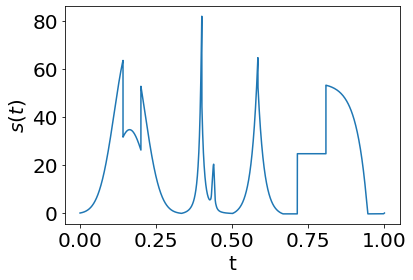

In [32]:
Ns = signal.shape[0]
t = np.linspace(0,1,Ns)
plt.plot(t, signal)
plt.ylabel(r"$s(t)$")
plt.xlabel("t")

In [27]:
spec = np.fft.rfft(signal)

In [28]:
freq = np.fft.rfftfreq(signal.shape[-1])

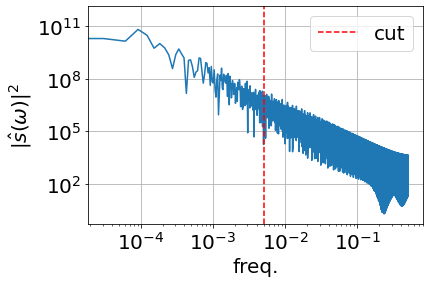

In [75]:
plt.plot(freq, np.abs(spec)**2)
plt.yscale("log")
plt.xscale("log")
plt.ylabel(r"$|\hat{s}(\omega)|^2$")
plt.xlabel("freq.")
plt.axvline(x=0.005, c='r', ls='--',label='cut')
plt.grid();
plt.legend();

In [76]:
spec_trunc = spec.copy()
spec_trunc[freq>0.005]=0  # correspond to |\hat{s}(\omega)|^2 > Threshold

In [78]:
signal_trunc = np.fft.irfft(spec_trunc)

Text(0.5, 0, 't')

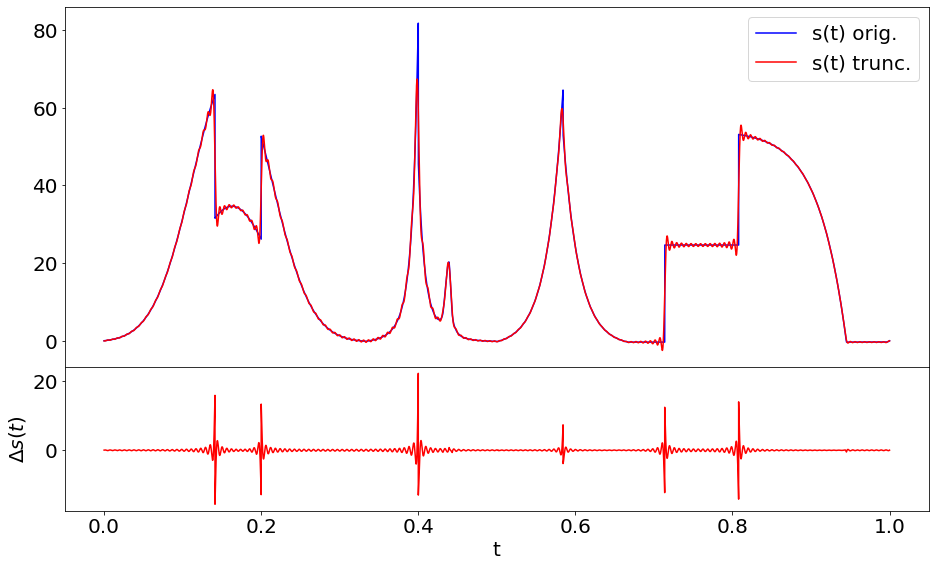

In [79]:
fig1 = plt.figure(1, figsize=(15,10))
frame1=fig1.add_axes((.1,.30,.8,.5))


plt.plot(t, signal, c='b', label='s(t) orig.')
plt.plot(t,signal_trunc, c='r', label='s(t) trunc.')
plt.legend();

frame1.set_xticklabels([])
frame1.set_xticks([])

#Residual plot
frame2=fig1.add_axes((.1,.1,.8,.2))
plt.plot(t,signal-signal_trunc,c='r')
plt.ylabel(r"$\Delta s(t)$")
plt.xlabel("t")
